In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from clustering import hierarchical_forest_clustering,create_and_plot_clusters
from utils import forward_selection_with_pvalues,create_dataframes_cluster


## BEBRASK Dataset

In [2]:
# Cargar los datos del archivo .xlsx en un dataframe
BEBRASK_scales = pd.read_excel('Datasets/BEBRASK_scales.xlsx')
BEBRASK_tasks = pd.read_excel('Datasets/BEBRASK_task.xlsx')
BEBRASK_tasks = BEBRASK_tasks[["DataFile.Basename","Rating0.RESP","Rating.RESP","EvokedEmotion", "Expression", "ScenarioPick","TrialCount","Fulfilled"]].copy()
BEBRASK_tasks.dropna(subset = ["TrialCount"],inplace=True)
subjects_id = BEBRASK_tasks["DataFile.Basename"].unique()


In [3]:
test = BEBRASK_tasks[["Rating0.RESP", "Rating.RESP"]]
print("Mean difference pred/like:",np.mean(abs(test["Rating0.RESP"] - test["Rating.RESP"])))
print("Std difference pred/like:",np.std(abs(test["Rating0.RESP"] - test["Rating.RESP"])))


Mean difference pred/like: 0.8911592994161801
Std difference pred/like: 0.8296508347297797


In [4]:
BEBRASK_tasks_long= BEBRASK_tasks.pivot(index="DataFile.Basename", columns='TrialCount')
BEBRASK_tasks_long.columns = ['_'.join(str(col) for col in cols) for cols in BEBRASK_tasks_long.columns.values]


In [5]:
for i in range(1, 46):  # Assuming there are 55 trials
    rating1_col = f'Rating0.RESP_{i}.0'
    rating2_col = f'Rating.RESP_{i}.0'
    
    # Fill NA in rating1 with values from rating2, and vice versa
    BEBRASK_tasks_long[rating1_col].fillna(BEBRASK_tasks_long[rating2_col], inplace=True)
    BEBRASK_tasks_long[rating2_col].fillna(BEBRASK_tasks_long[rating1_col], inplace=True)

In [122]:
subject_dict_BEBRASK  = {}
subject_dict_all = {}
for j in range(0,55):
    subject = BEBRASK_tasks_long.iloc[j]
    id = BEBRASK_tasks_long.index.values[j]
    happy_pred = []
    happy_like = []
    happy_facial = []
    happy_fulfill = []
    sad_pred = []
    sad_like = []
    sad_facial = []
    sad_fulfill = []
    fear_pred = []
    fear_like = []
    fear_facial = []
    fear_fulfill = []
    all_trials_pred = []
    all_trials_like = []
    all_trials_facial = []
    all_trials_fulfill = []
    
    for i in range(1,46):
        pred = f'Rating0.RESP_{i}.0'
        like = f'Rating.RESP_{i}.0'
        emotion = f'EvokedEmotion_{i}.0'
        facial = f'Expression_{i}.0'
        fulfill = f'Fulfilled_{i}.0'
        
        if subject[emotion] == "happiness":
            happy_pred.append(int(subject[pred]))
            happy_like.append(int(subject[like]))
            happy_facial.append(subject[facial])
            happy_fulfill.append(subject[fulfill])
            
        elif subject[emotion] == "sadness":
            sad_pred.append(int(subject[pred]))
            sad_like.append(int(subject[like]))
            sad_facial.append(subject[facial])
            sad_fulfill.append(subject[fulfill])
            
        else:
            fear_pred.append(int(subject[pred]))
            fear_like.append(int(subject[like]))
            fear_facial.append(subject[facial])
            fear_fulfill.append(subject[fulfill])

        if subject[facial] != subject[emotion]:
            
            all_trials_facial.append(subject[facial]+"_"+subject[emotion])
        else:
            all_trials_facial.append(subject[facial])
        
        all_trials_pred.append(subject[pred])
        all_trials_like.append(subject[like])
        all_trials_fulfill.append(subject[fulfill])
        
    subject_dict_BEBRASK[id] = {'Happy':{'Pred':np.array(happy_pred), 'Like': np.array(happy_like), 'Facial':np.array(happy_facial),'Fulfill':np.array(happy_fulfill)},'Sad':{ 'Pred':np.array(sad_pred), 'Like':np.array(sad_like), 'Facial':np.array(sad_facial),'Fulfill': np.array(sad_fulfill)}, 'Fear':{'Pred':np.array(fear_pred),'Like': np.array(fear_like),'Facial': np.array(fear_facial), 'Fulfill': np.array(fear_fulfill)}}
    subject_dict_all[id] = {'Pred': np.array(all_trials_pred),'Like': np.array(all_trials_like),'Facial': np.array(all_trials_facial), 'Fulfill': np.array(all_trials_fulfill)}

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

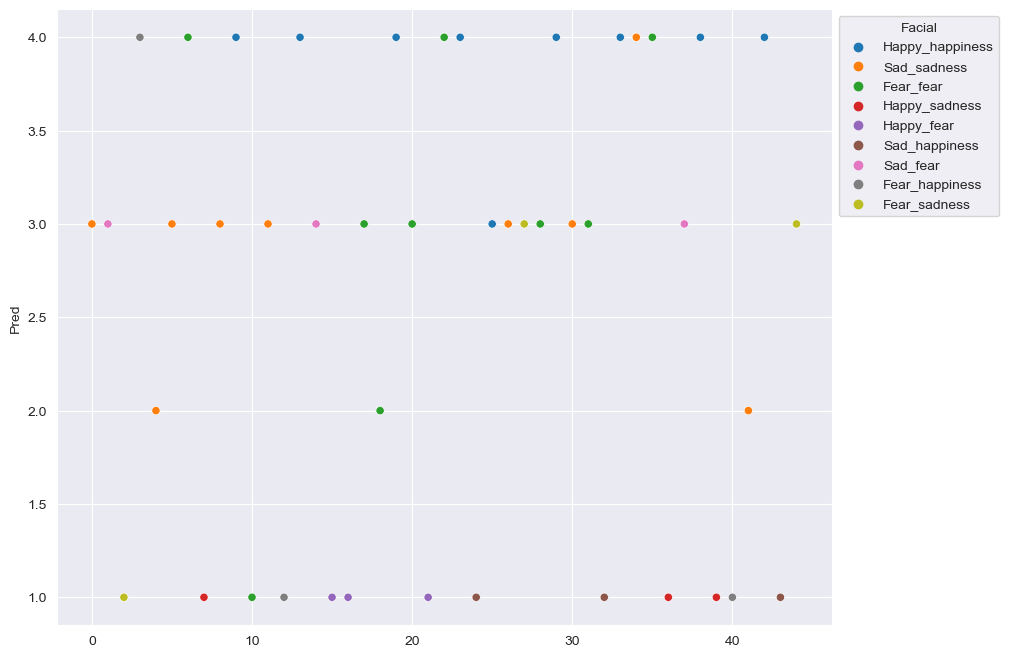

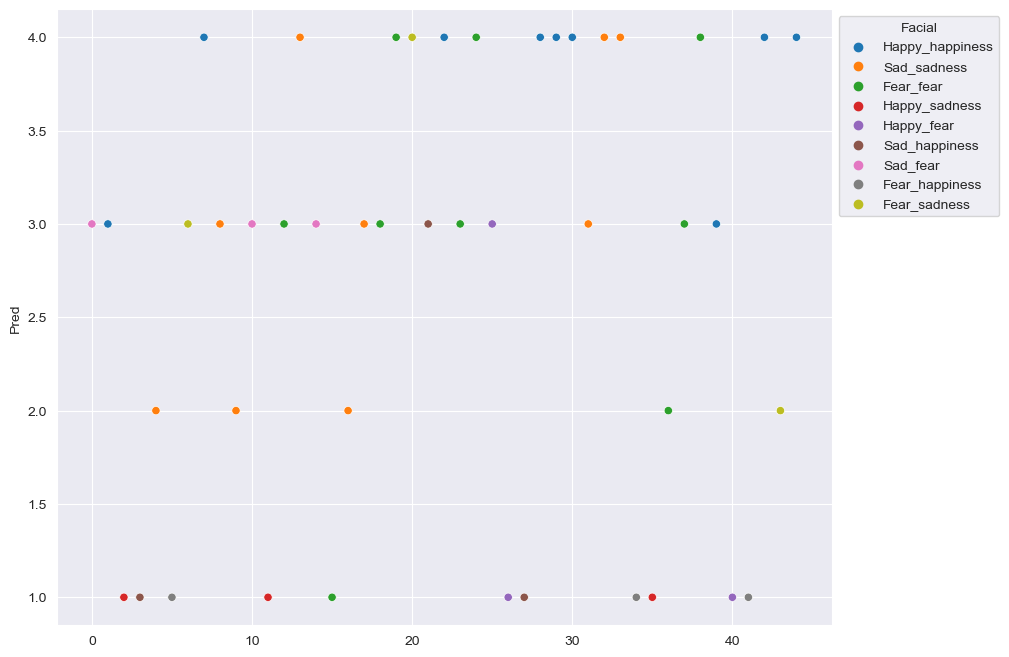

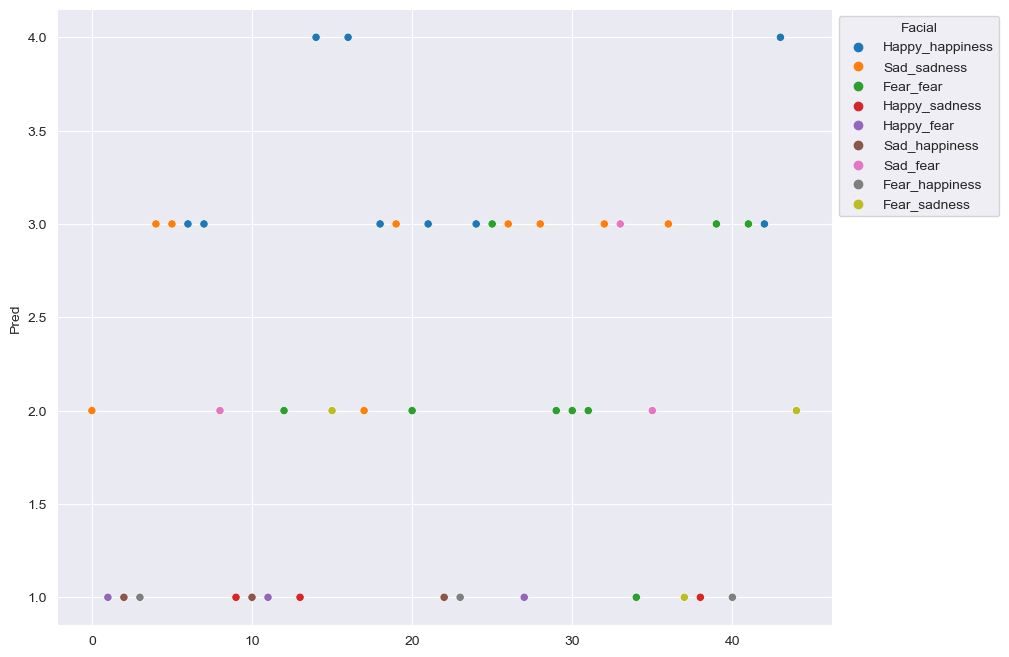

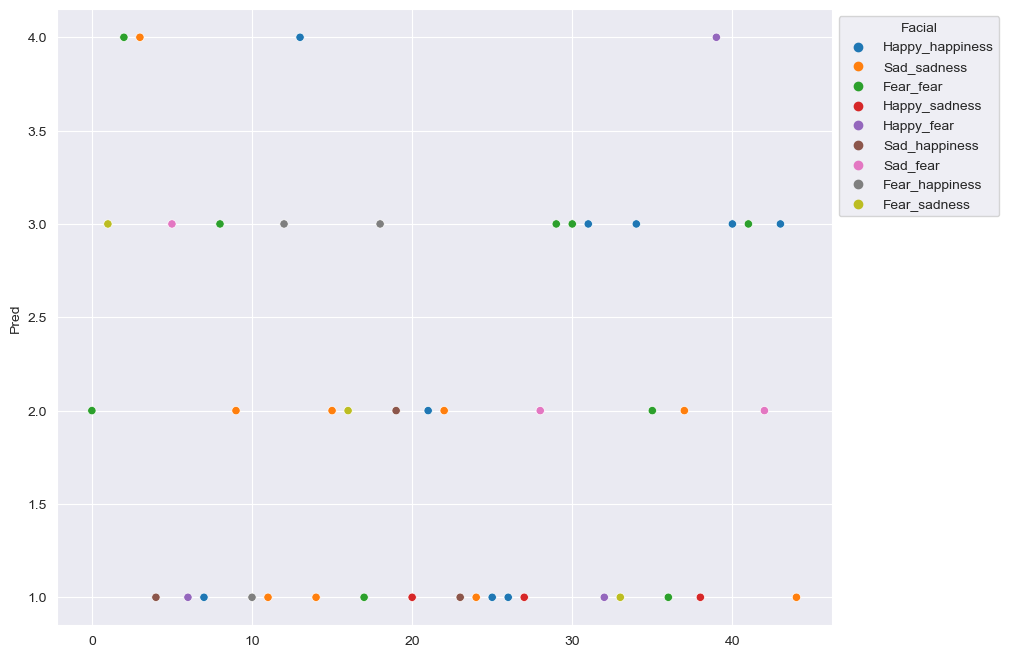

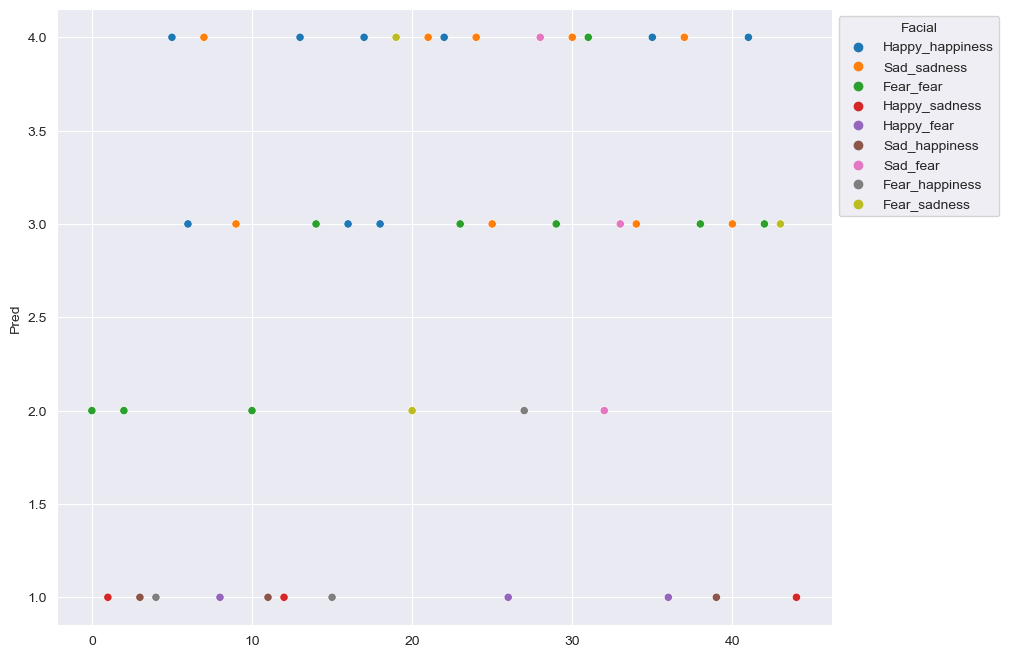

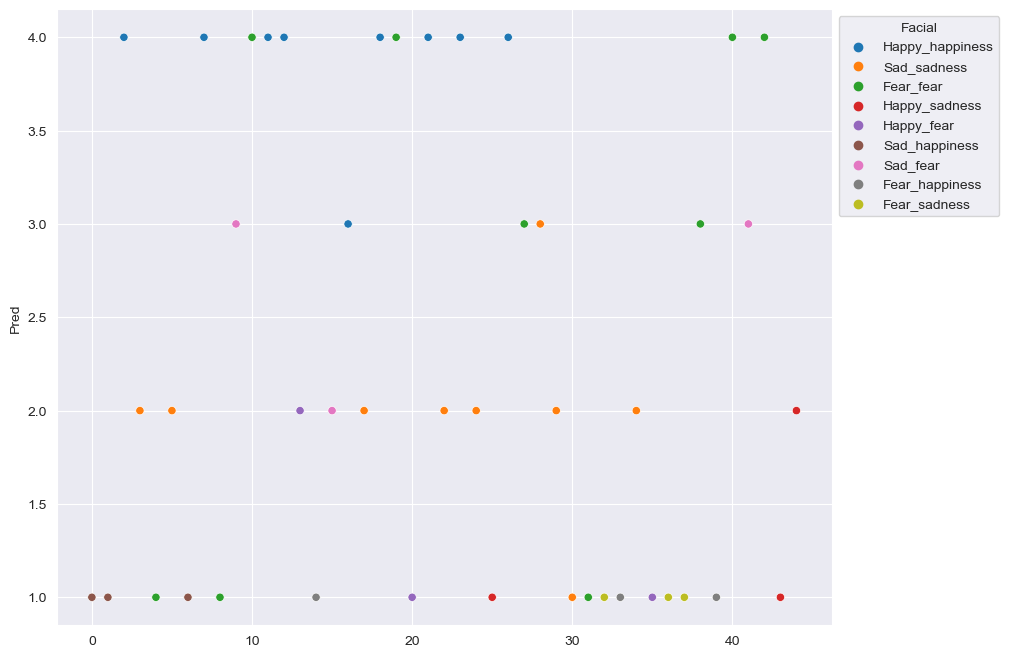

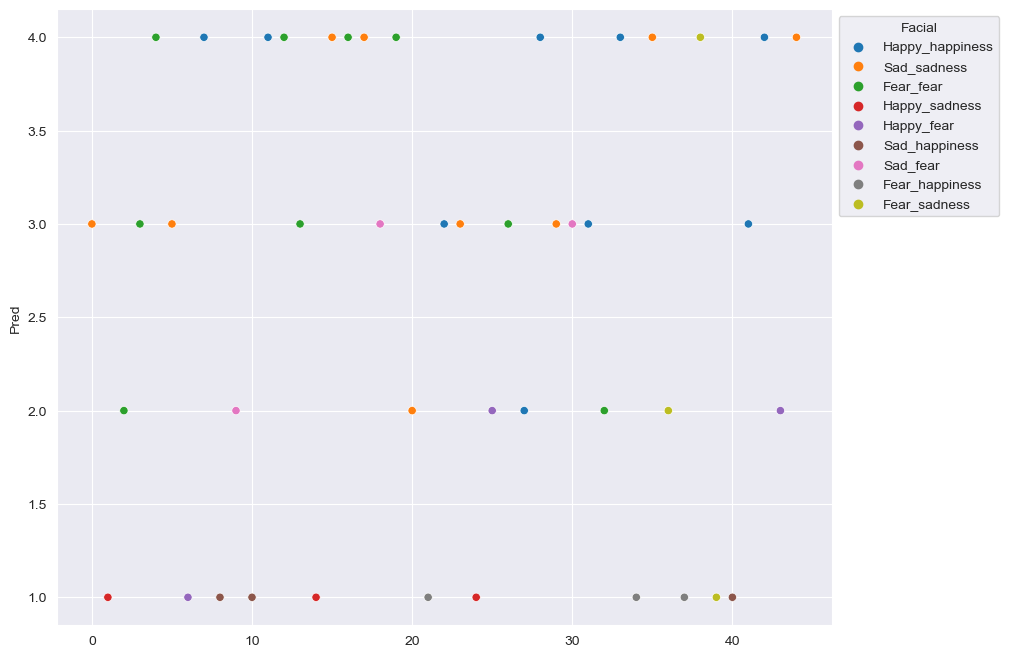

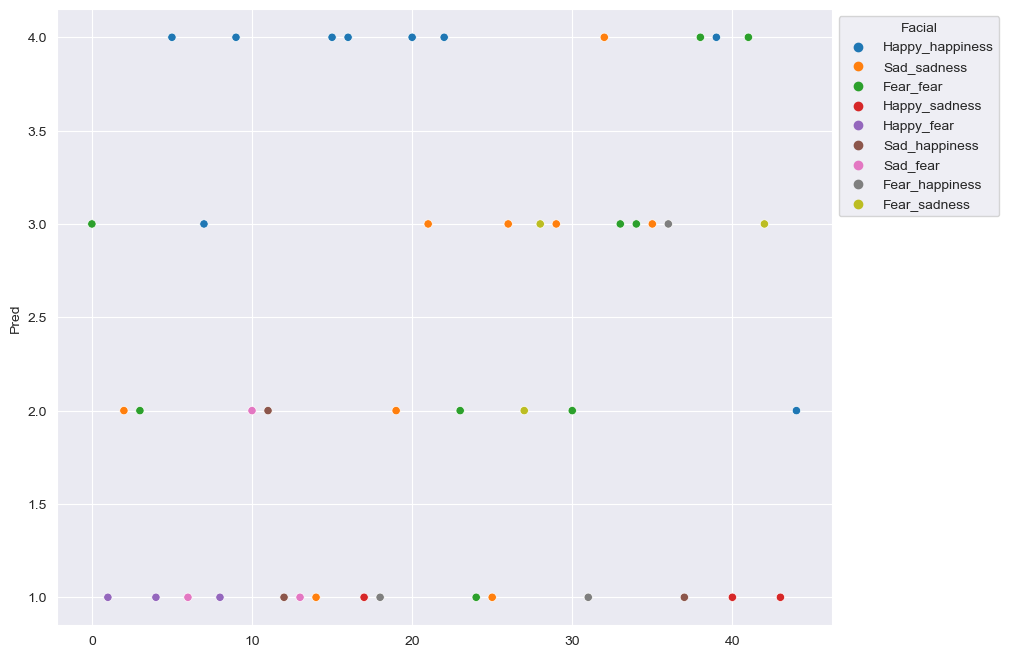

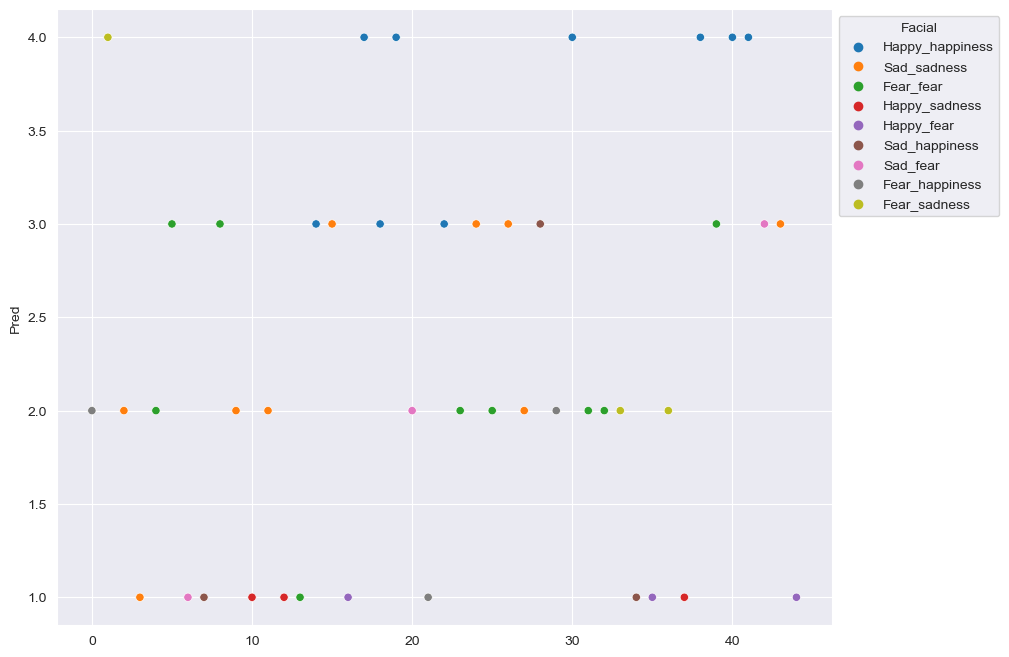

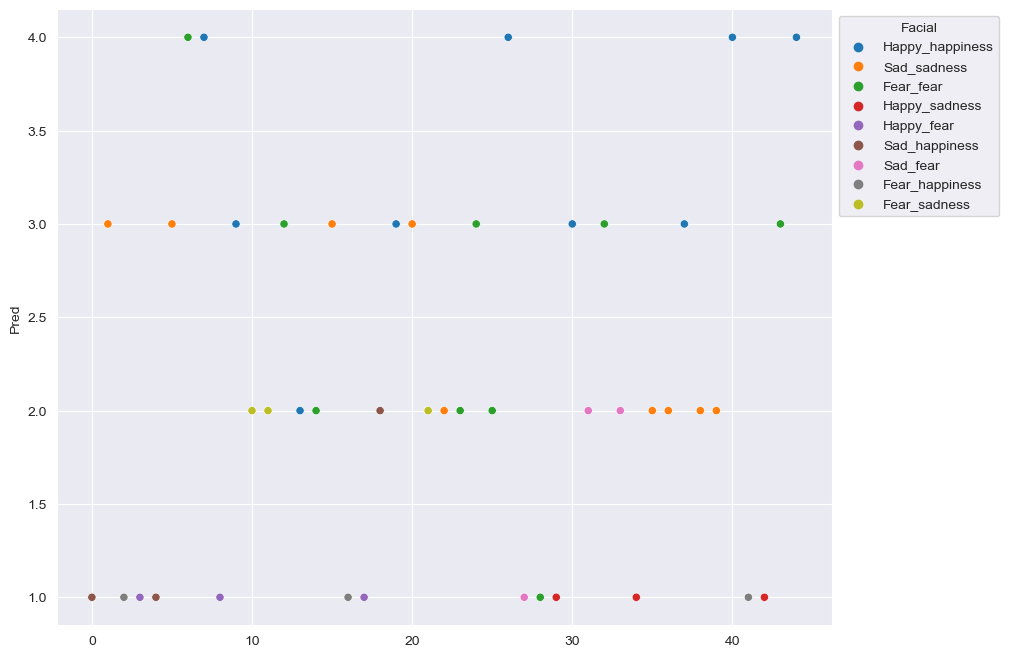

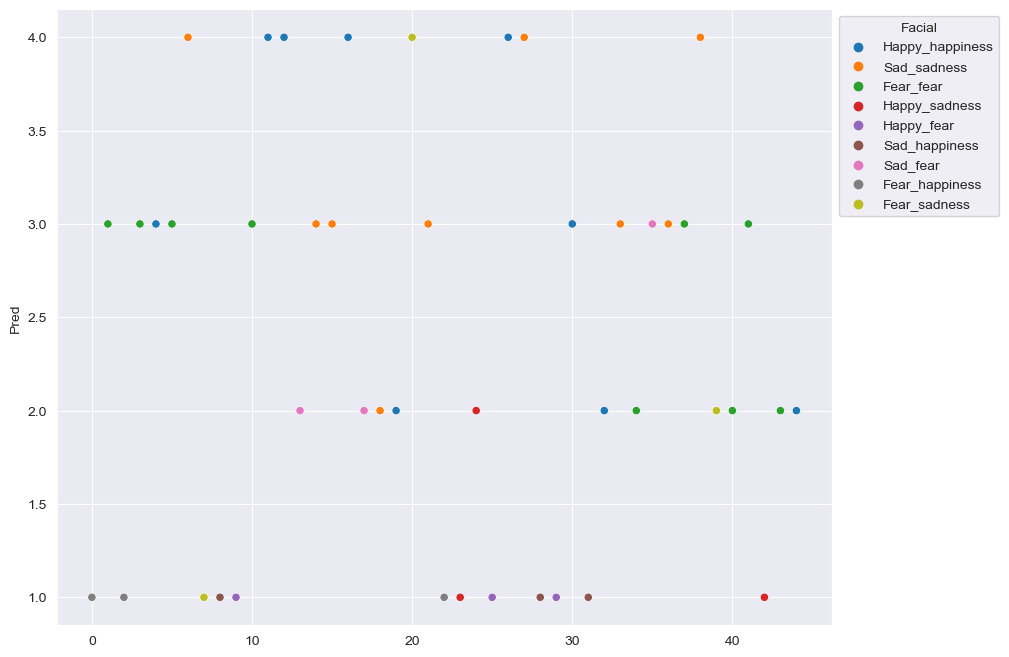

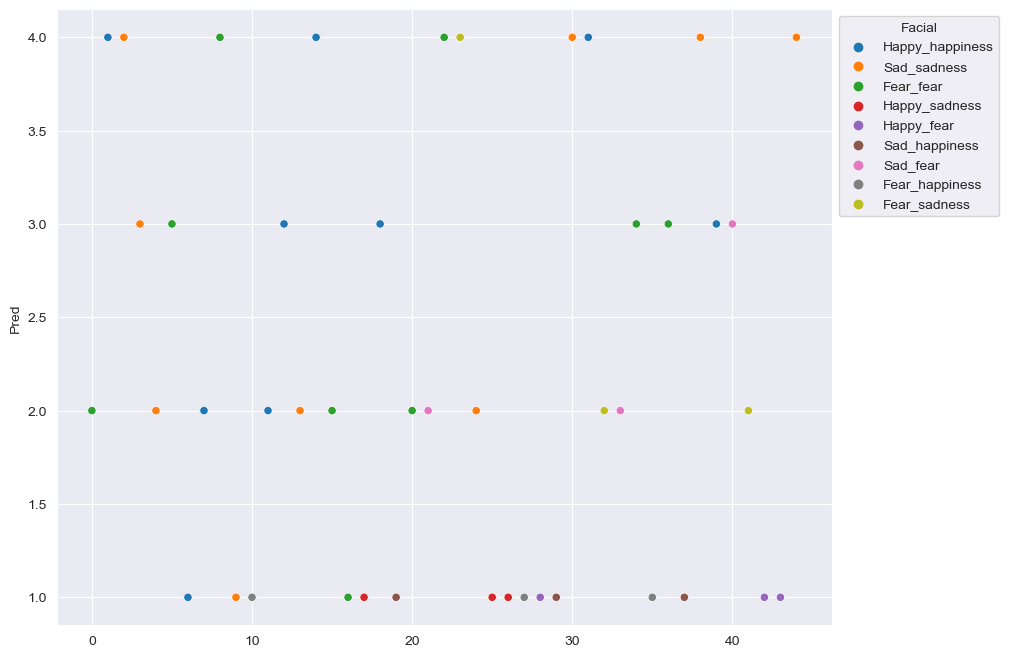

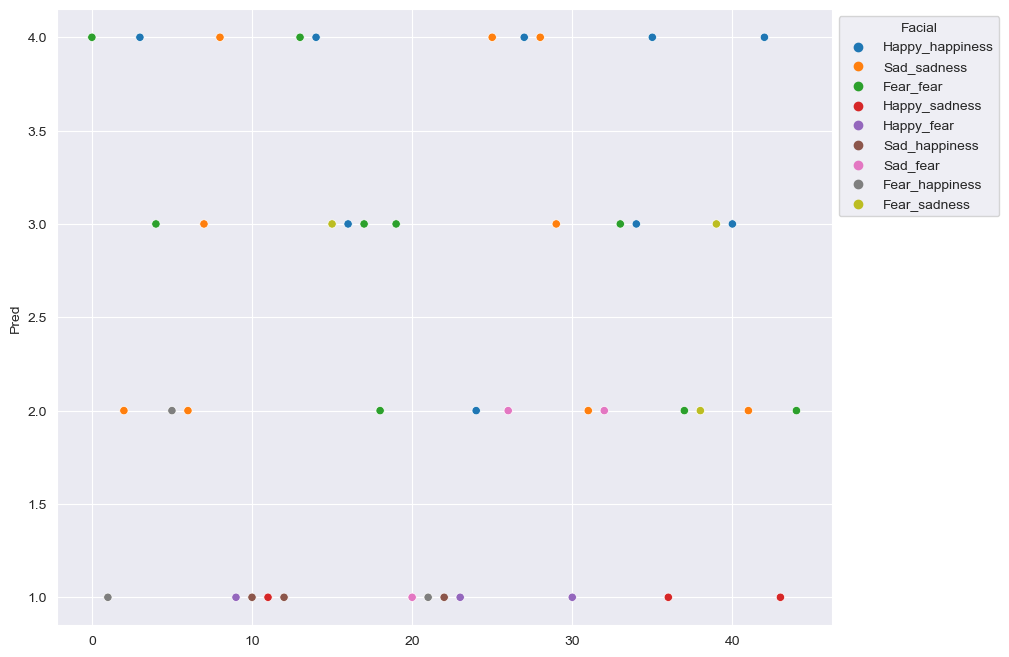

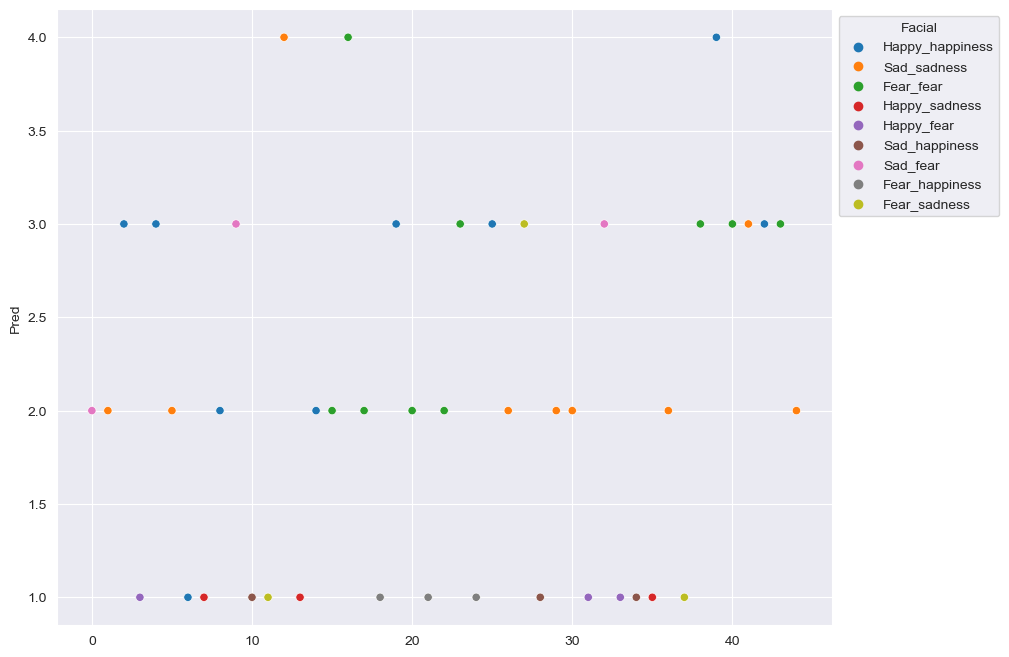

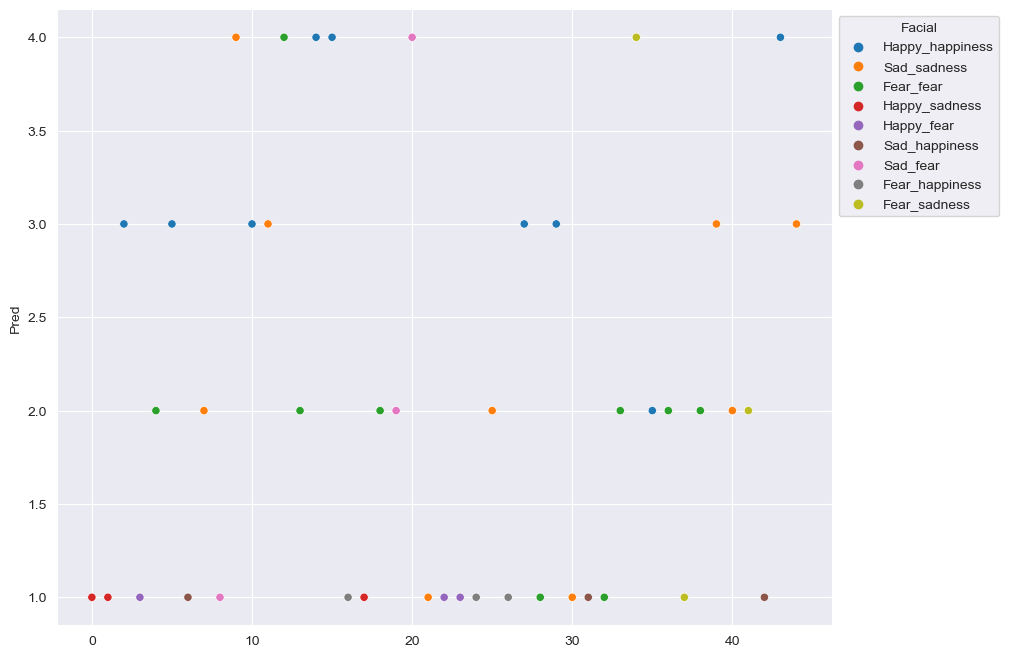

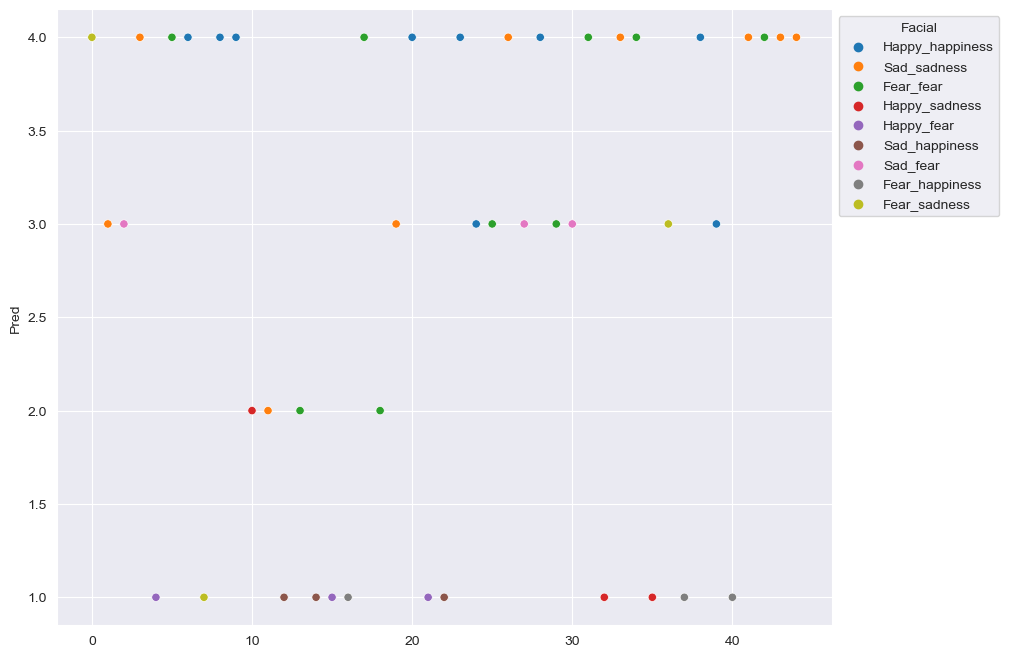

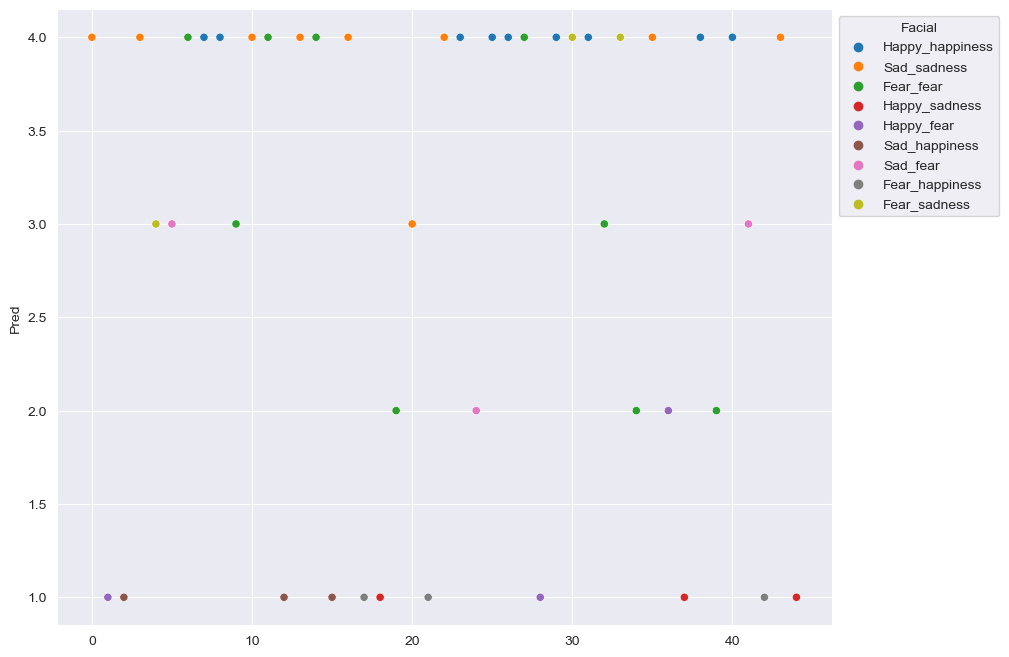

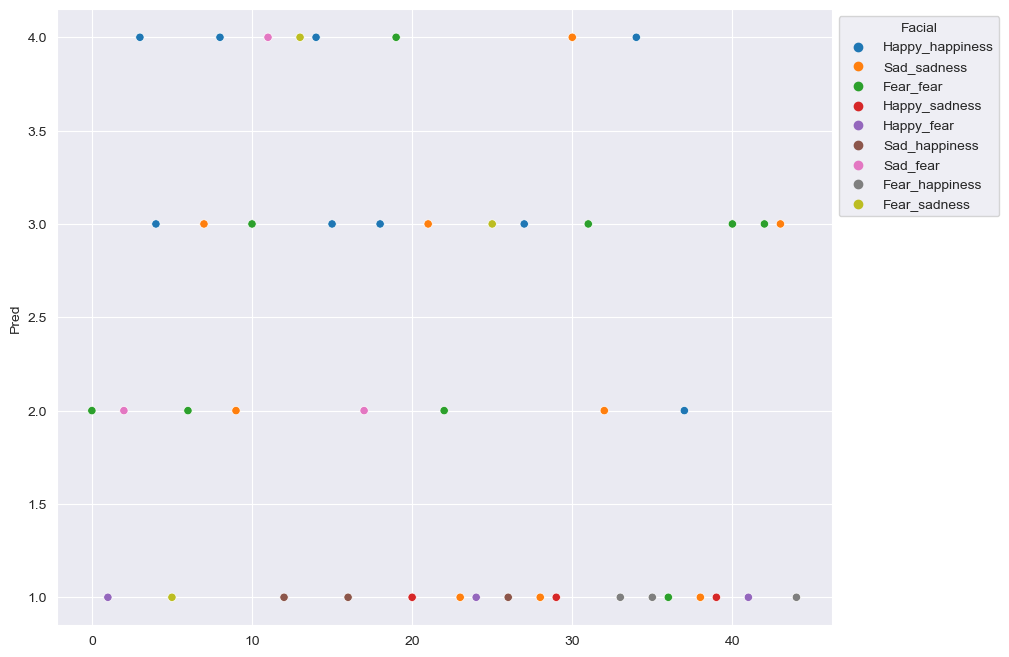

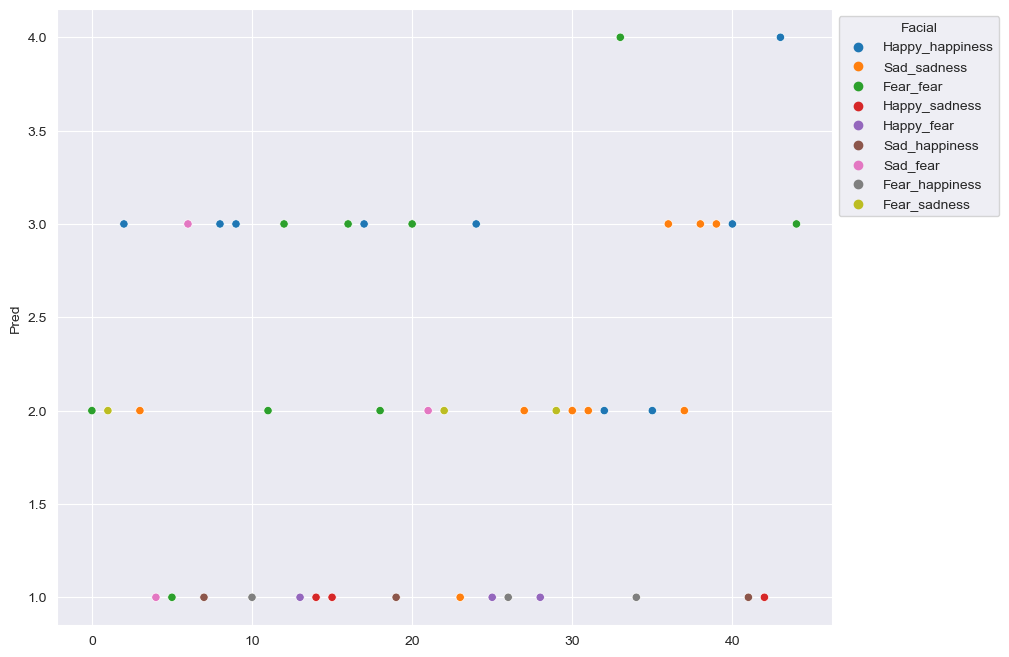

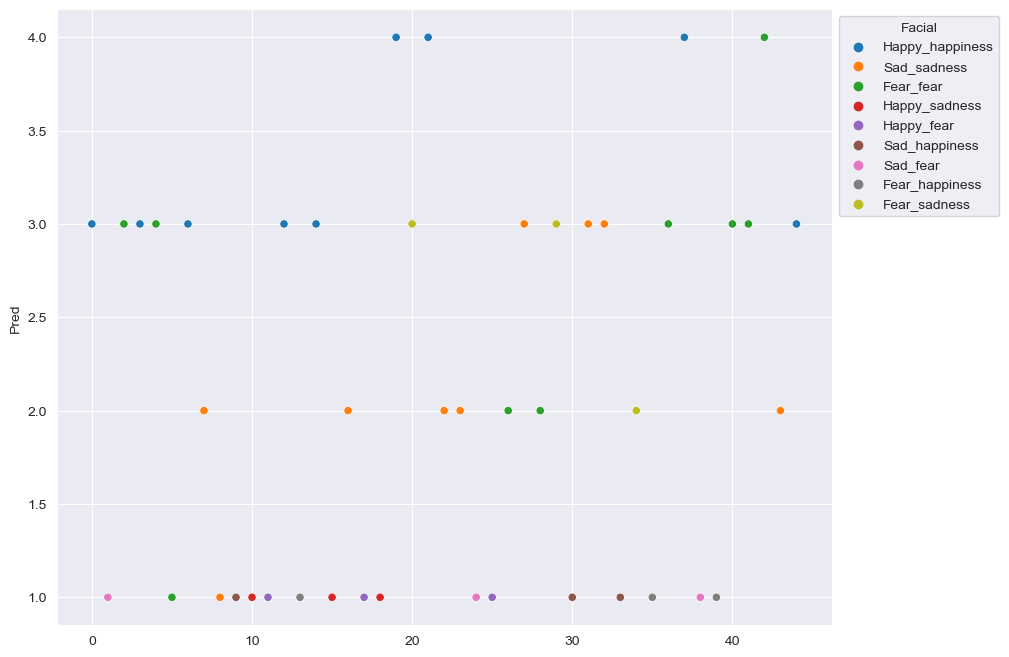

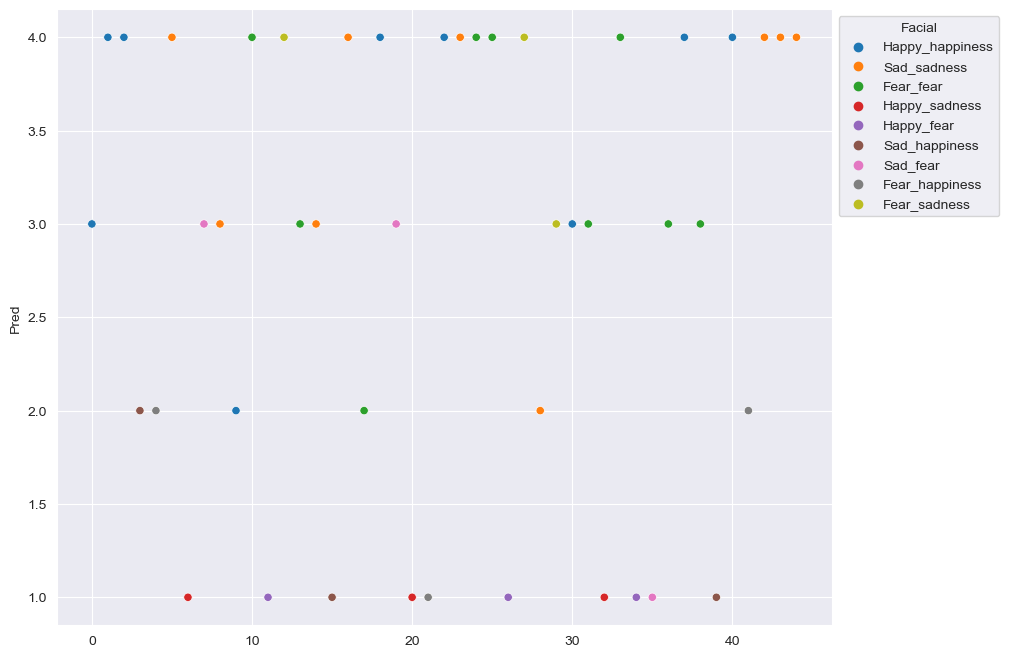

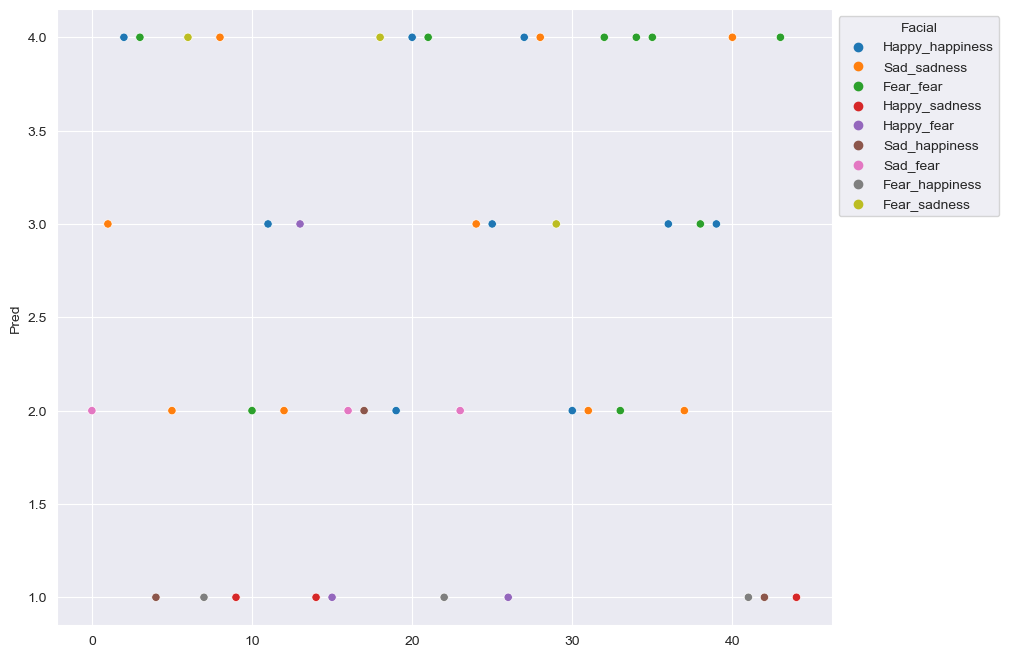

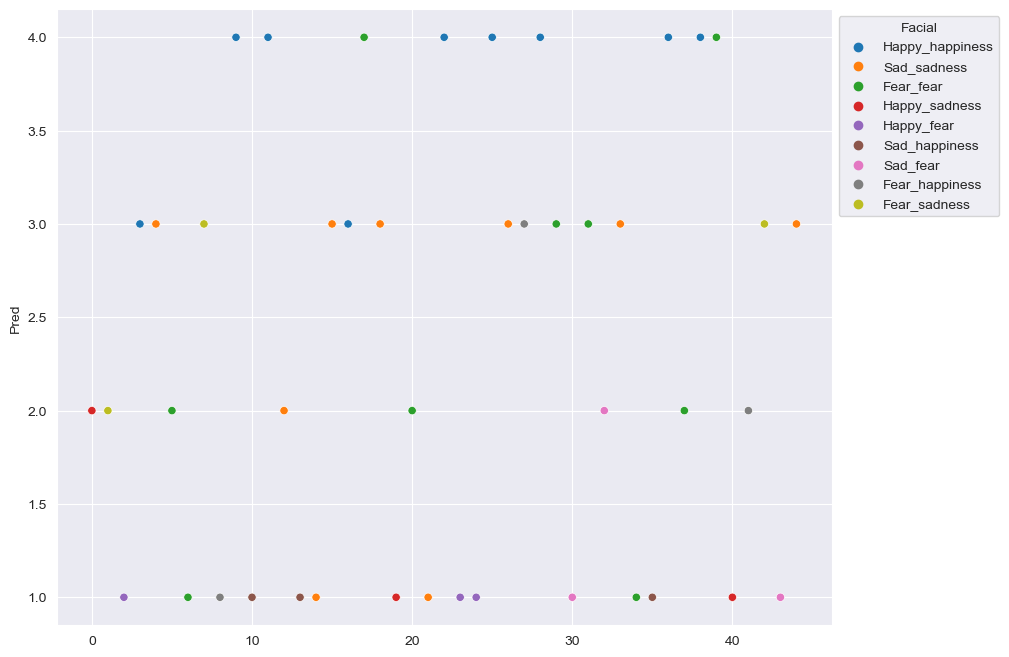

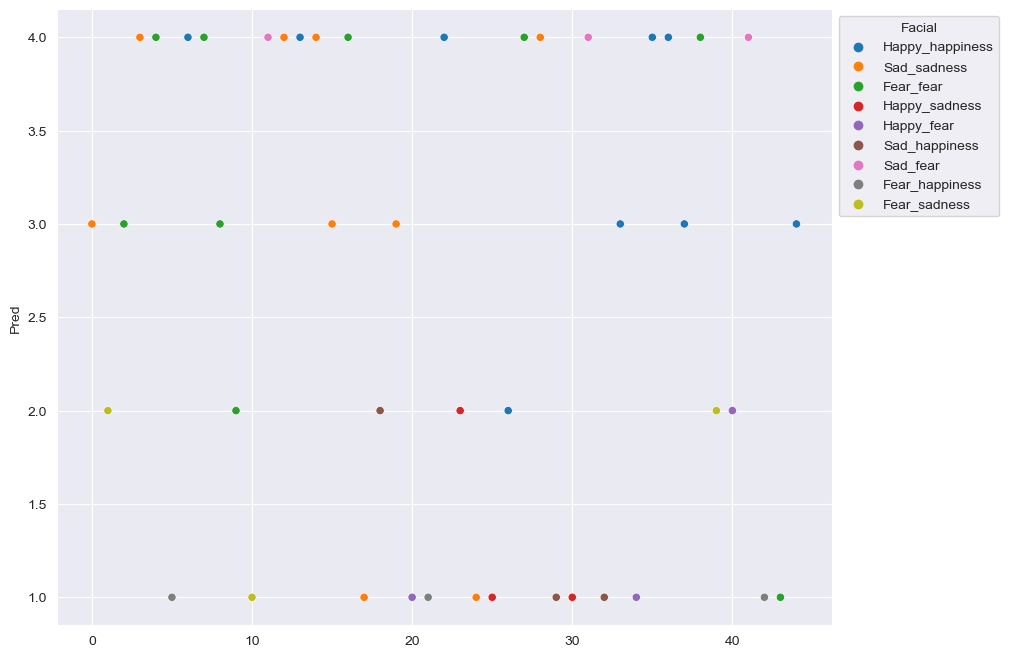

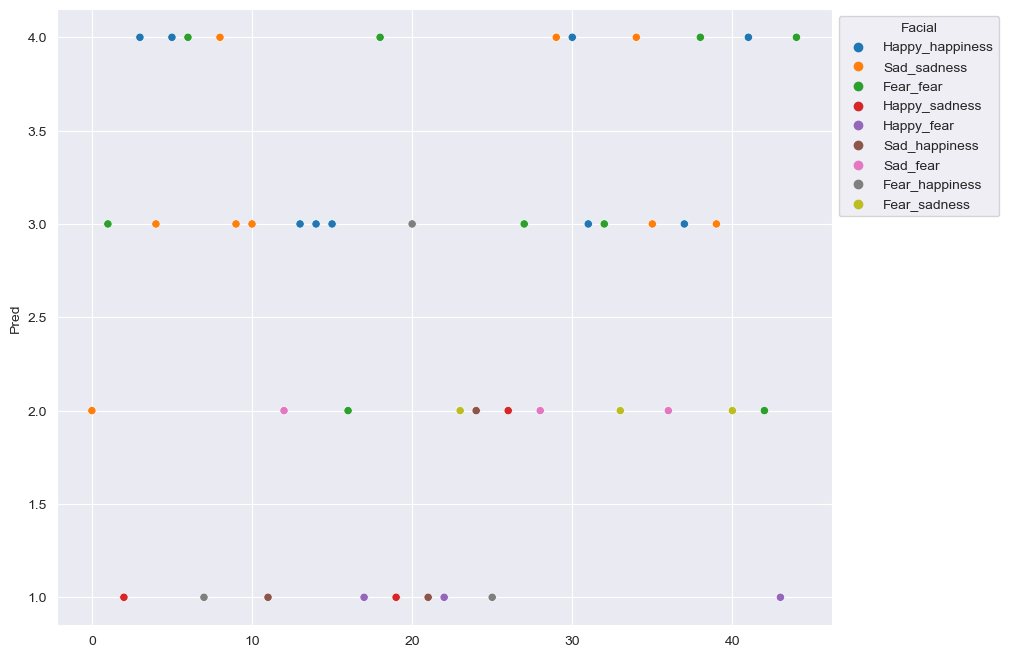

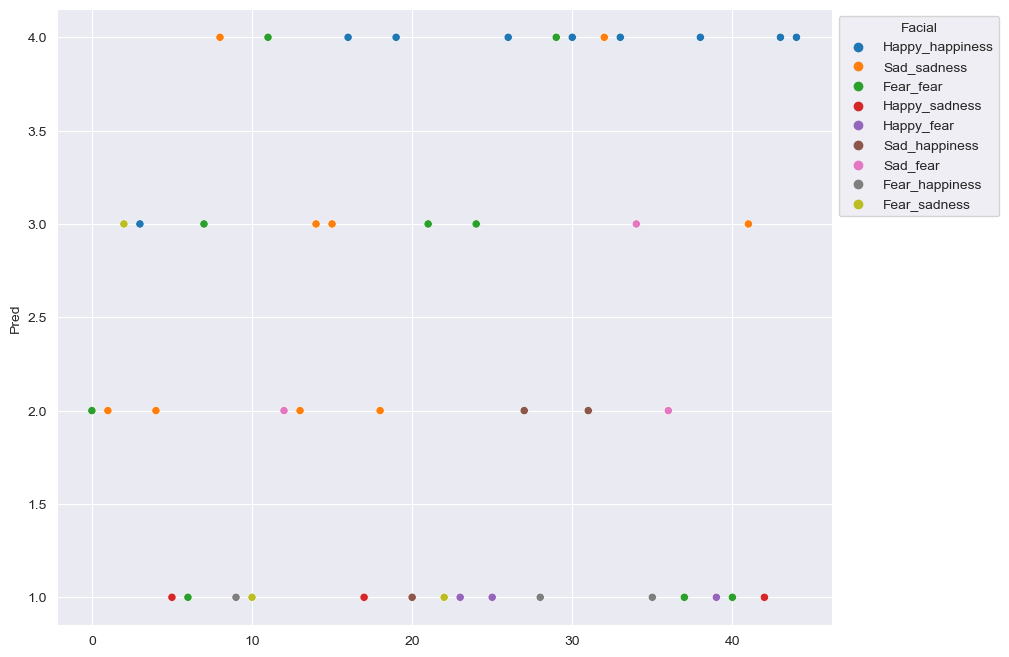

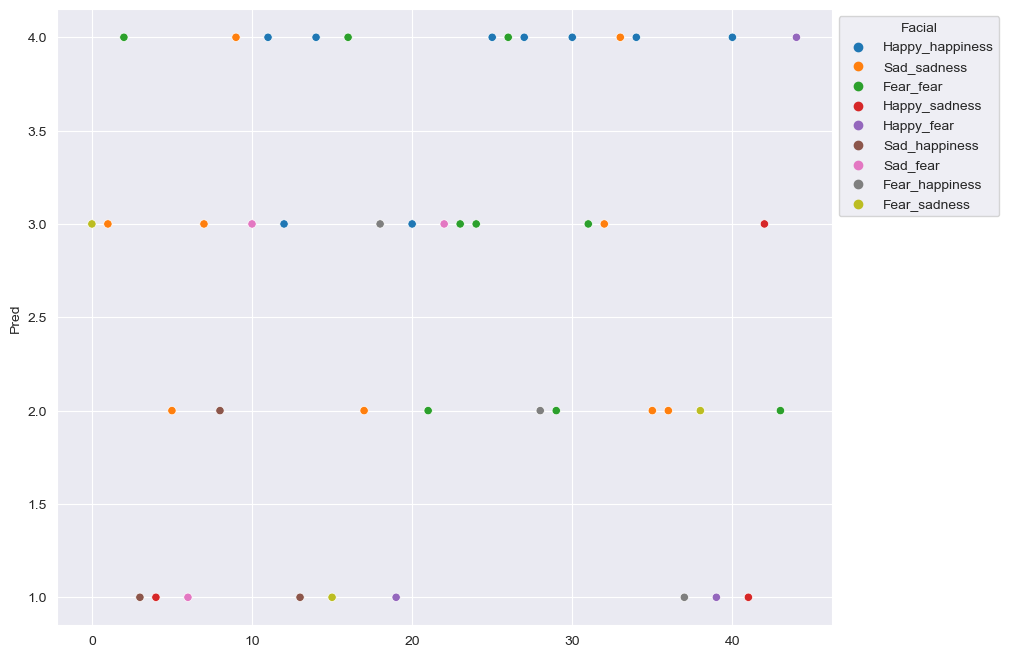

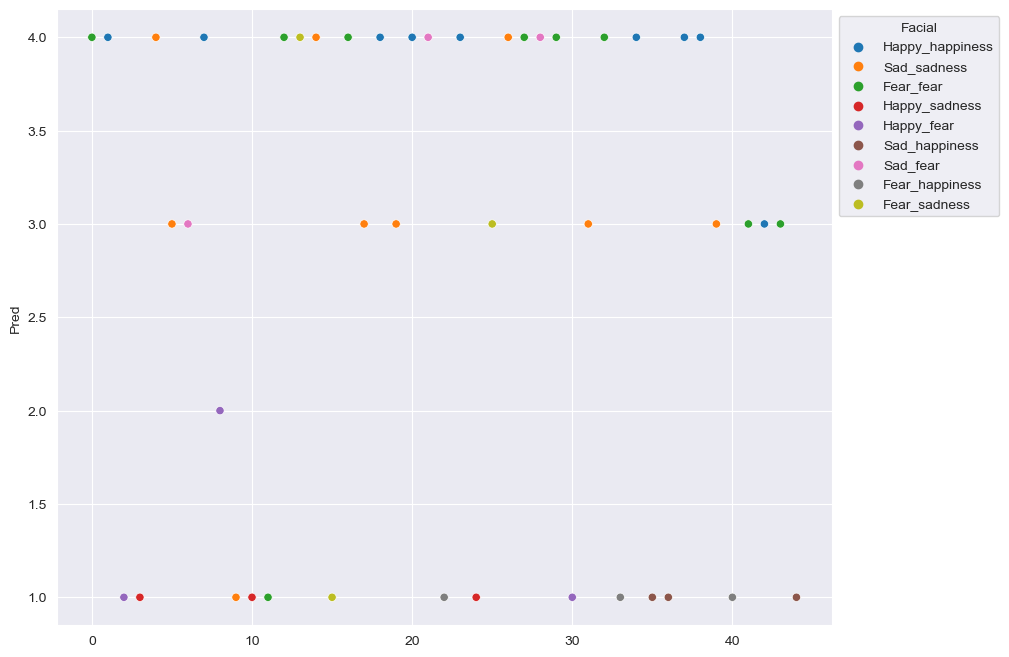

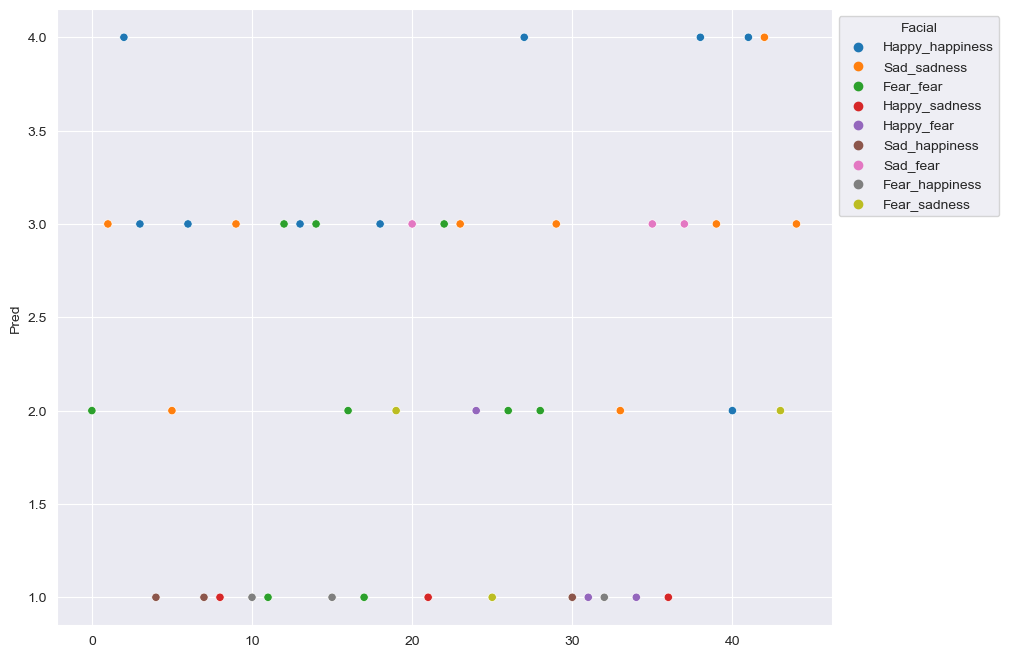

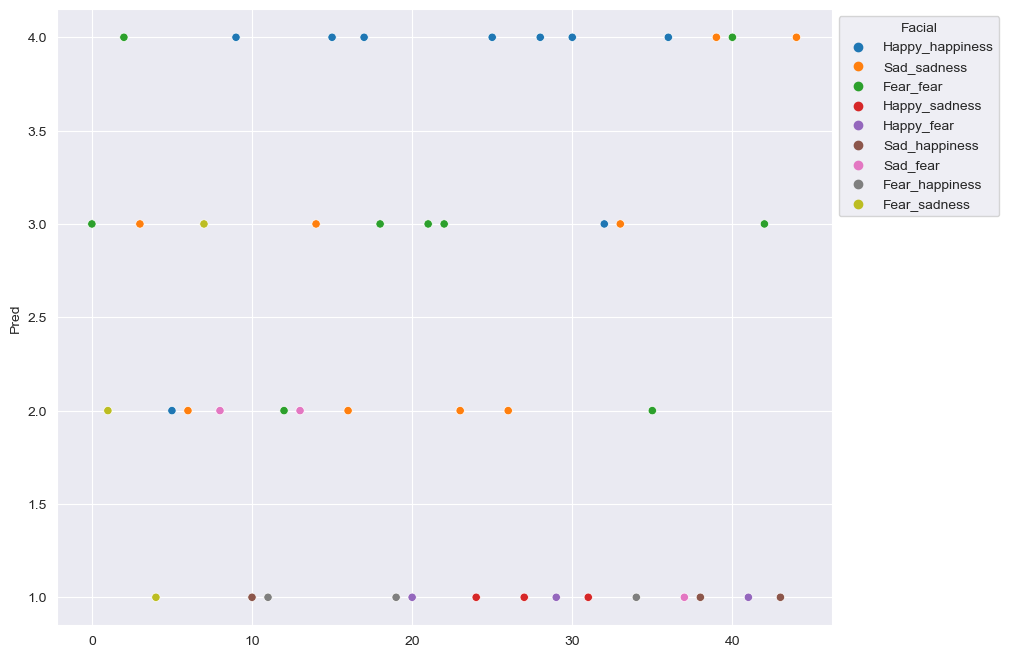

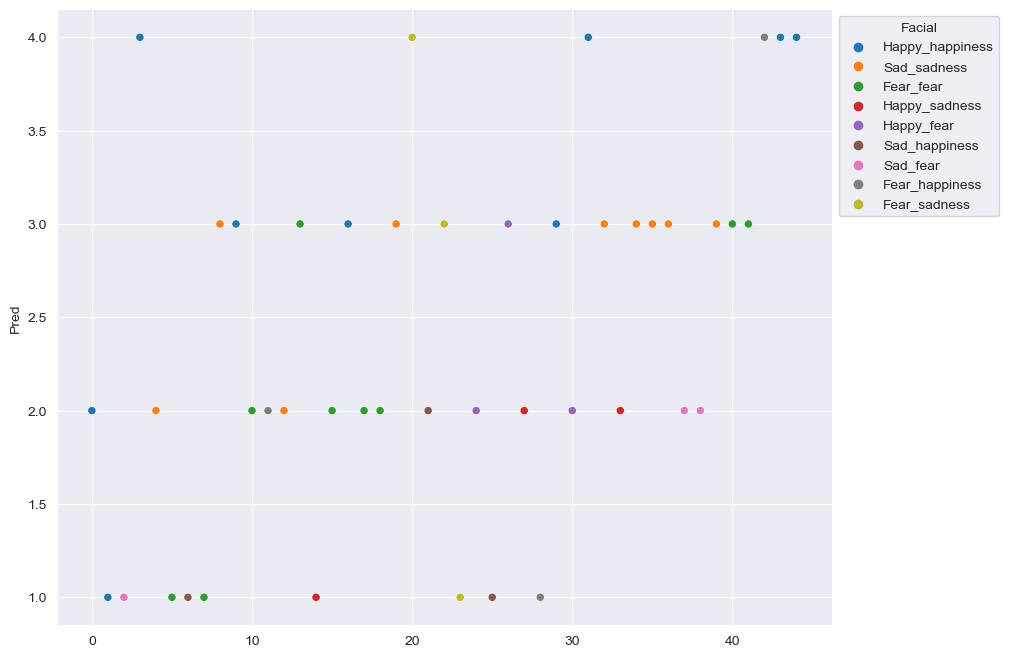

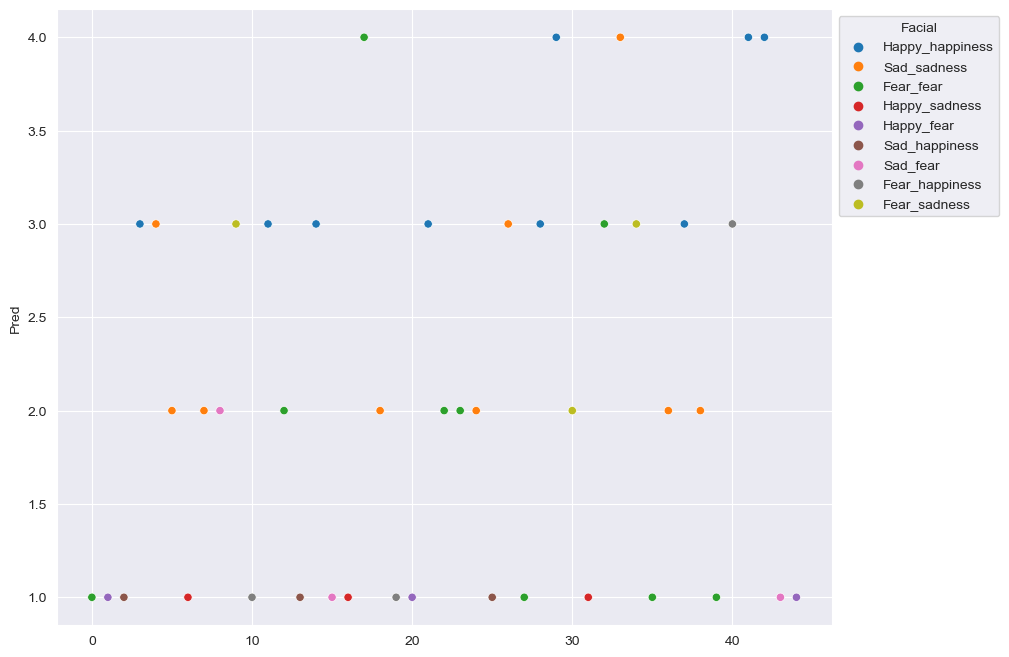

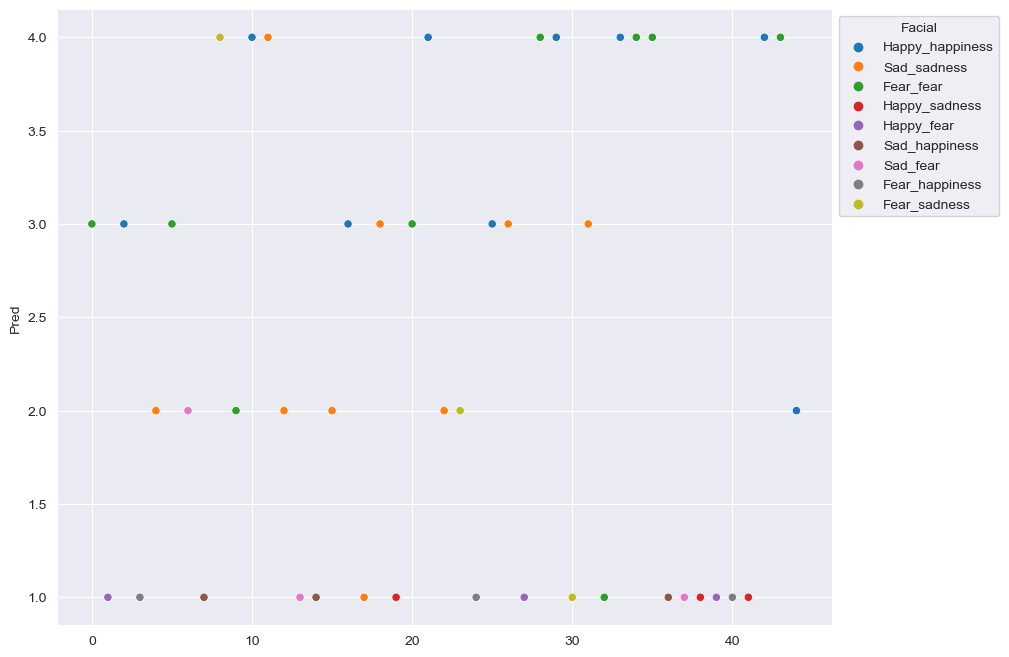

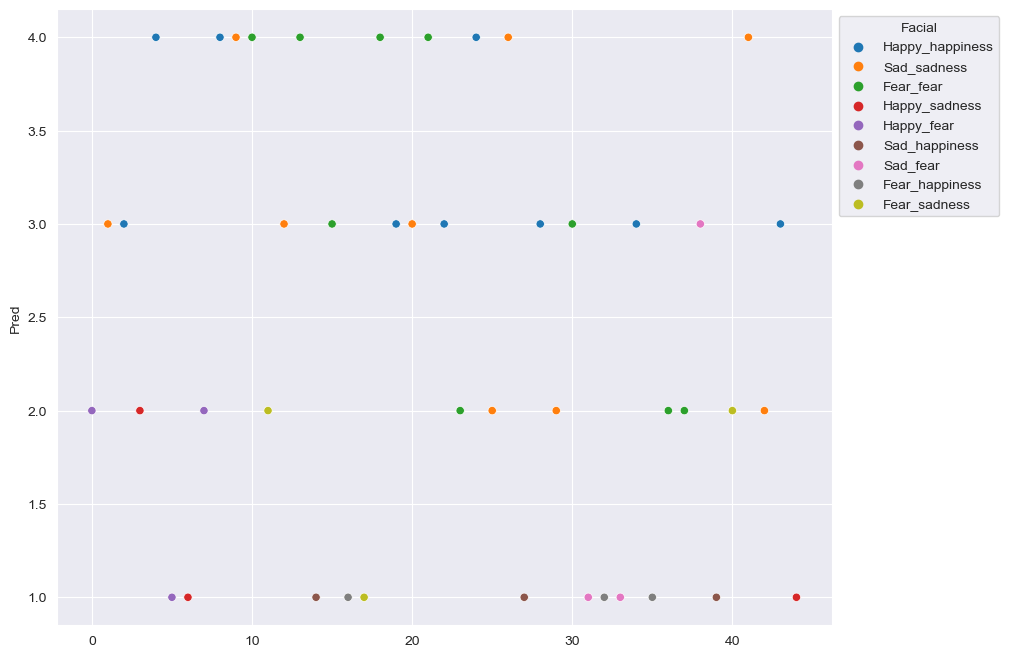

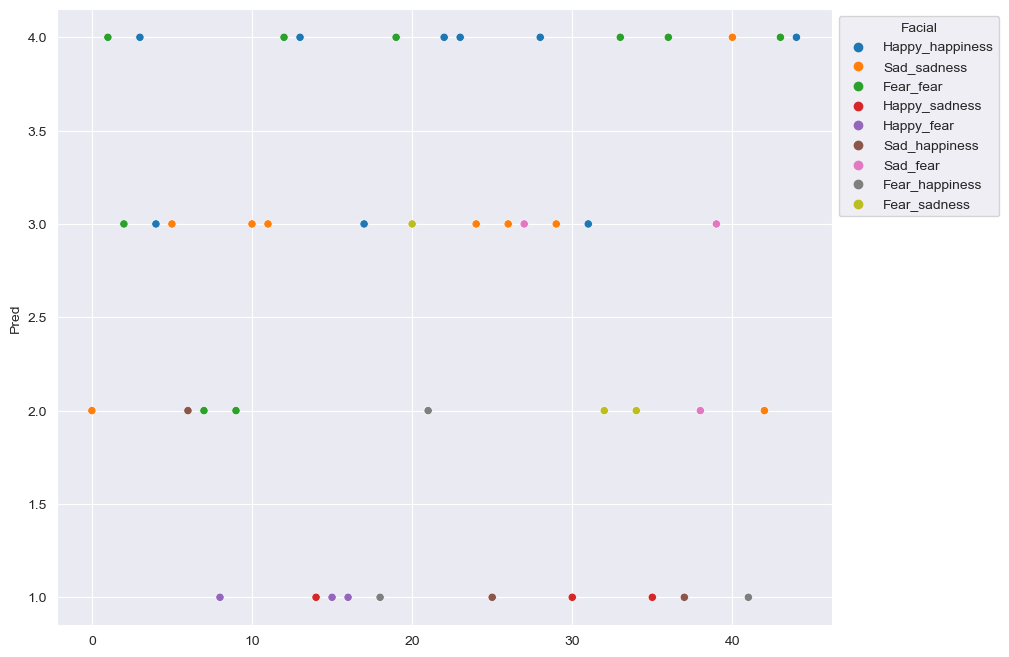

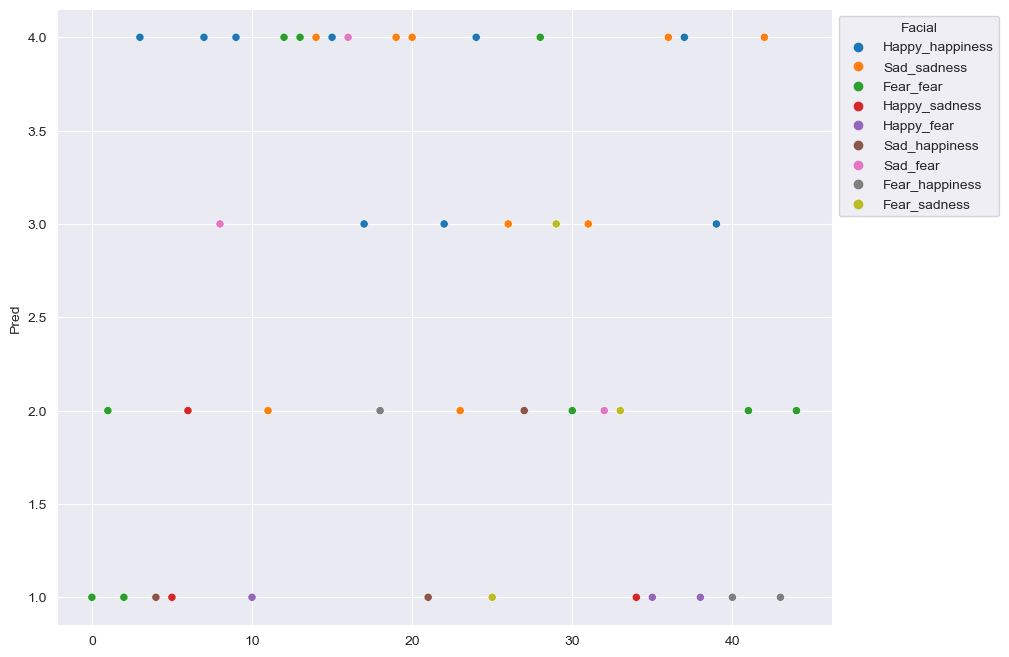

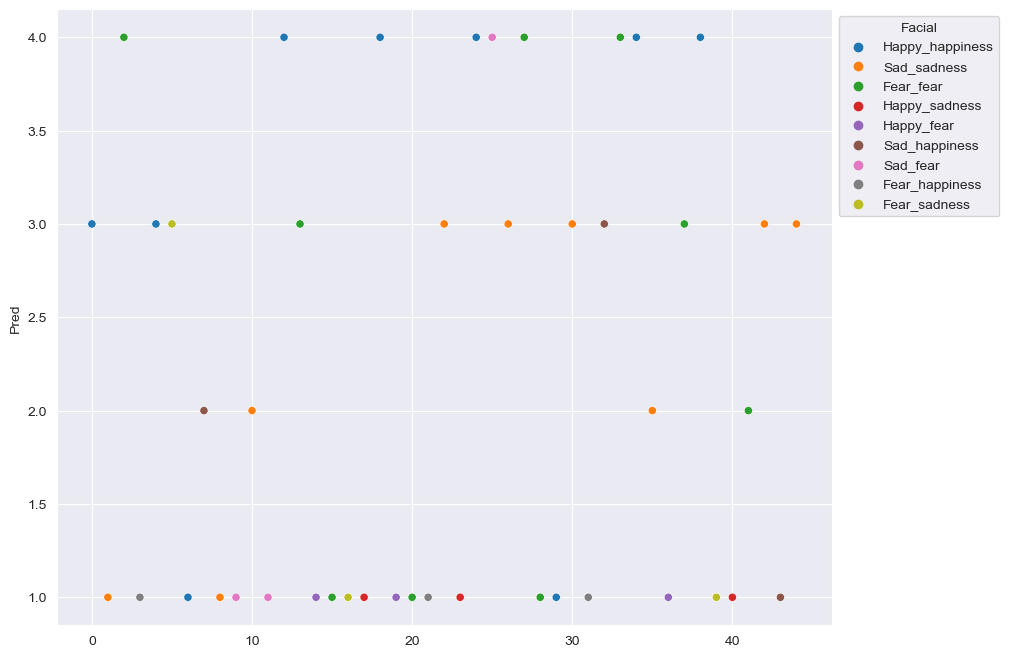

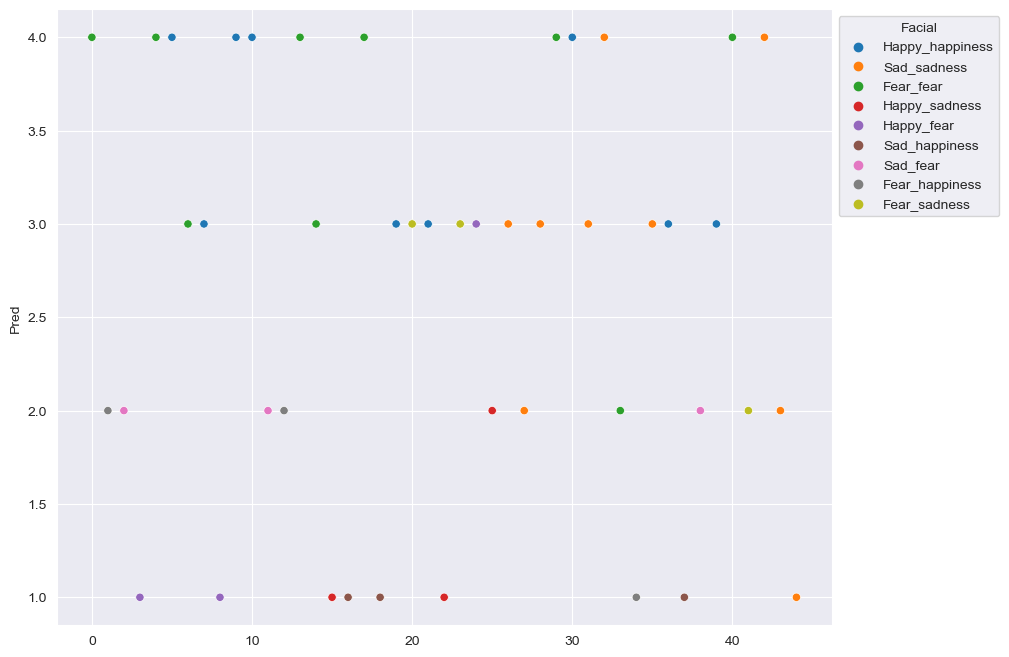

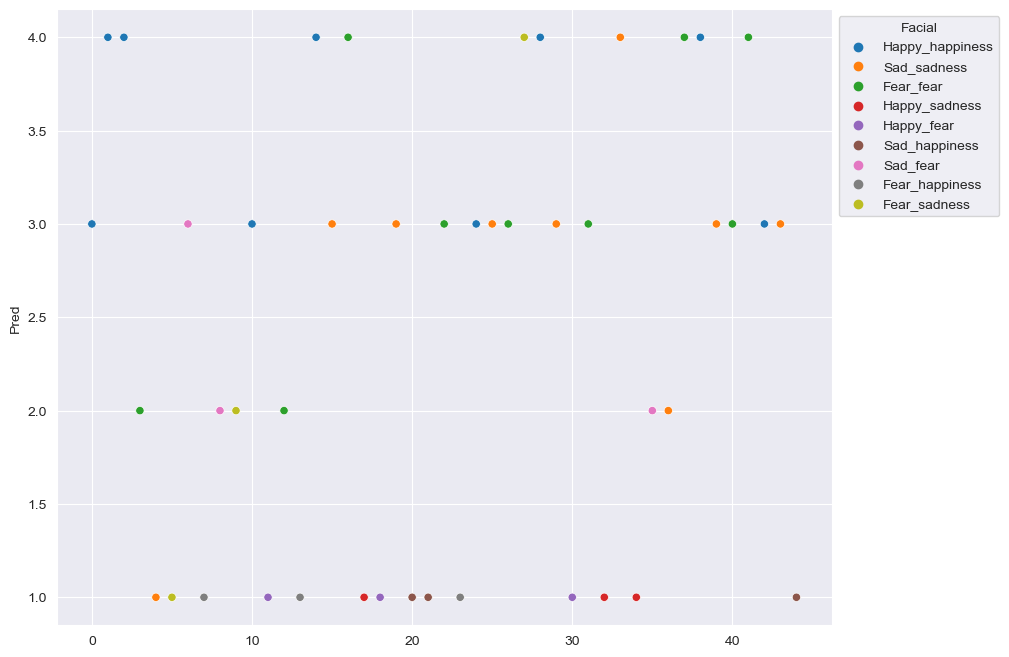

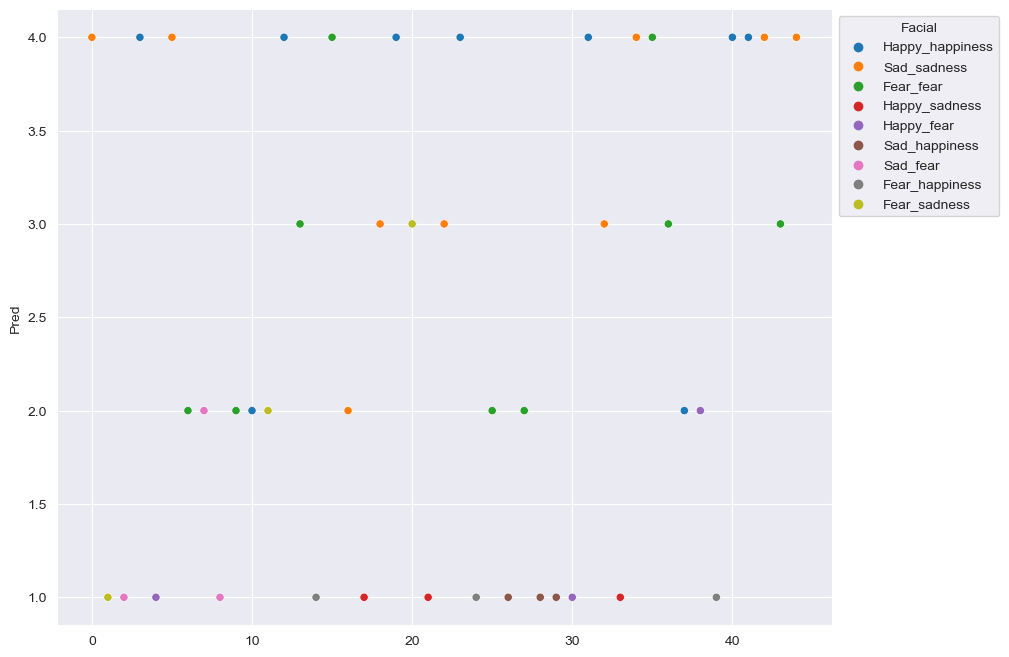

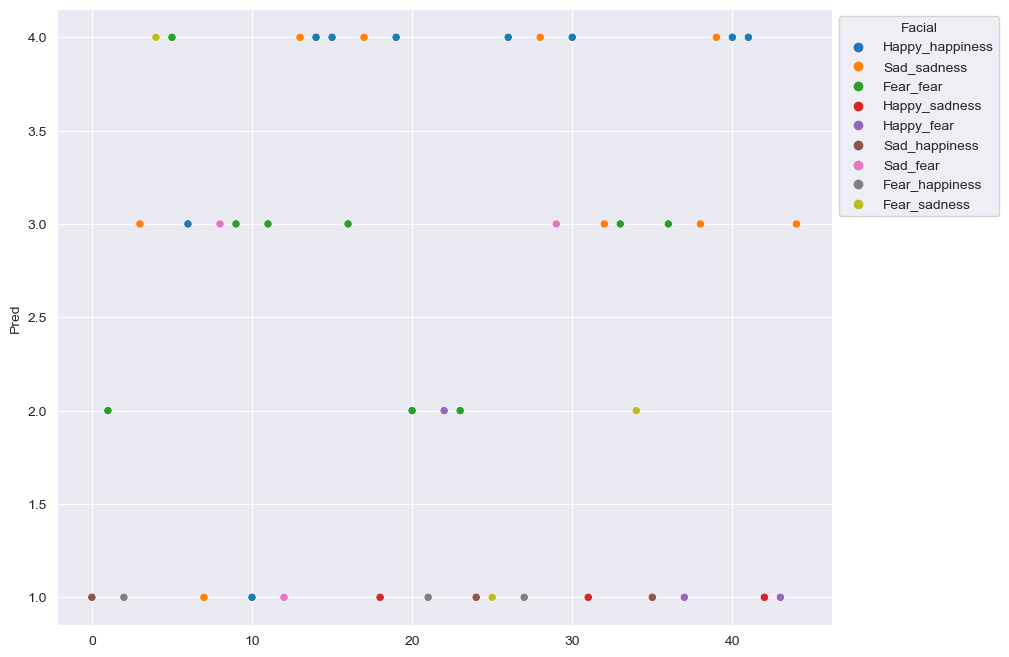

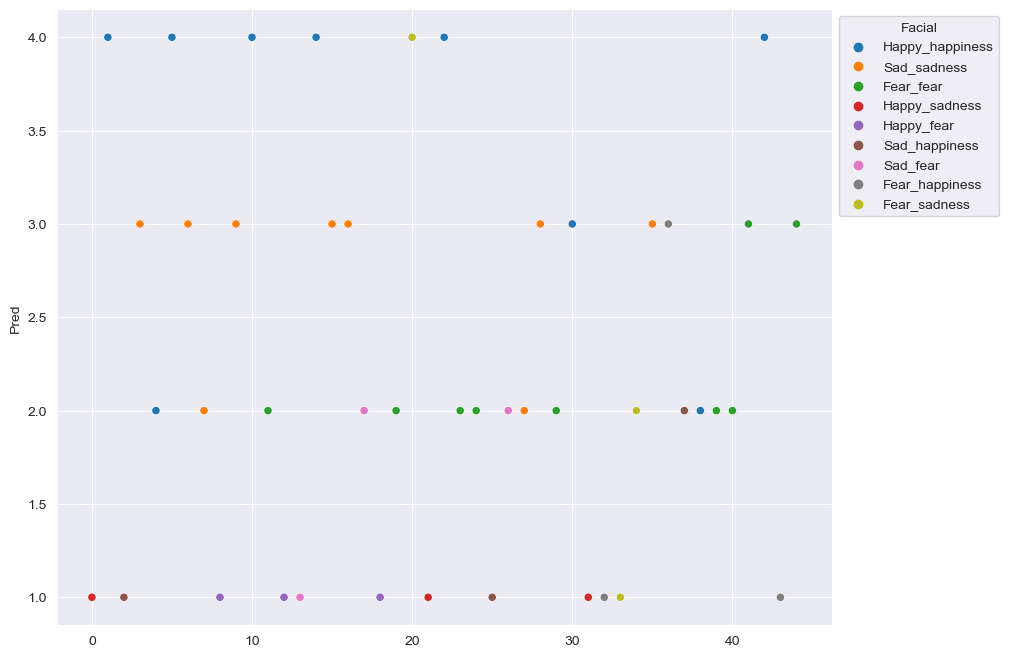

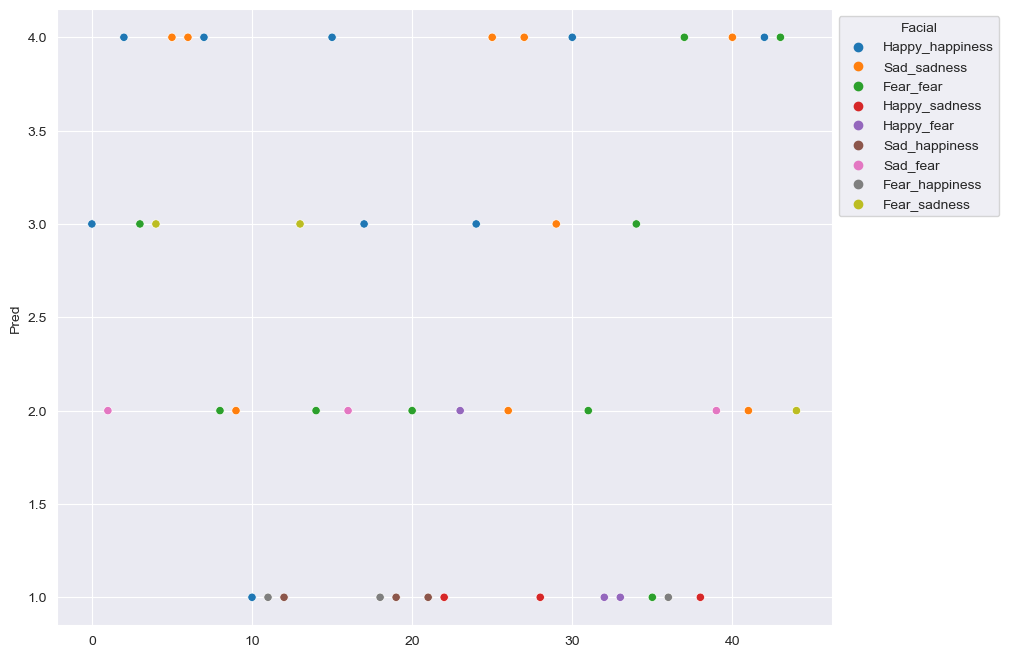

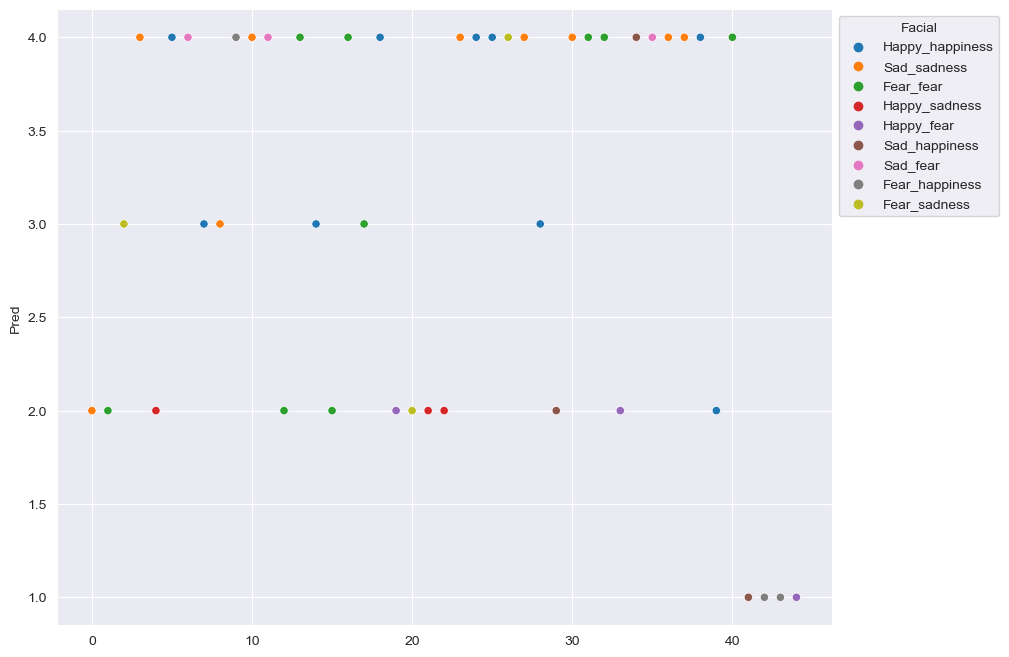

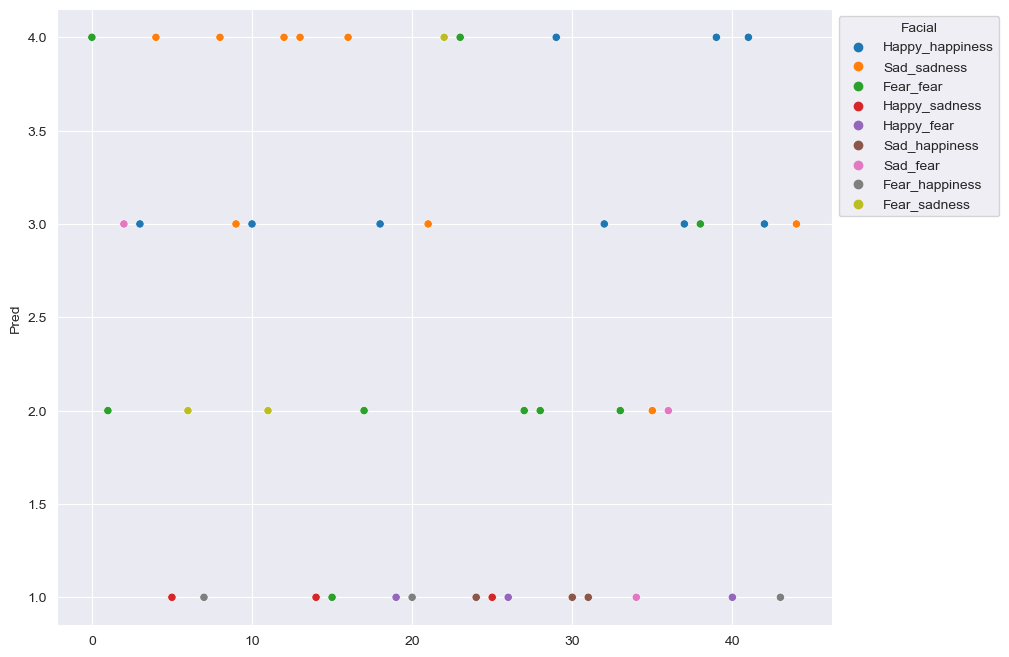

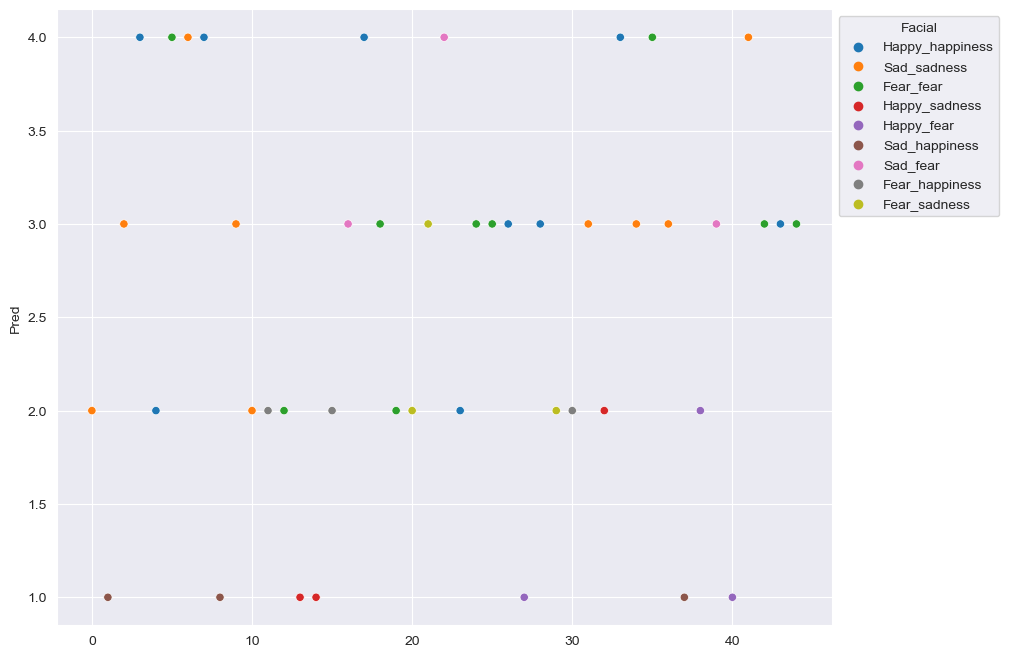

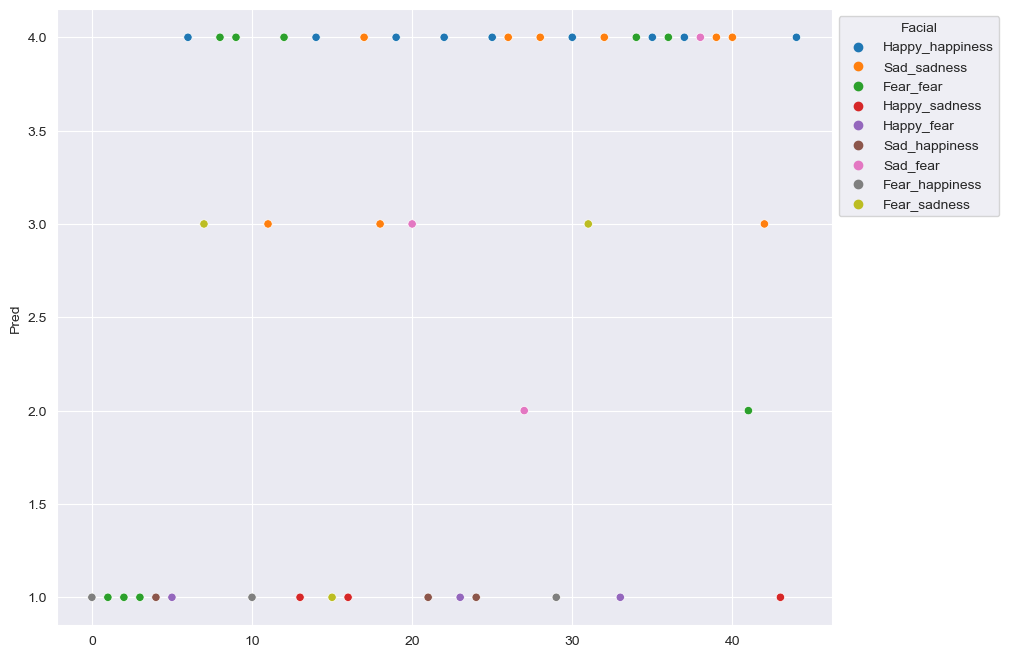

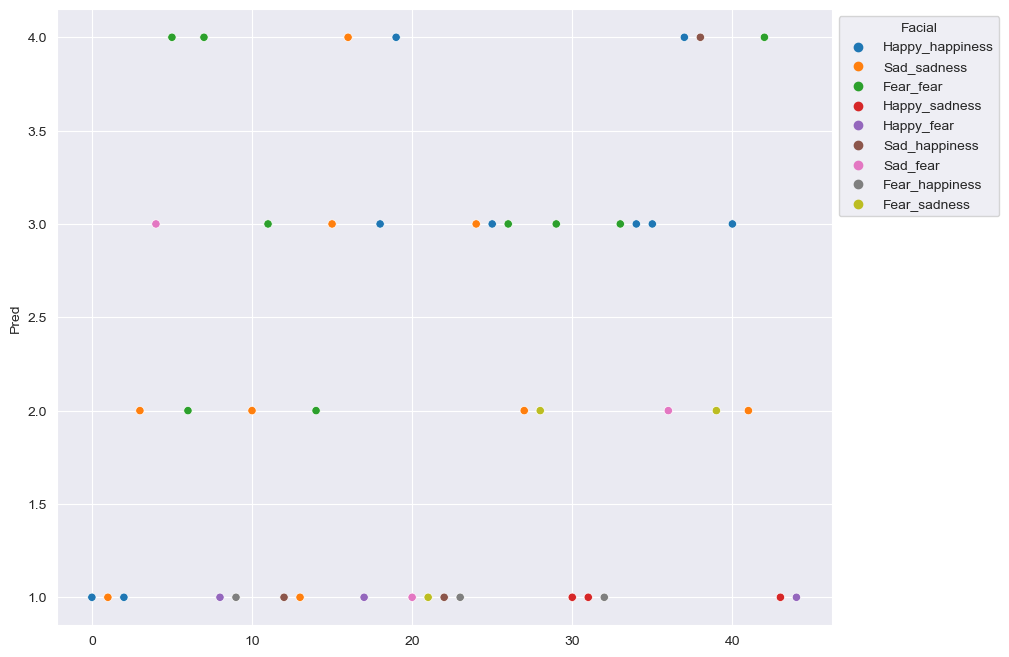

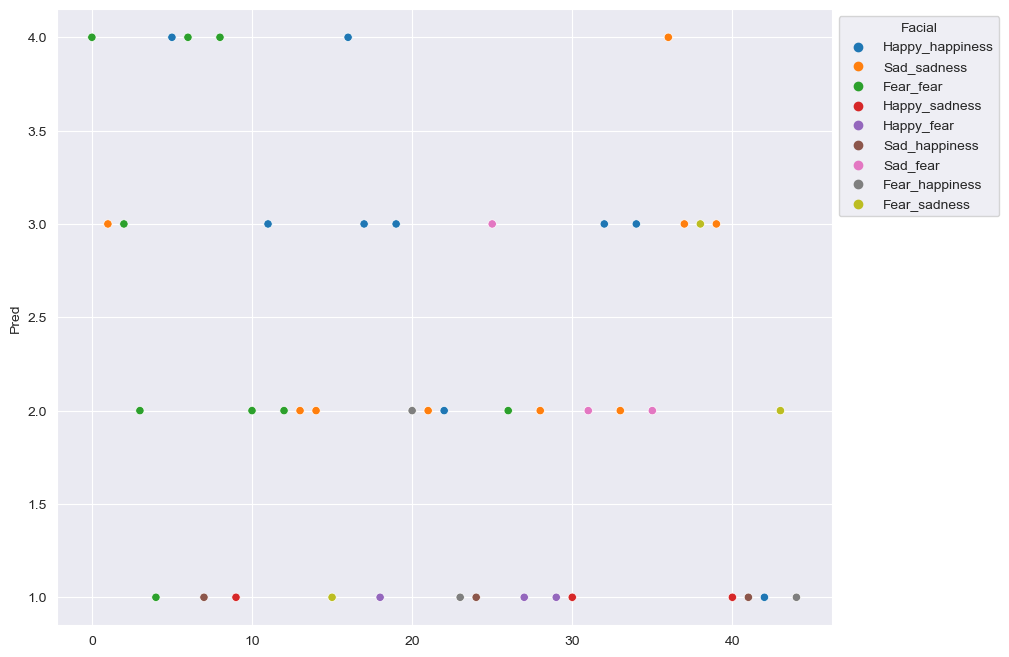

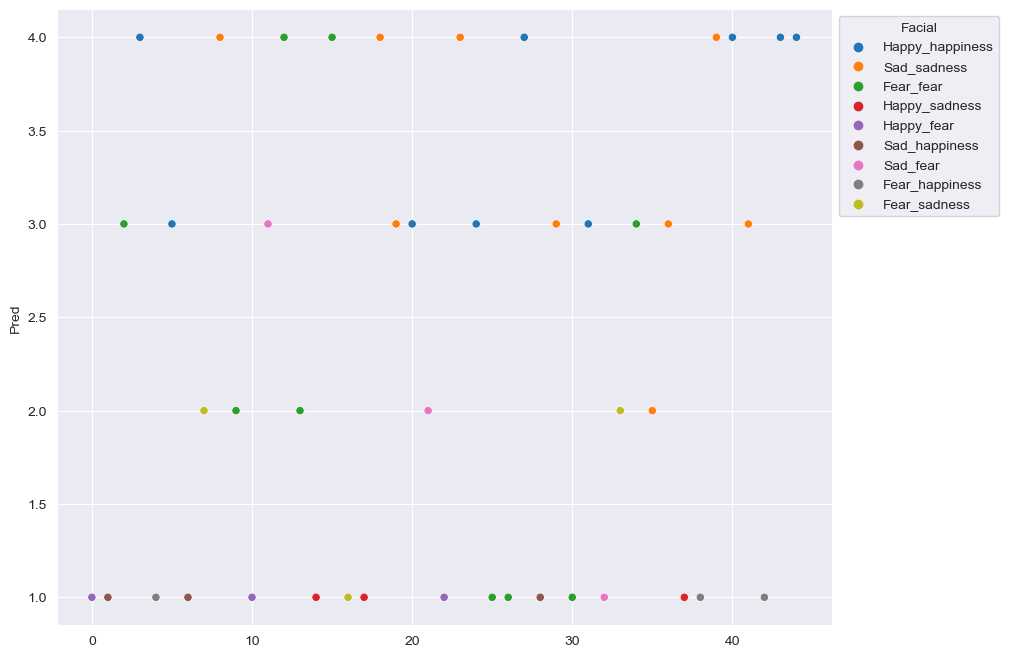

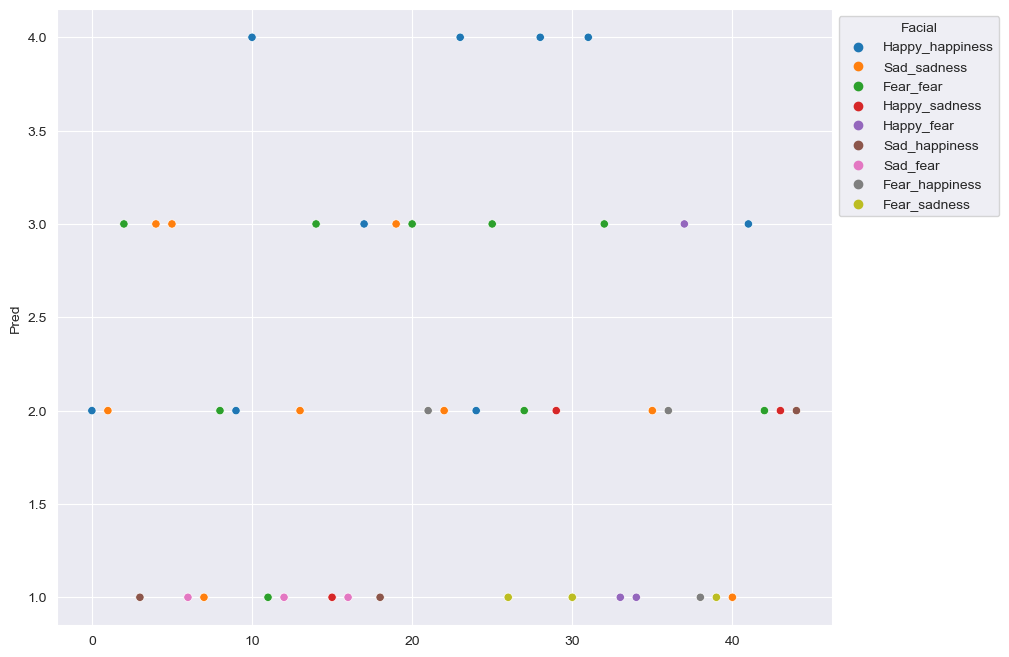

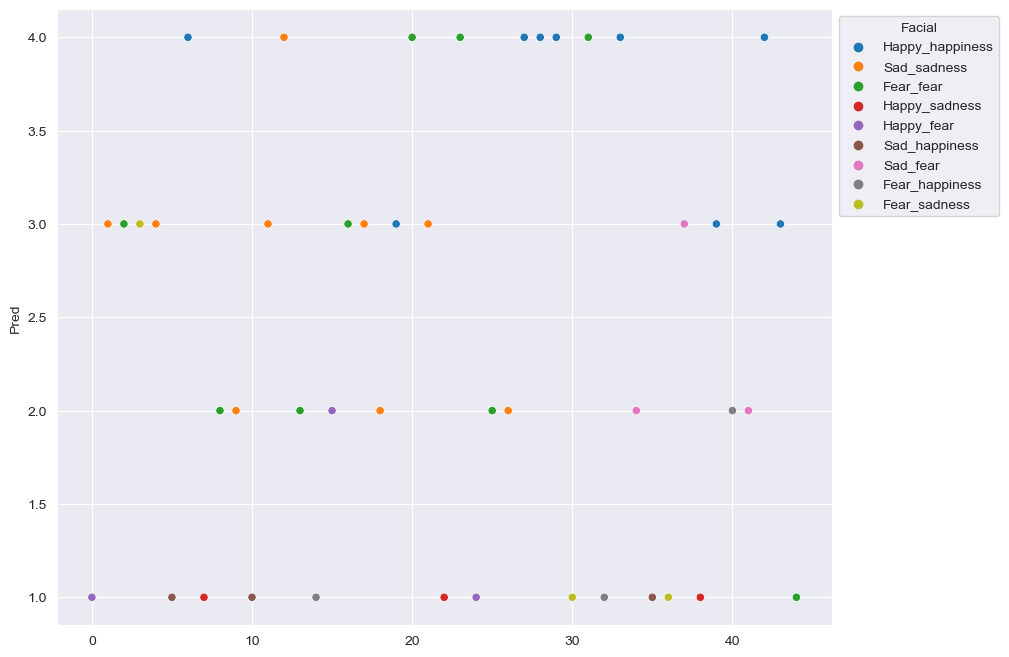

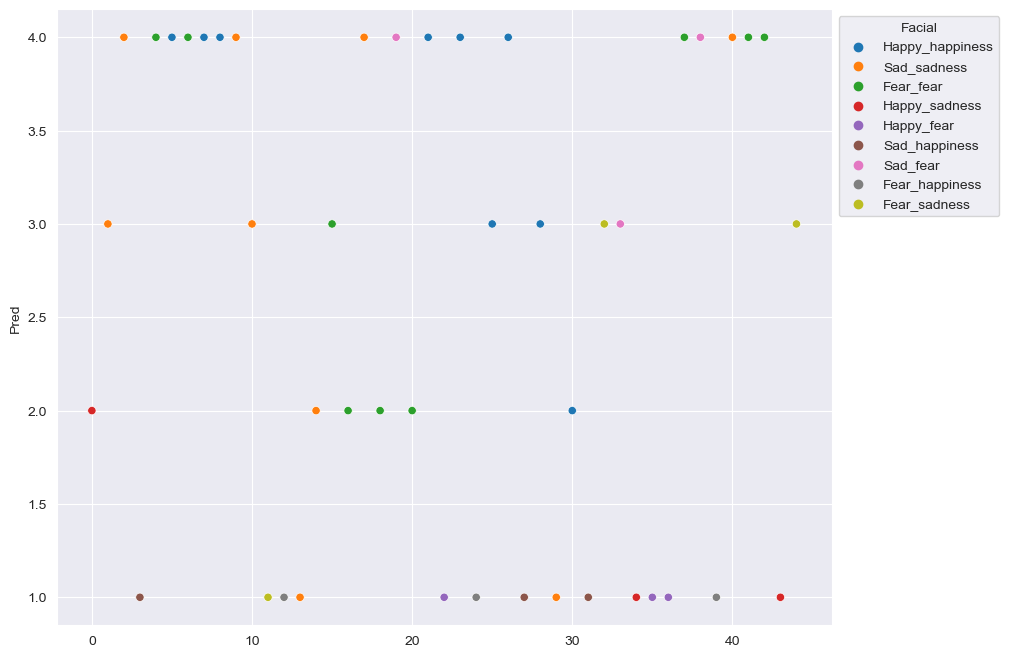

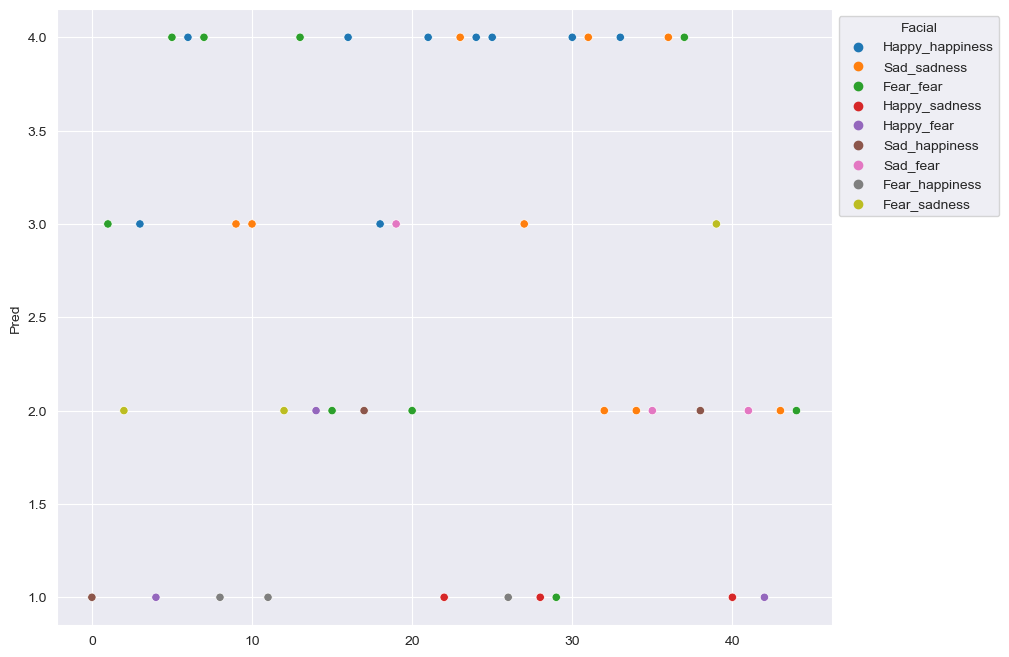

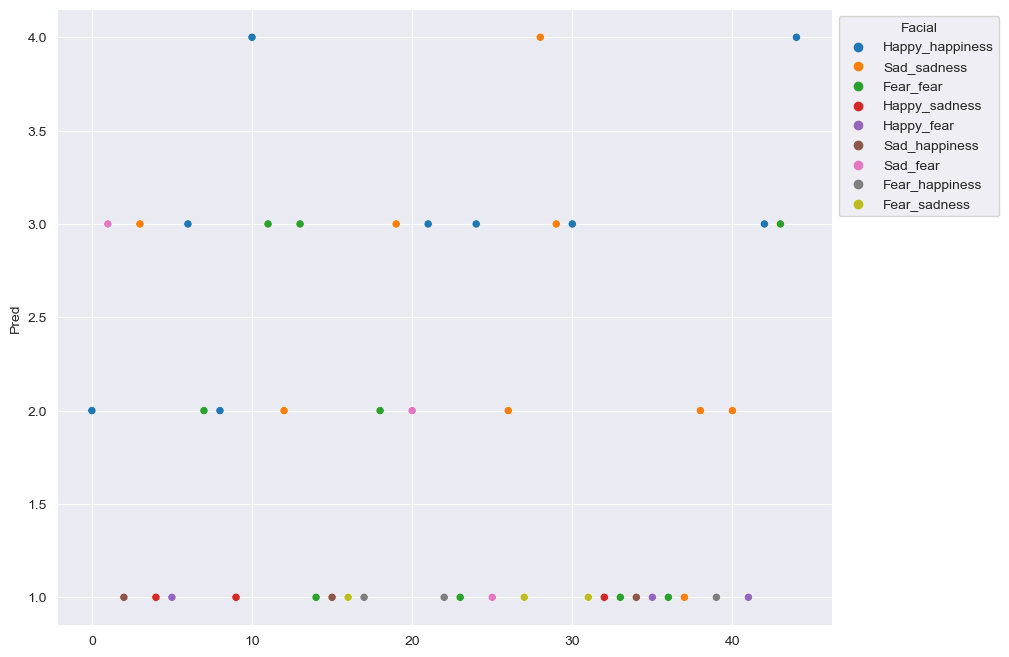

In [8]:
for id in BEBRASK_tasks_long.index.values:
    plt.figure(figsize=(10,8))
    ax = sns.scatterplot(data=subject_dict_all[id], x = list(range(45)), y = "Pred", hue= 'Facial',hue_order= ["Happy_happiness","Sad_sadness","Fear_fear","Happy_sadness","Happy_fear","Sad_happiness","Sad_fear","Fear_happiness","Fear_sadness"])
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
    plt.show()

Subject PREDWELL_RETOS-1001-1


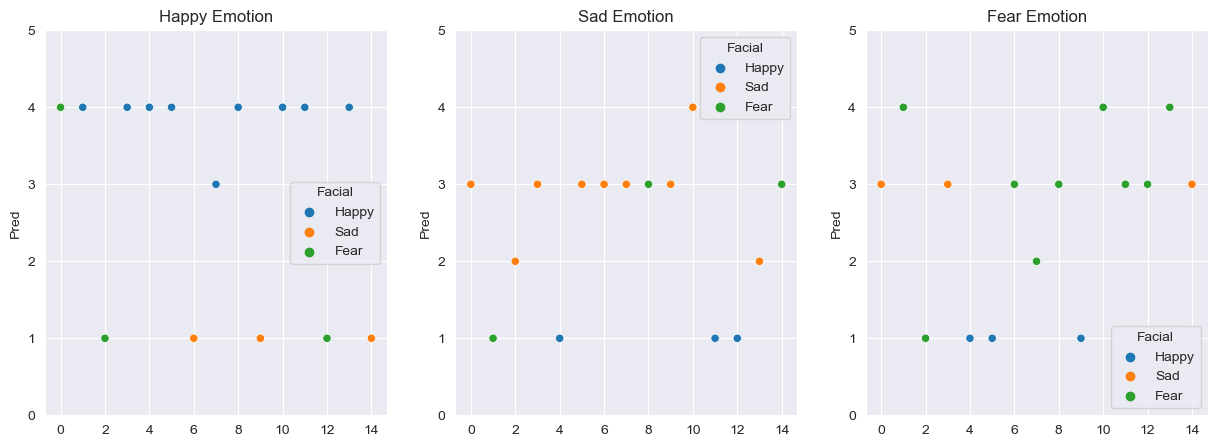

Subject PREDWELL_RETOS-1002-1


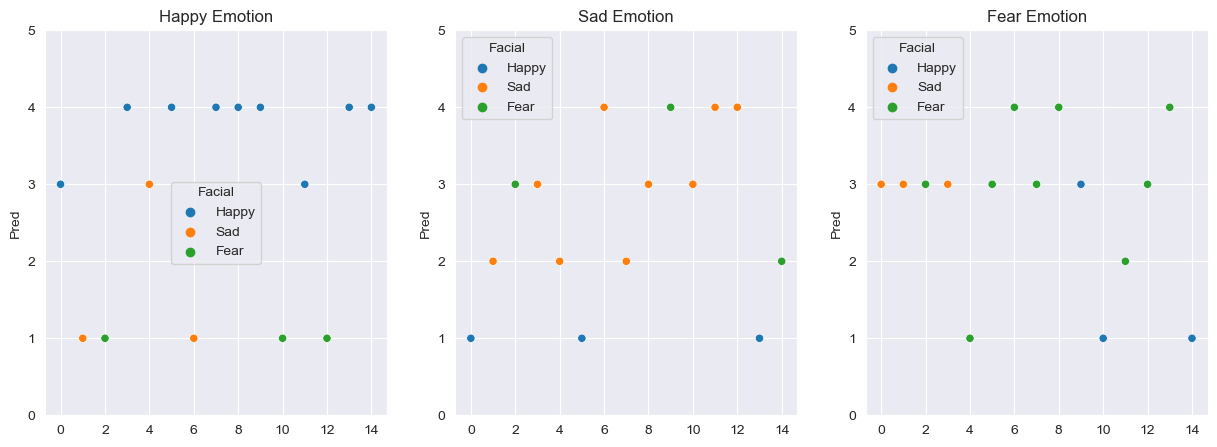

Subject PREDWELL_RETOS-1003-1


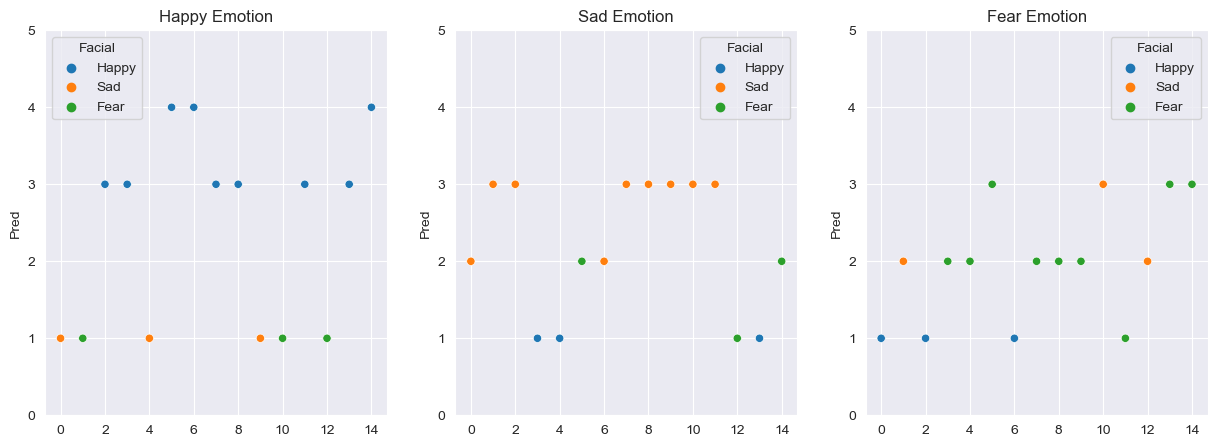

Subject PREDWELL_RETOS-1004-1


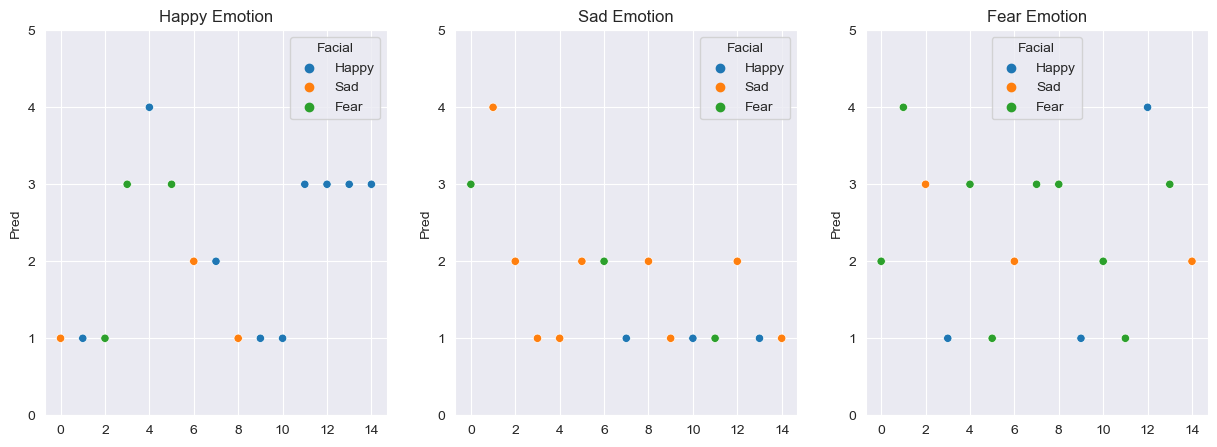

Subject PREDWELL_RETOS-1005-1


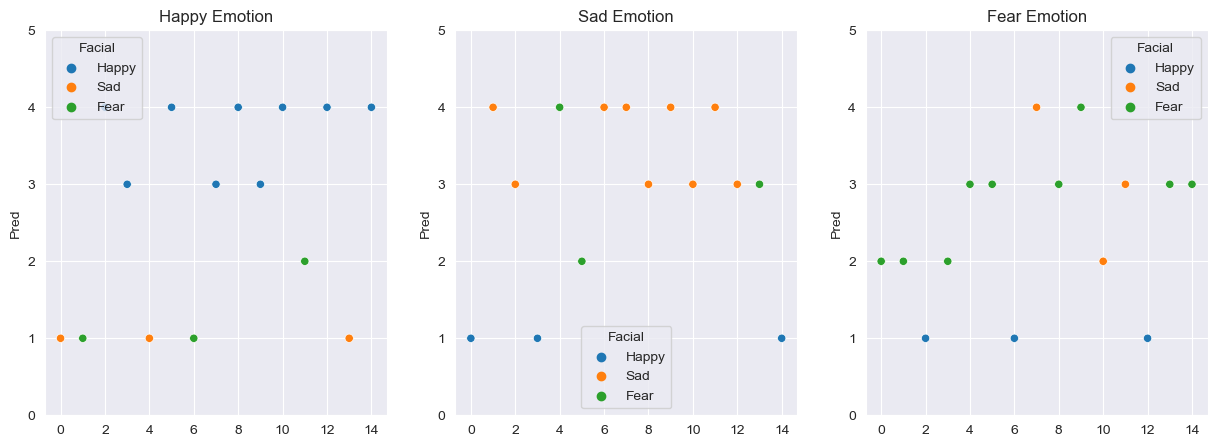

Subject PREDWELL_RETOS-1006-1


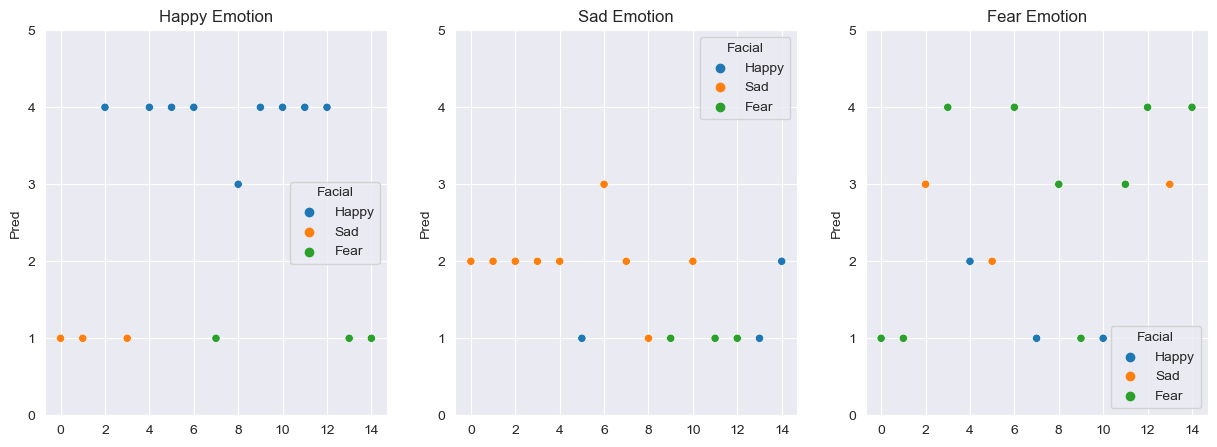

Subject PREDWELL_RETOS-1007-1


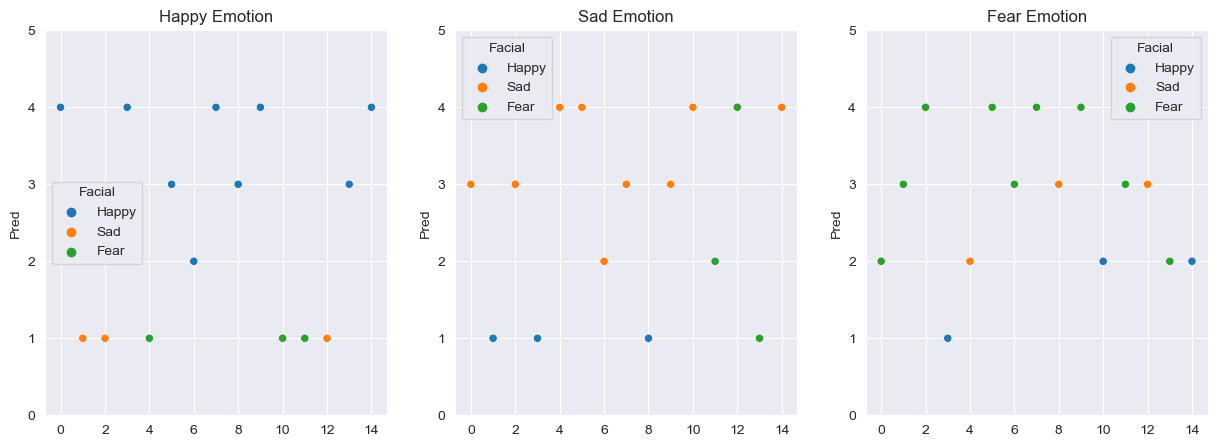

Subject PREDWELL_RETOS-1008-1


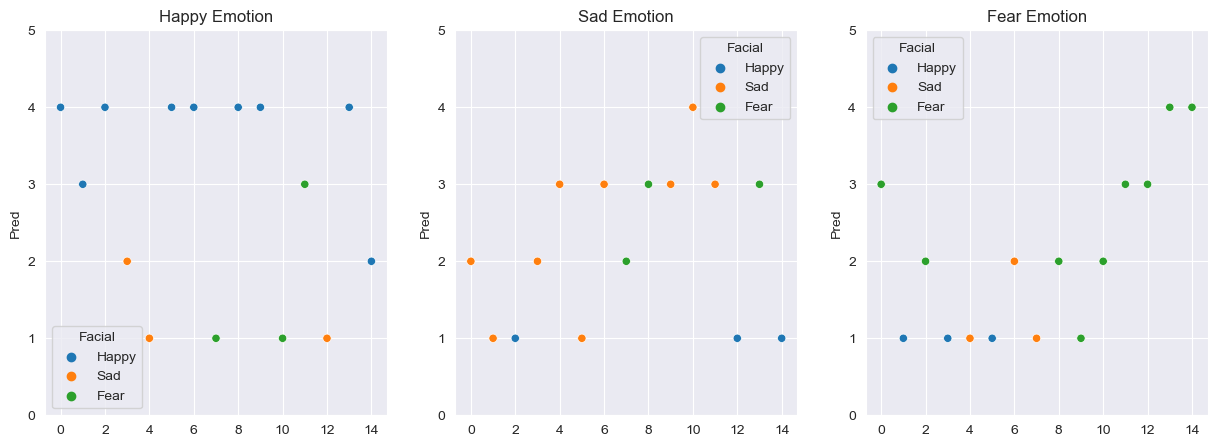

Subject PREDWELL_RETOS-1009-1


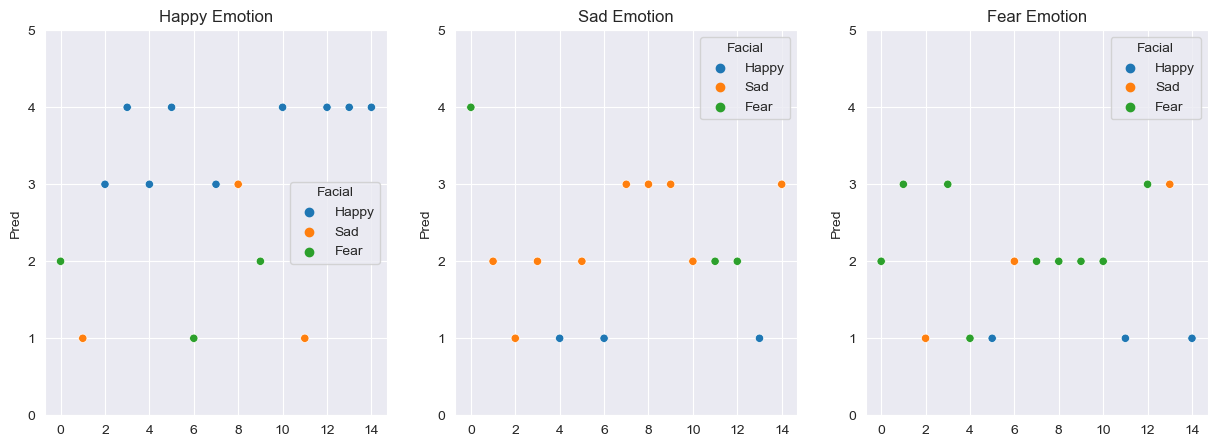

Subject PREDWELL_RETOS-1010-1


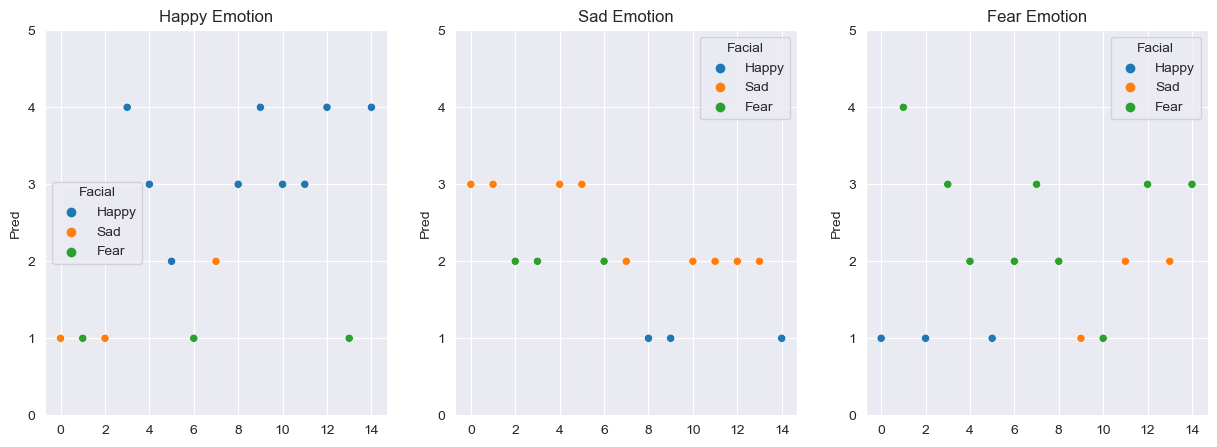

Subject PREDWELL_RETOS-1011-1


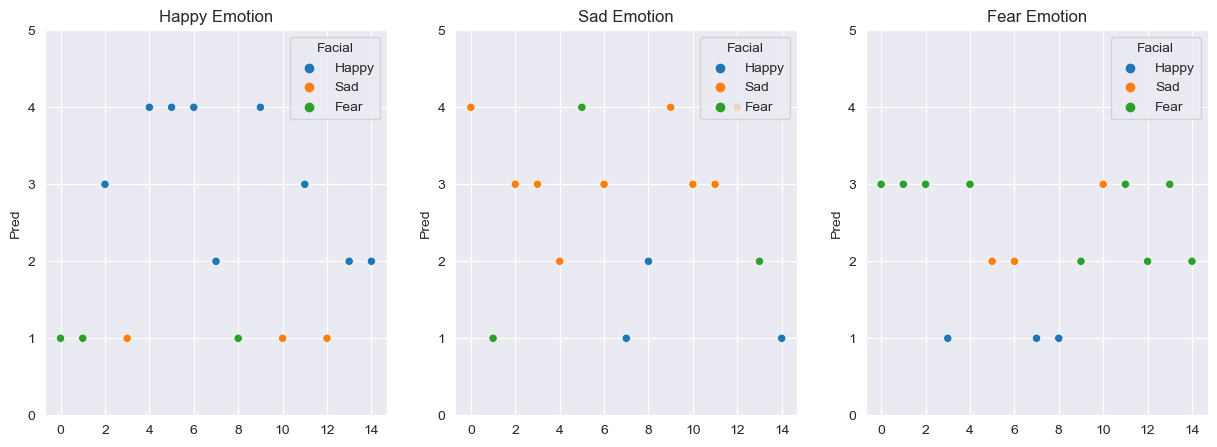

Subject PREDWELL_RETOS-1012-1


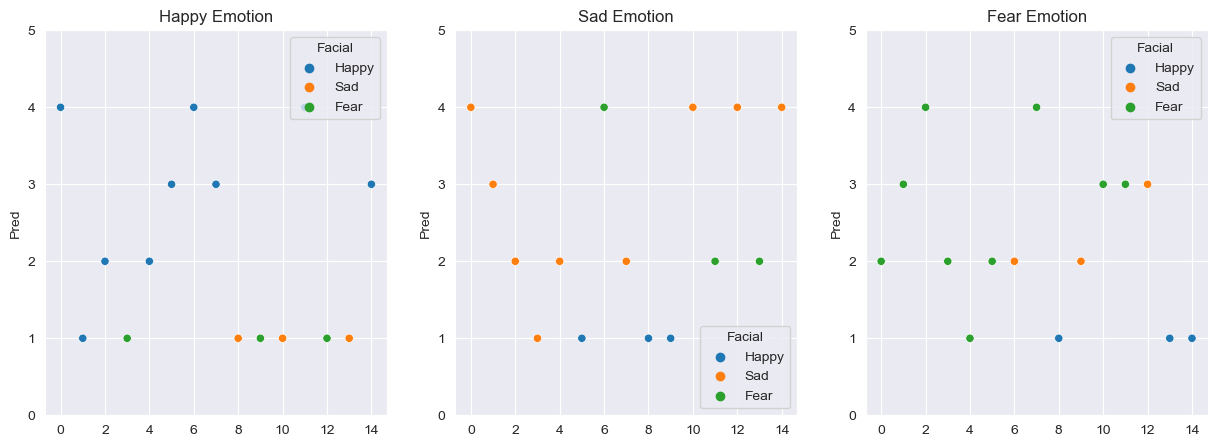

Subject PREDWELL_RETOS-1013-1


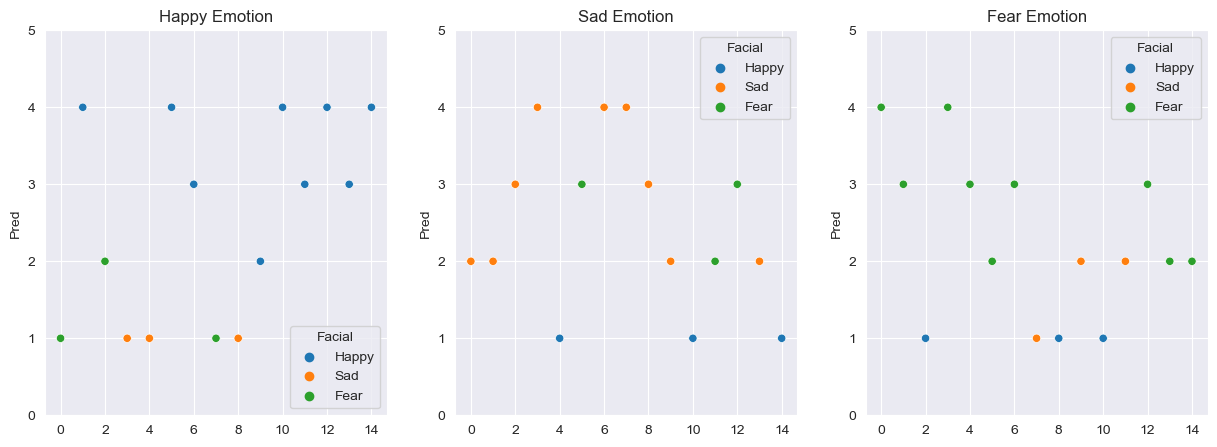

Subject PREDWELL_RETOS-1014-1


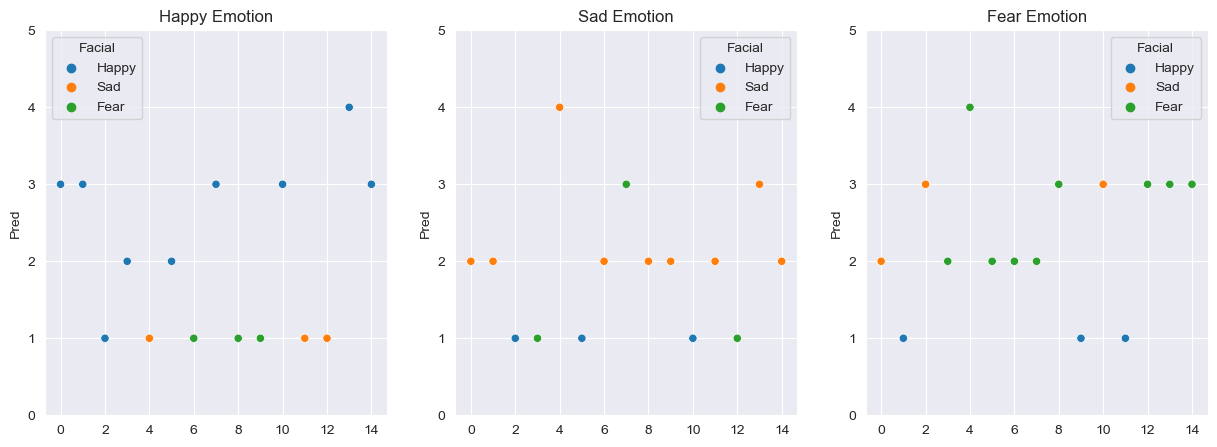

Subject PREDWELL_RETOS-1015-1


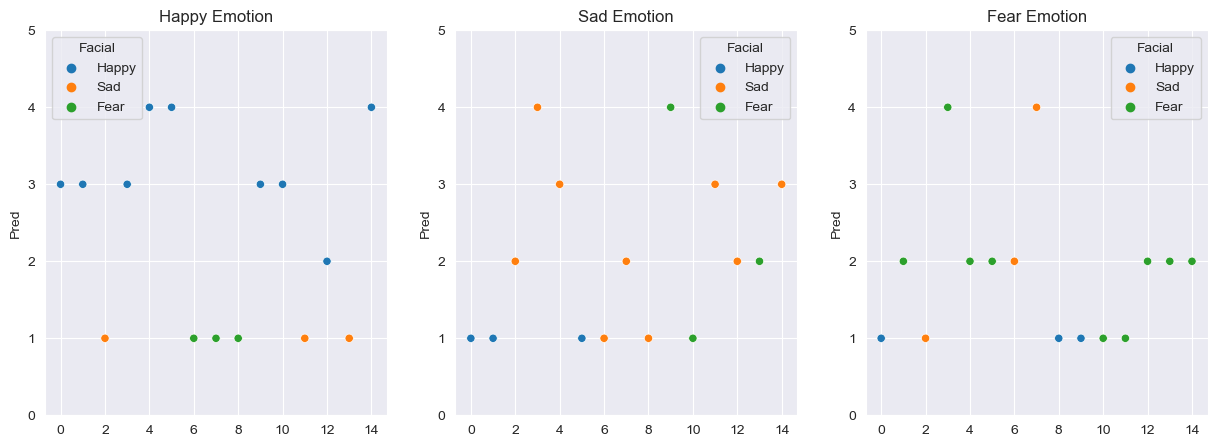

Subject PREDWELL_RETOS-1016-1


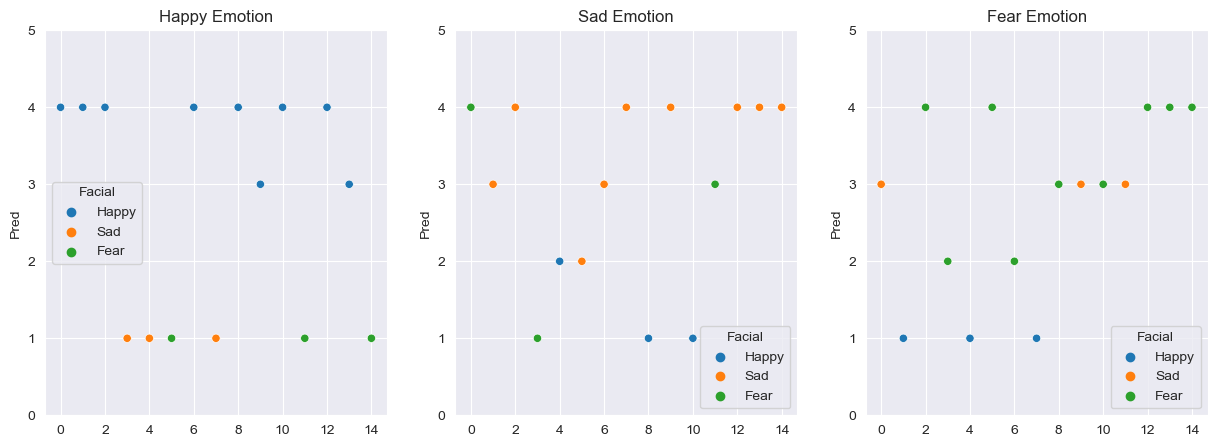

Subject PREDWELL_RETOS-1017-1


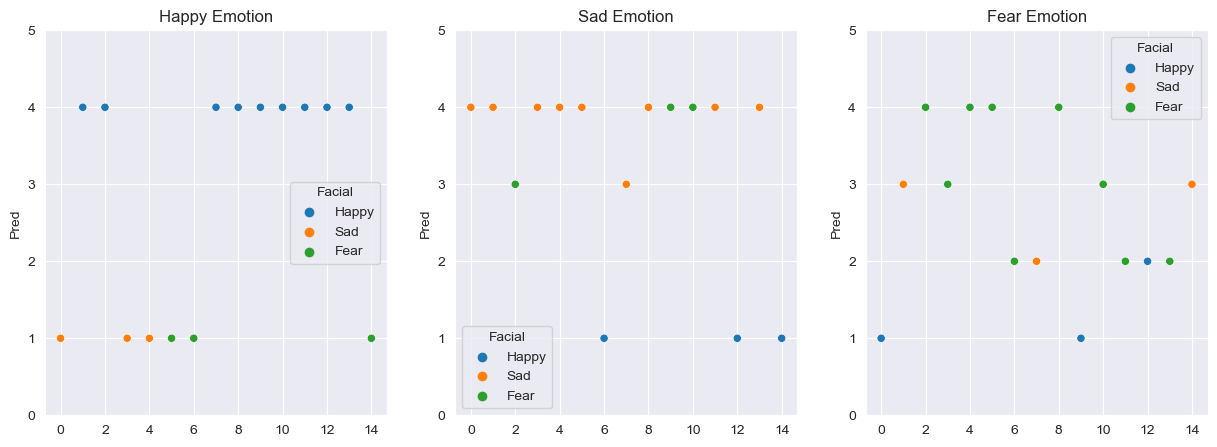

Subject PREDWELL_RETOS-1018-1


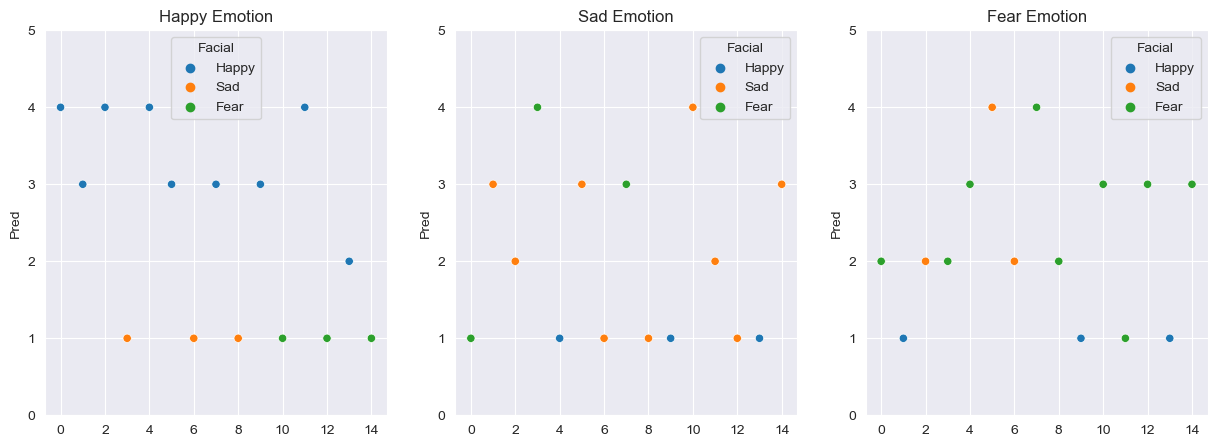

Subject PREDWELL_RETOS-1019-1


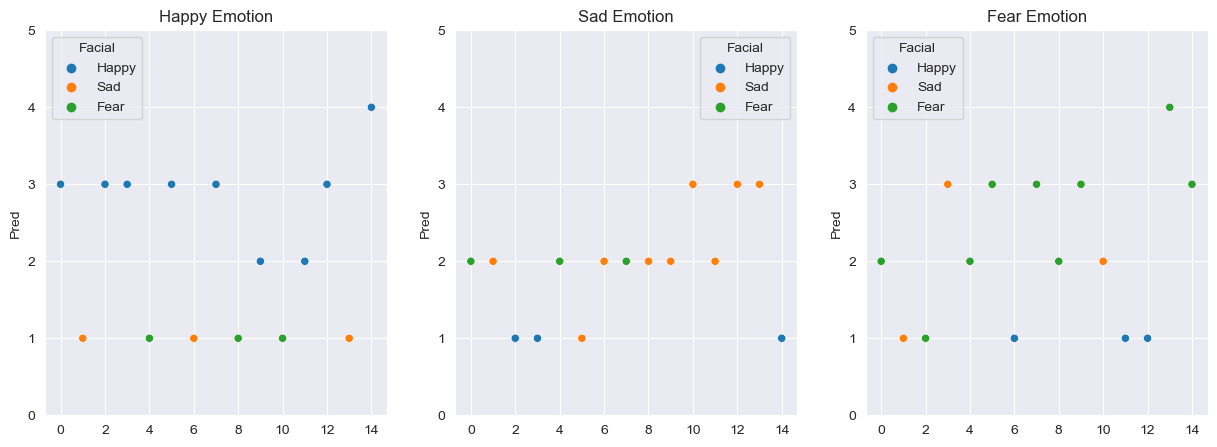

Subject PREDWELL_RETOS-1020-1


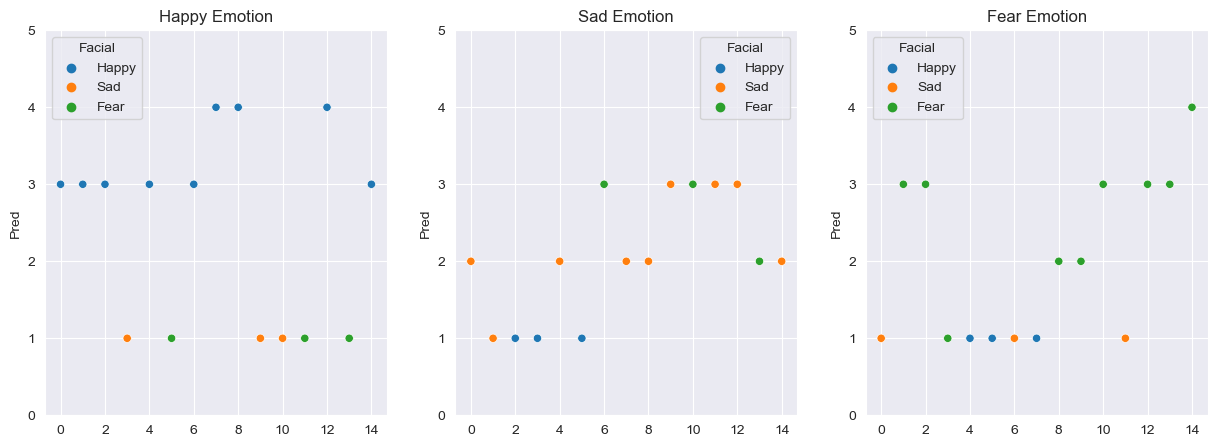

Subject PREDWELL_RETOS-1021-1


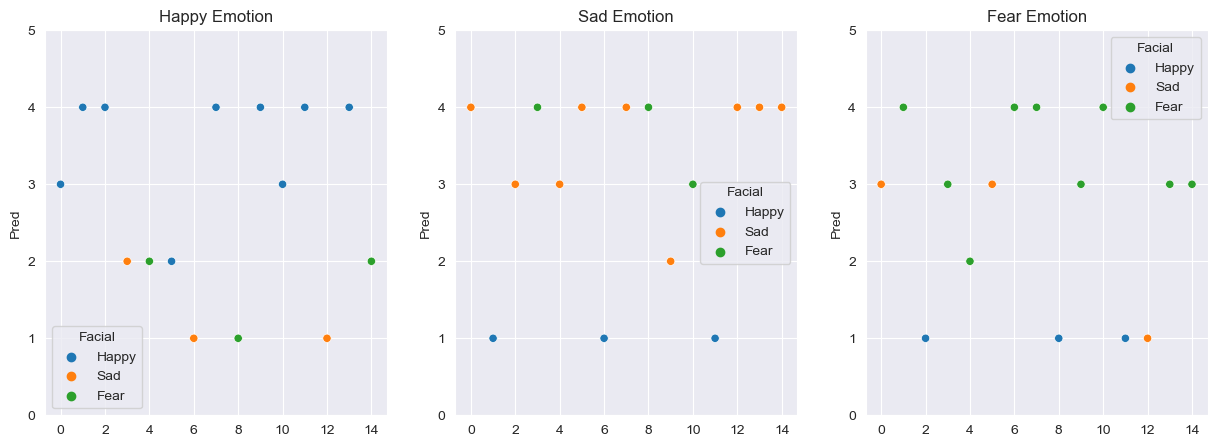

Subject PREDWELL_RETOS-1022-1


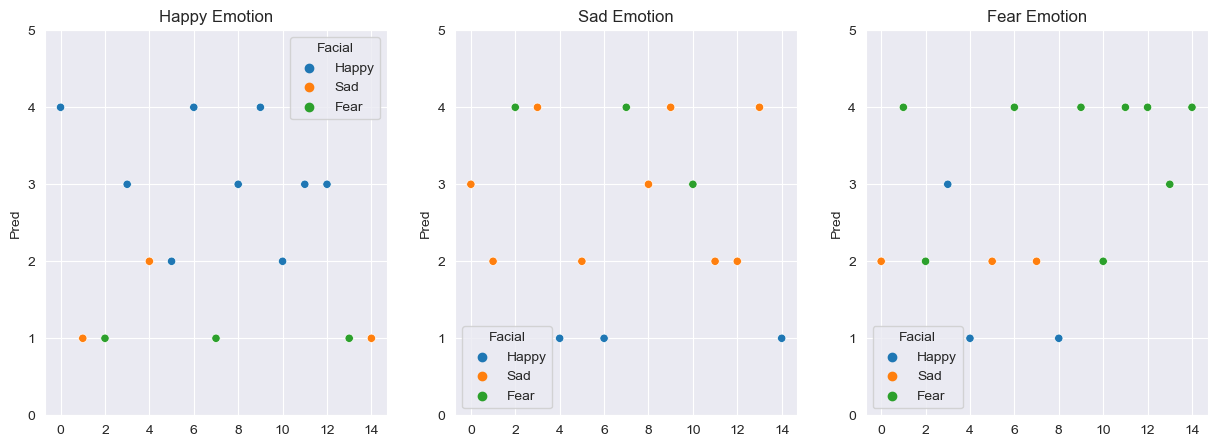

Subject PREDWELL_RETOS-1023-1


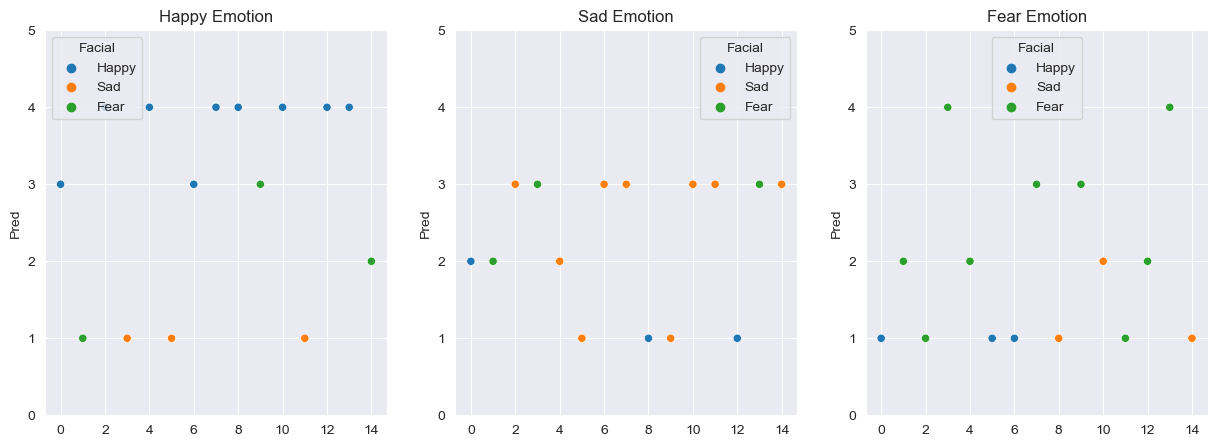

Subject PREDWELL_RETOS-1024-1


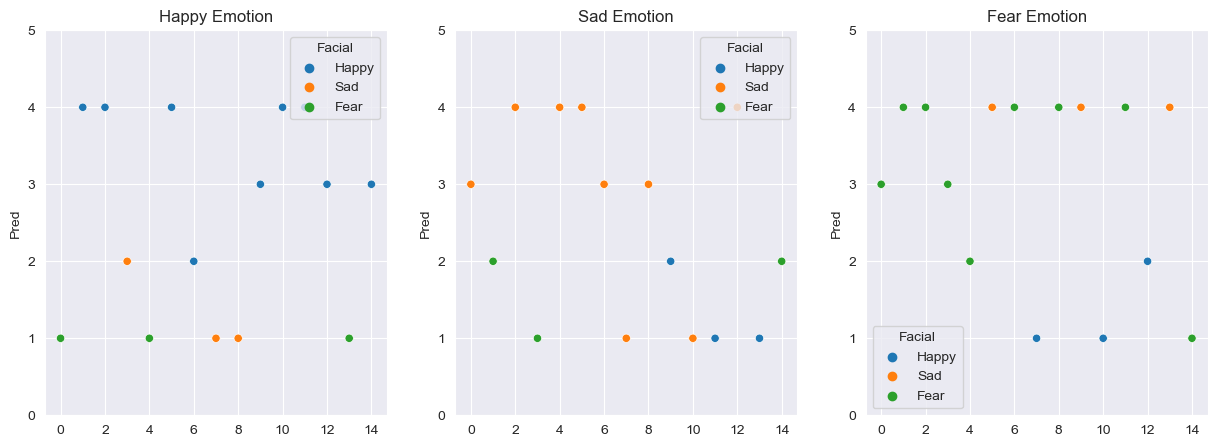

Subject PREDWELL_RETOS-1025-1


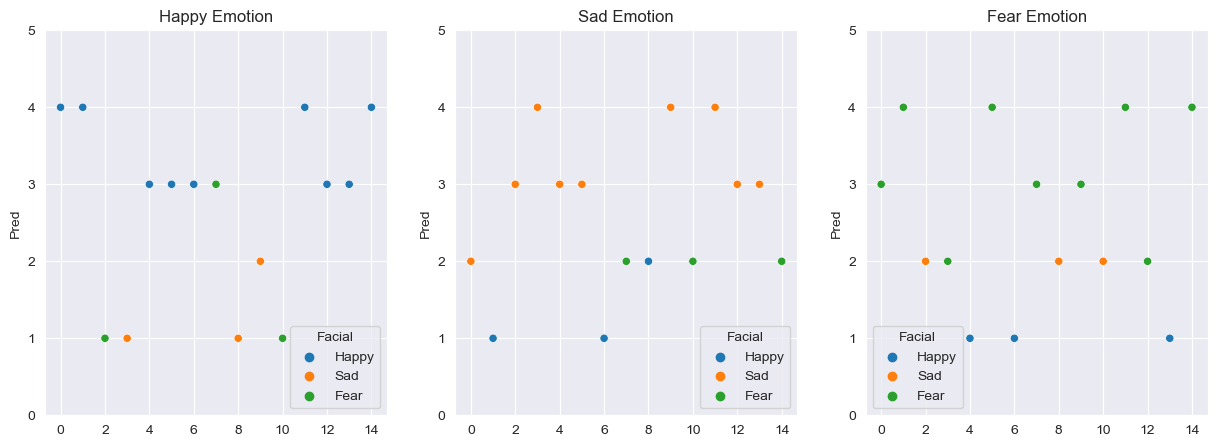

Subject PREDWELL_RETOS-1026-1


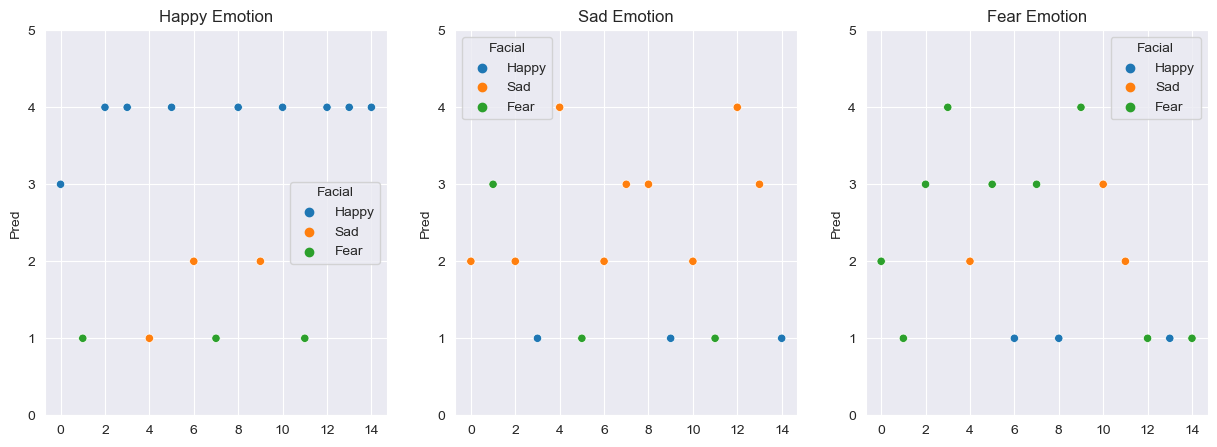

Subject PREDWELL_RETOS-1027-1


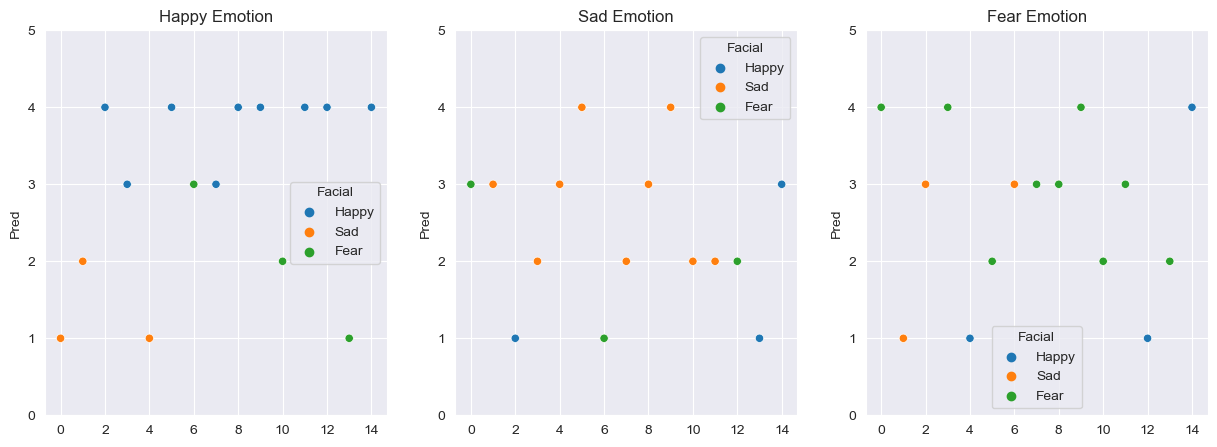

Subject PREDWELL_RETOS-1101-1


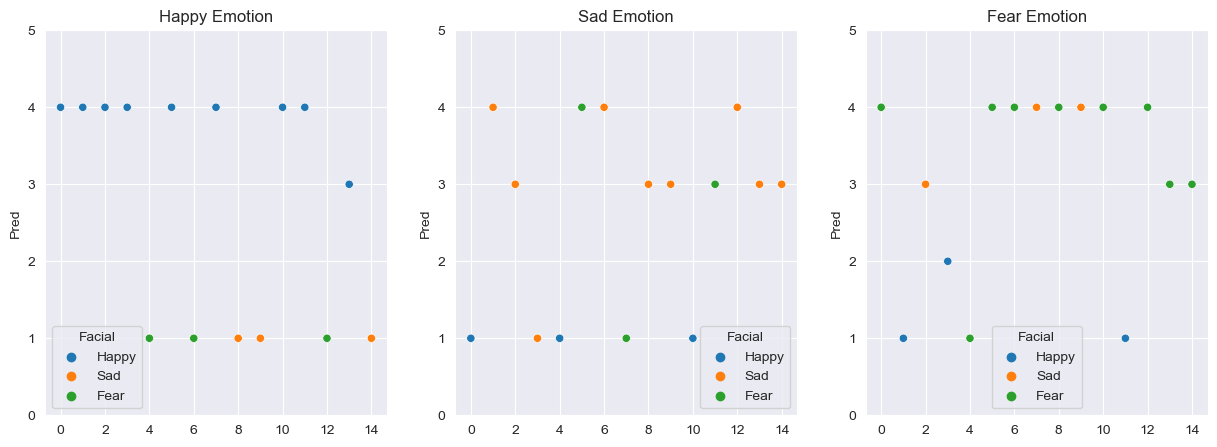

Subject PREDWELL_RETOS-1102-1


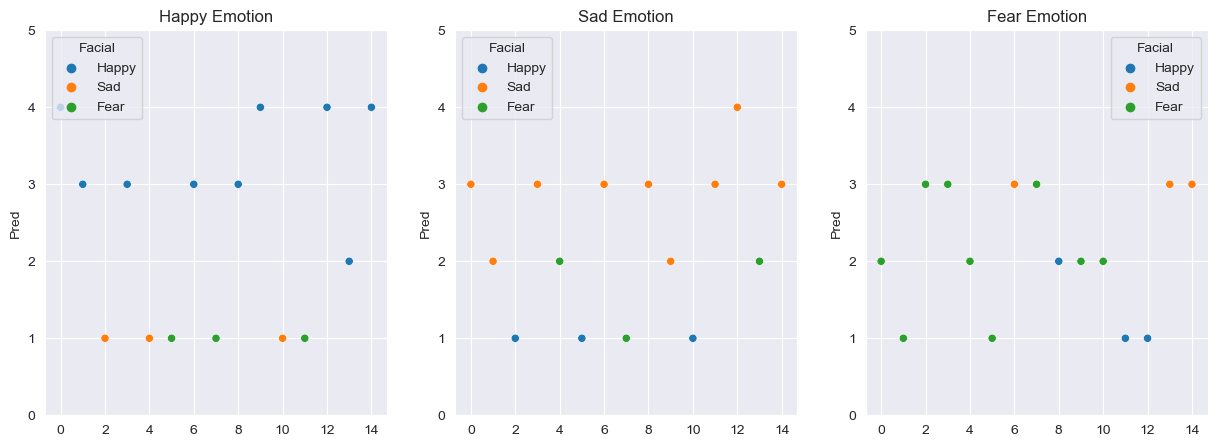

Subject PREDWELL_RETOS-1103-1


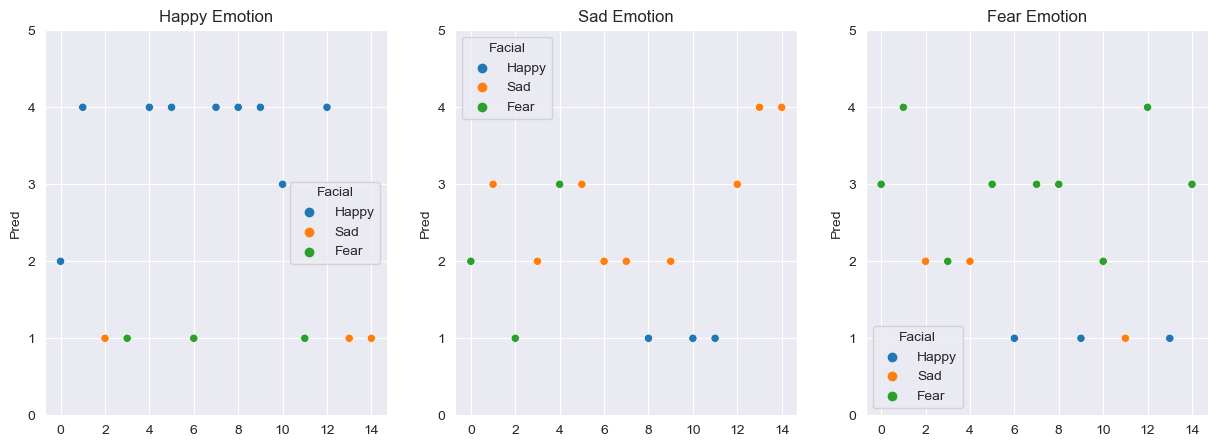

Subject PREDWELL_RETOS-1104-1


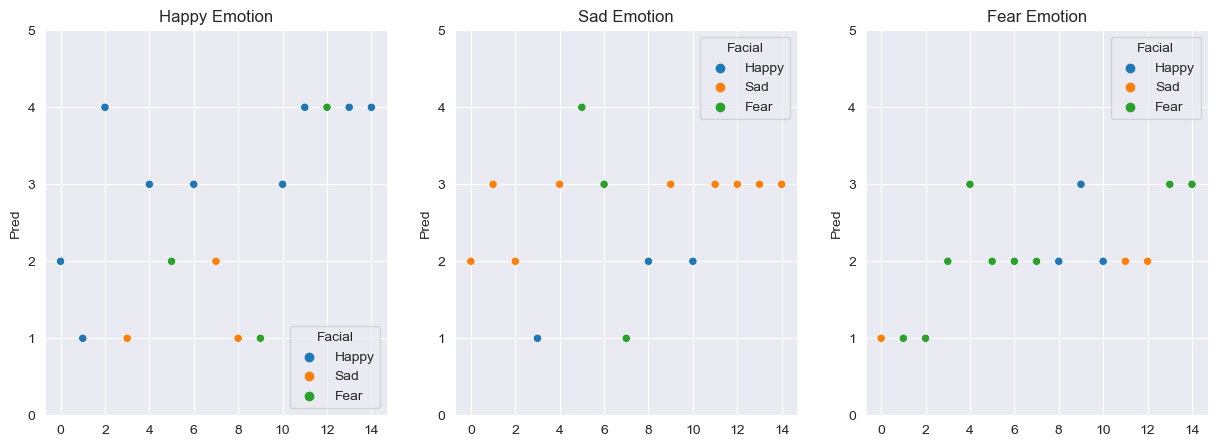

Subject PREDWELL_RETOS-1105-1


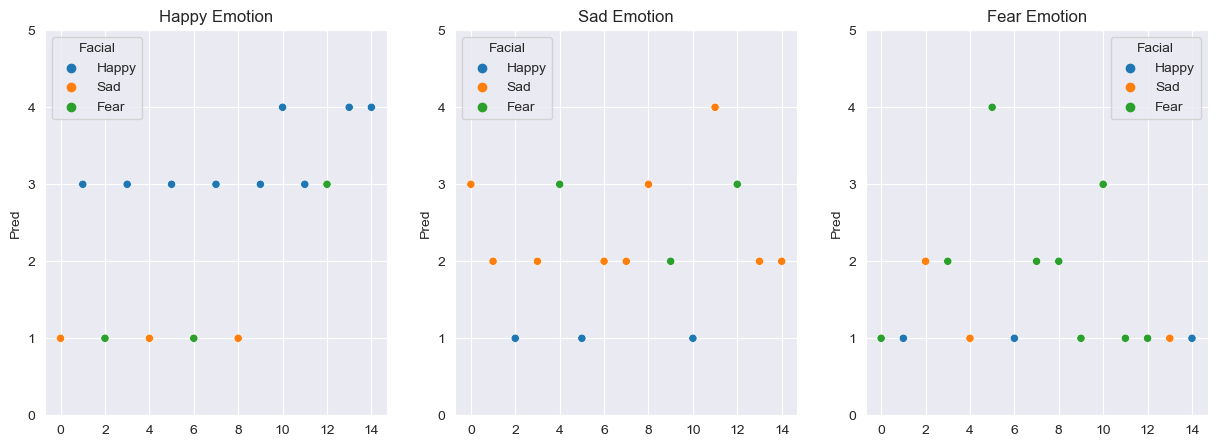

Subject PREDWELL_RETOS-1106-1


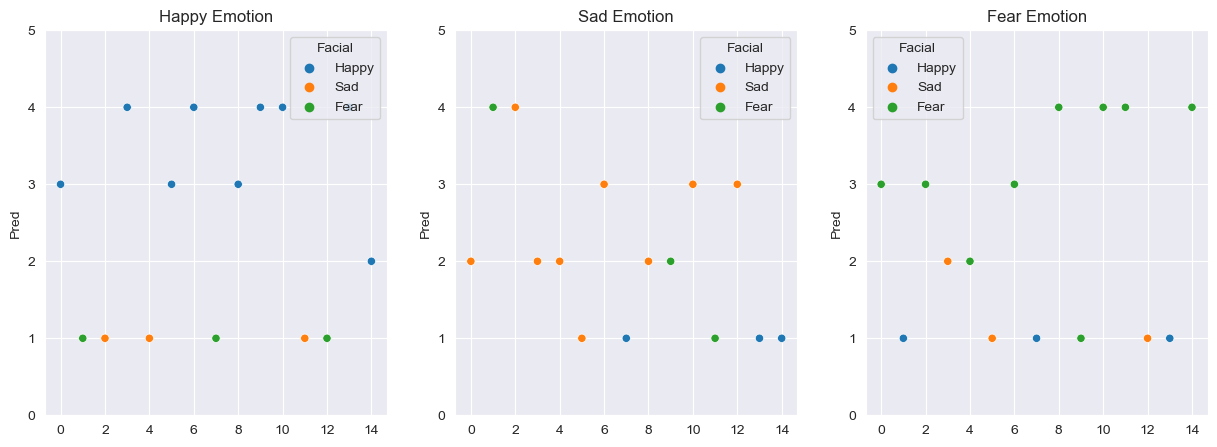

Subject PREDWELL_RETOS-1107-1


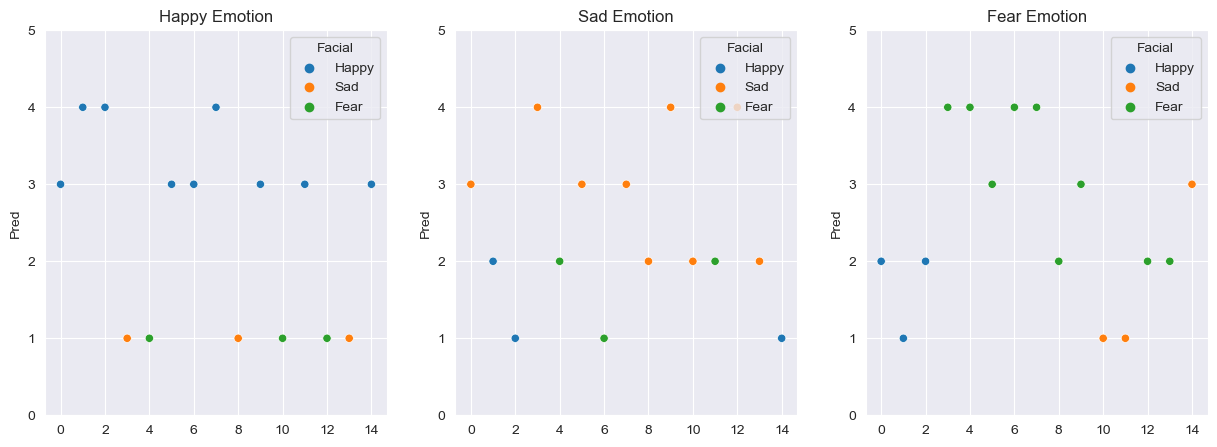

Subject PREDWELL_RETOS-1108-1


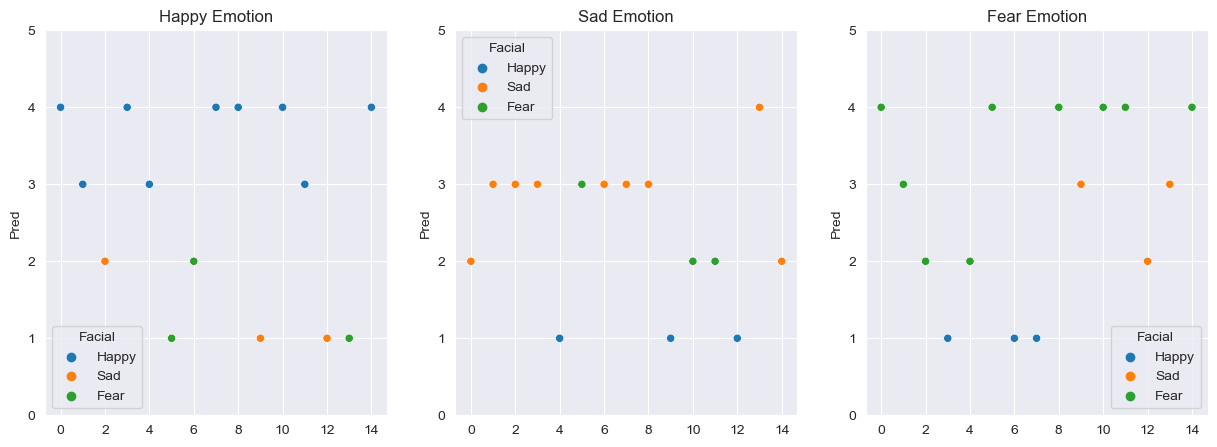

Subject PREDWELL_RETOS-1109-1


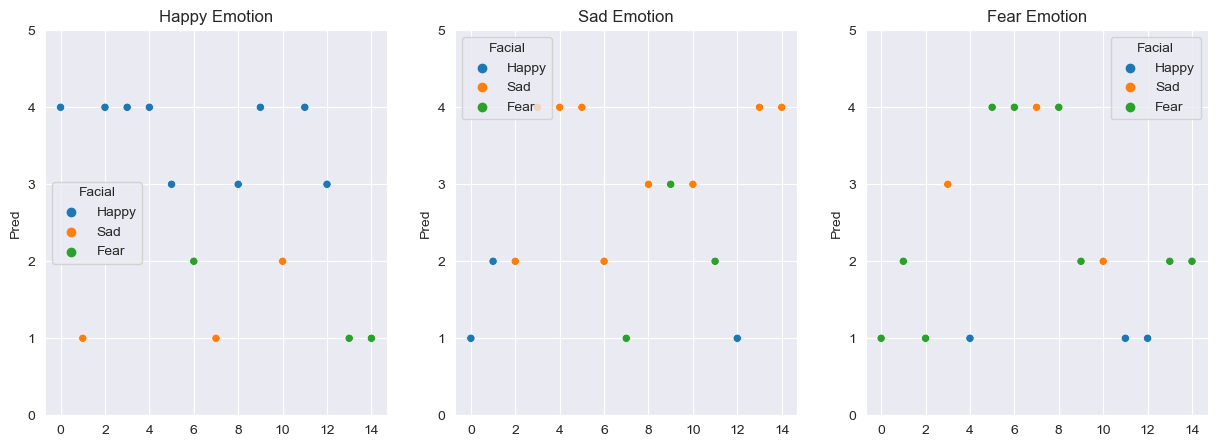

Subject PREDWELL_RETOS-1110-1


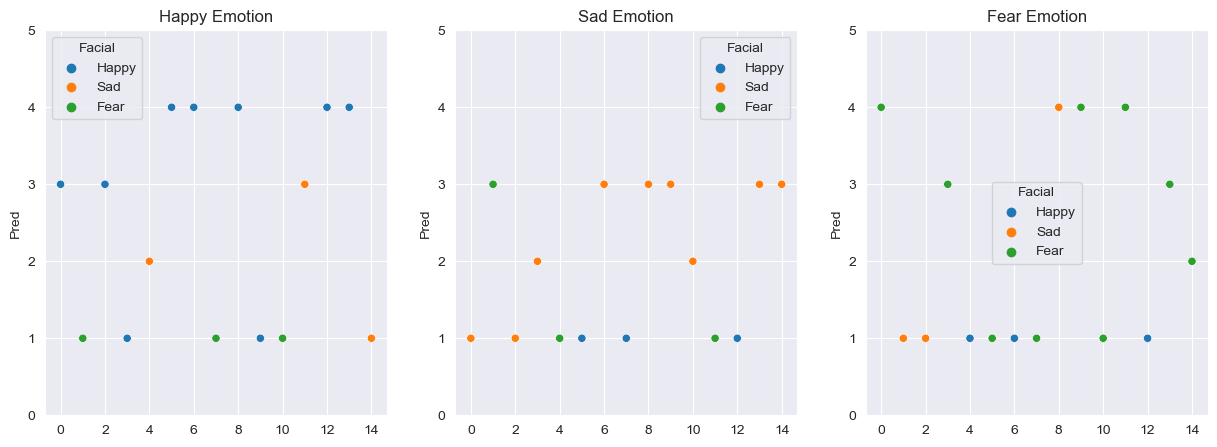

Subject PREDWELL_RETOS-1111-1


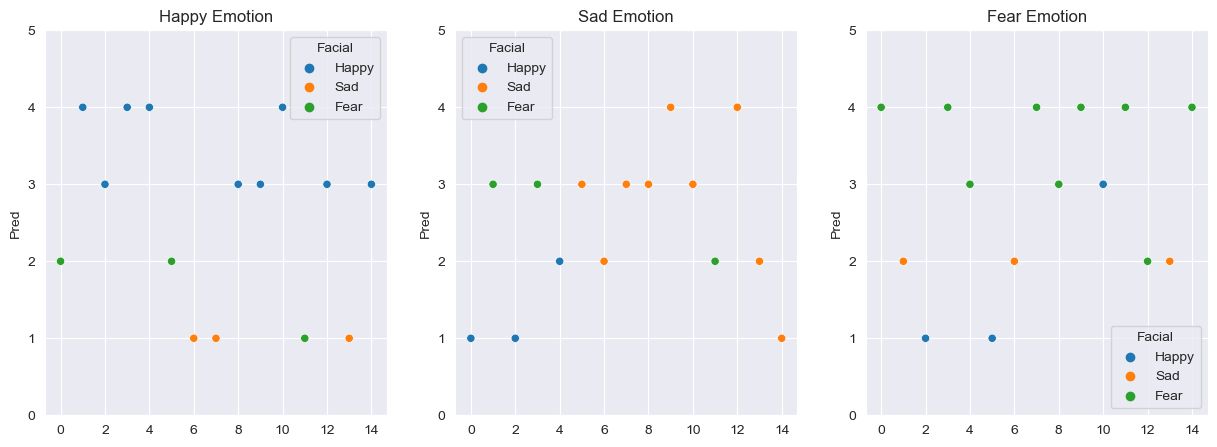

Subject PREDWELL_RETOS-1112-1


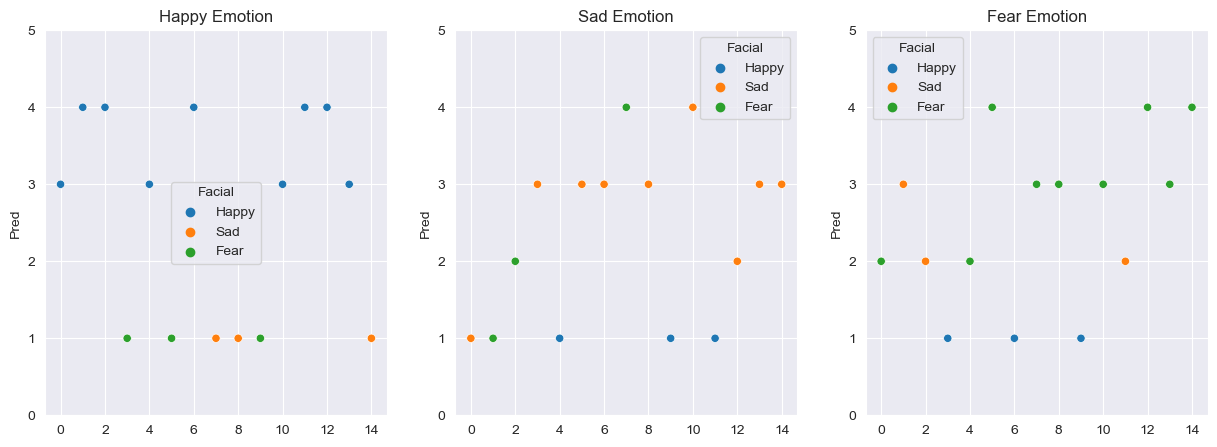

Subject PREDWELL_RETOS-1113-1


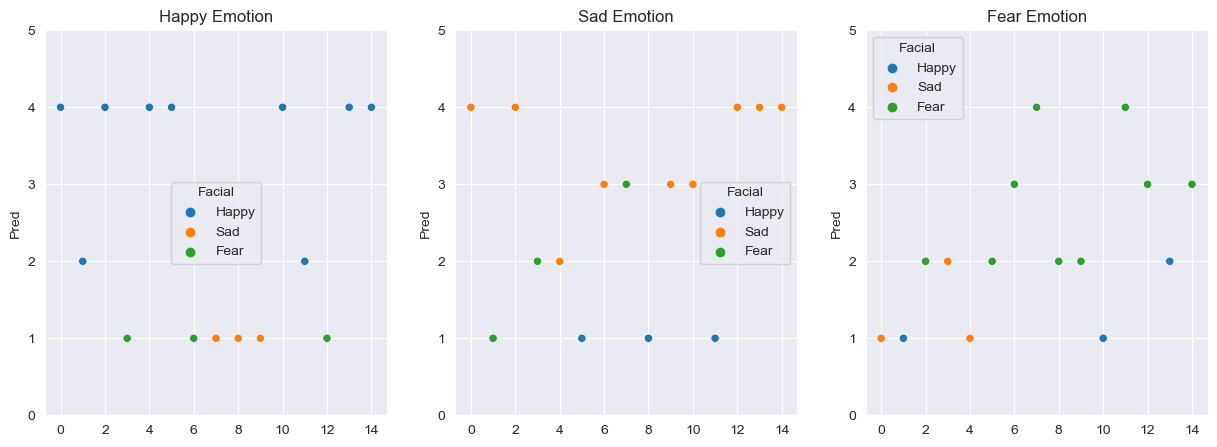

Subject PREDWELL_RETOS-1114-1


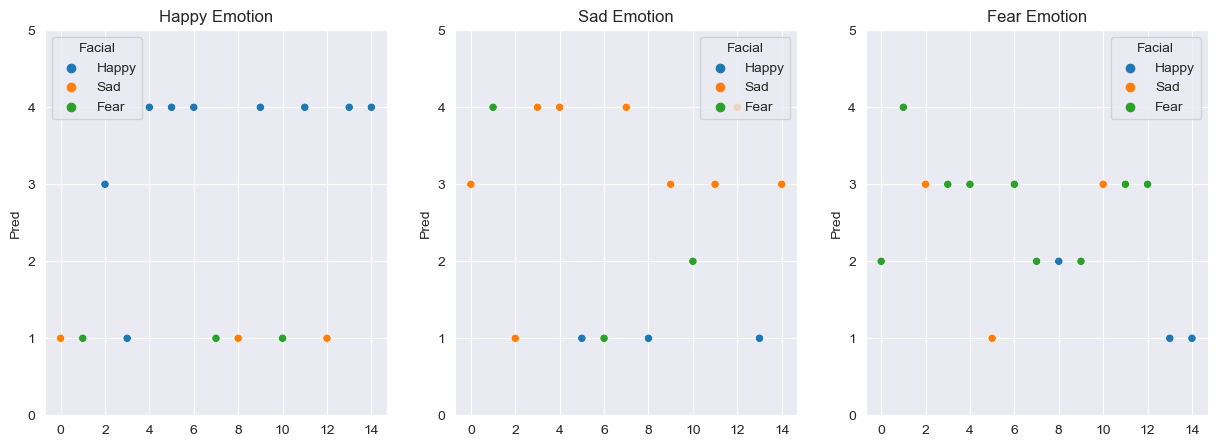

Subject PREDWELL_RETOS-1115-1


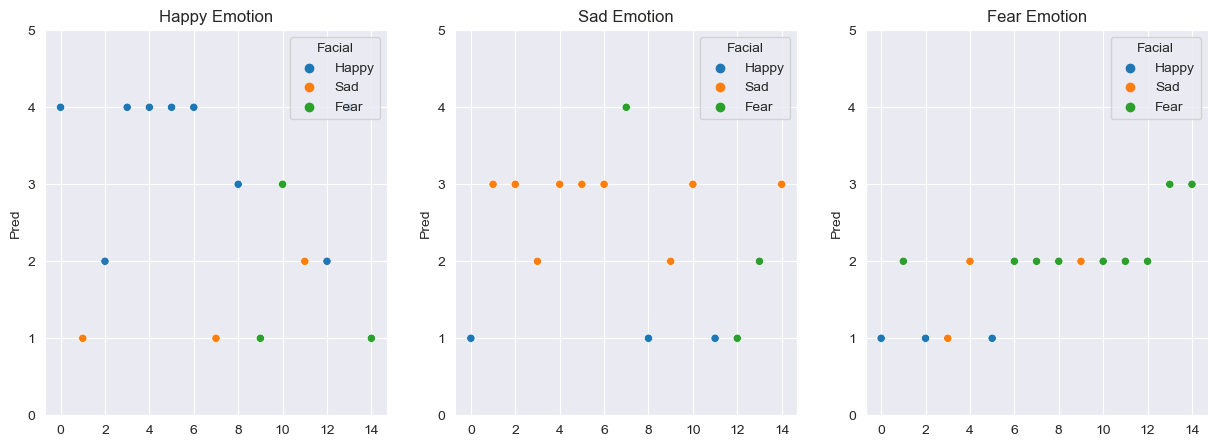

Subject PREDWELL_RETOS-1116-1


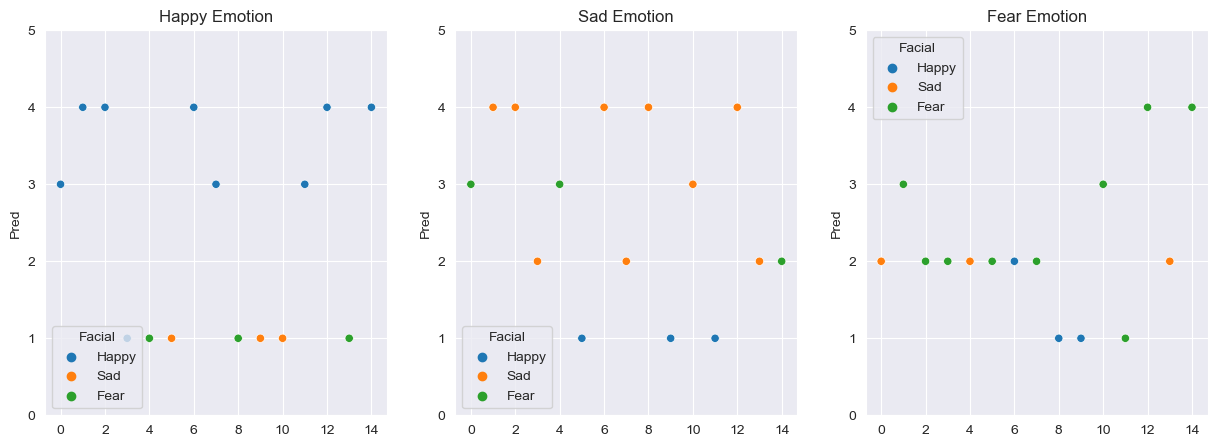

Subject PREDWELL_RETOS-1117-1


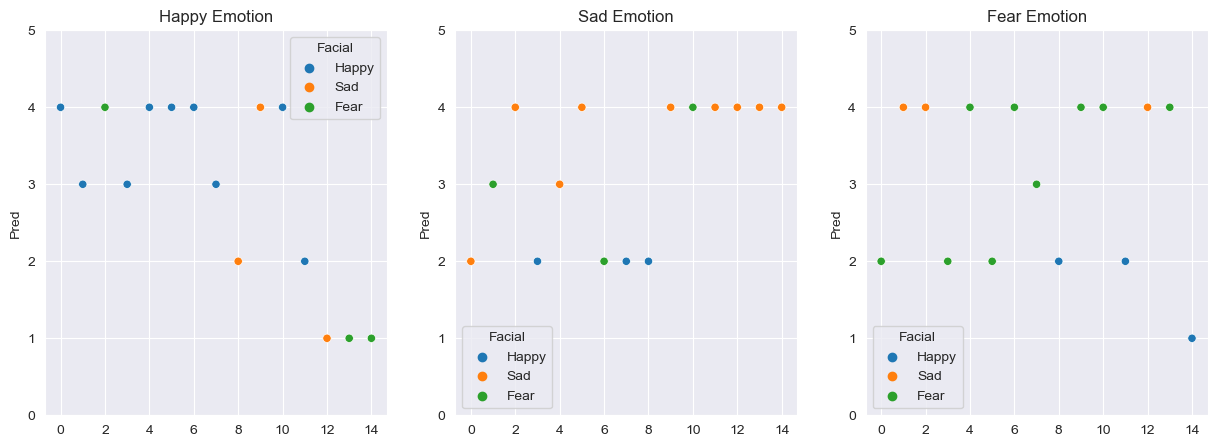

Subject PREDWELL_RETOS-1118-1


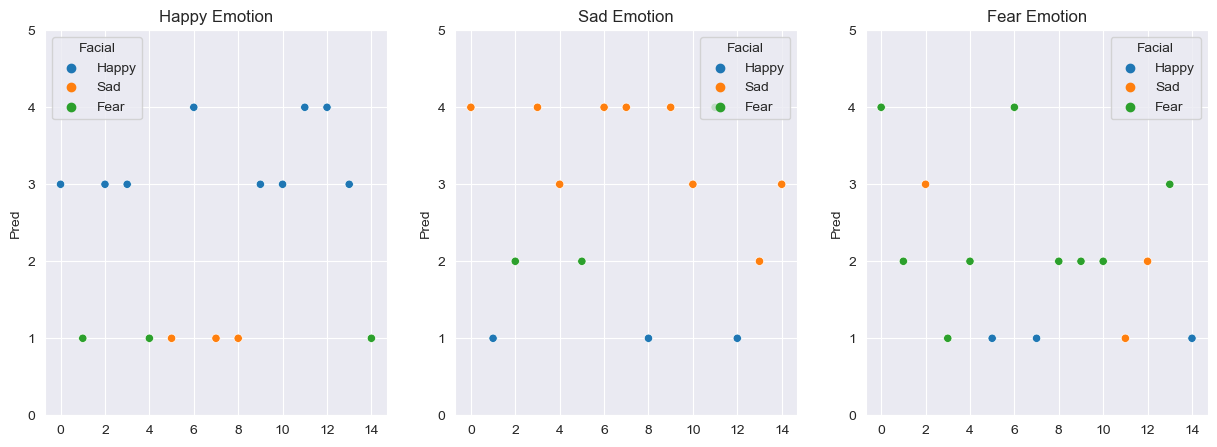

Subject PREDWELL_RETOS-1119-1


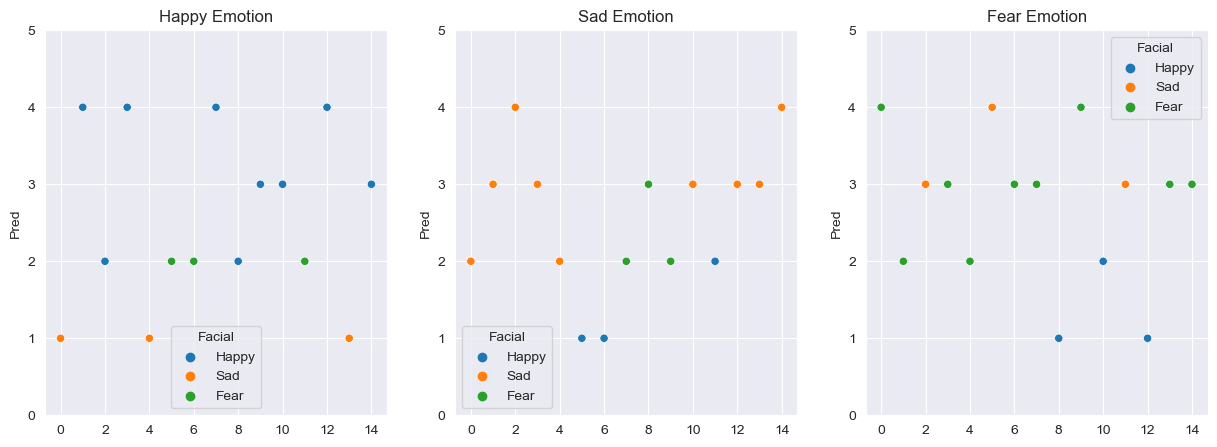

Subject PREDWELL_RETOS-1120-1


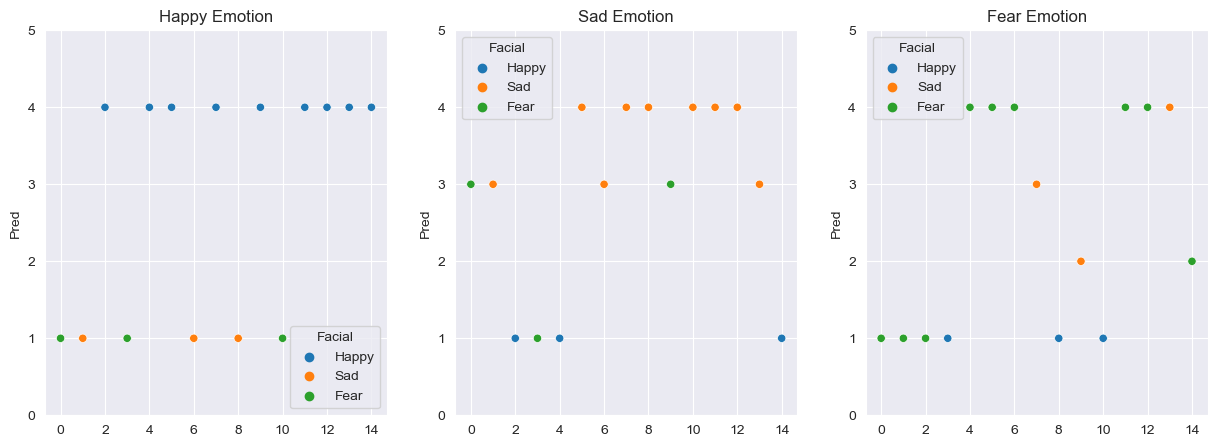

Subject PREDWELL_RETOS-1121-1


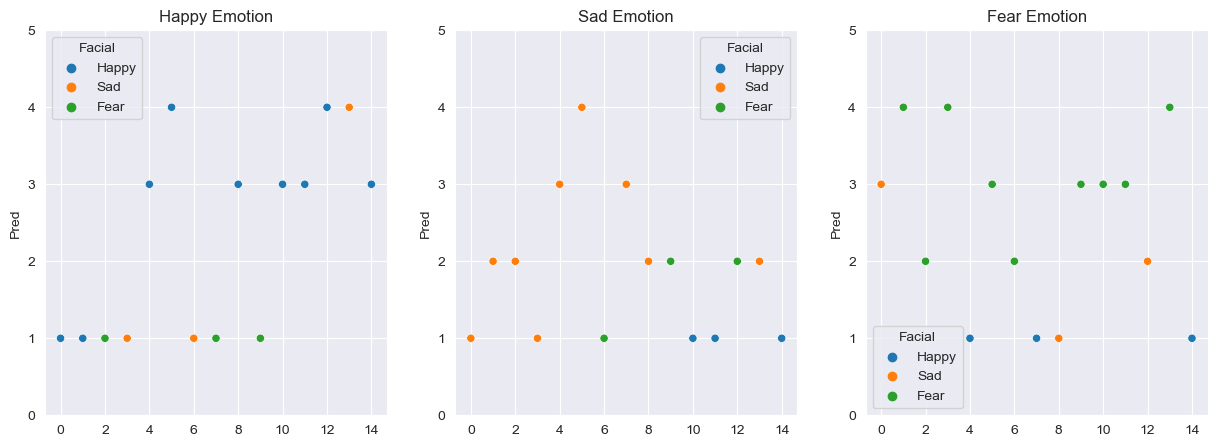

Subject PREDWELL_RETOS-1122-1


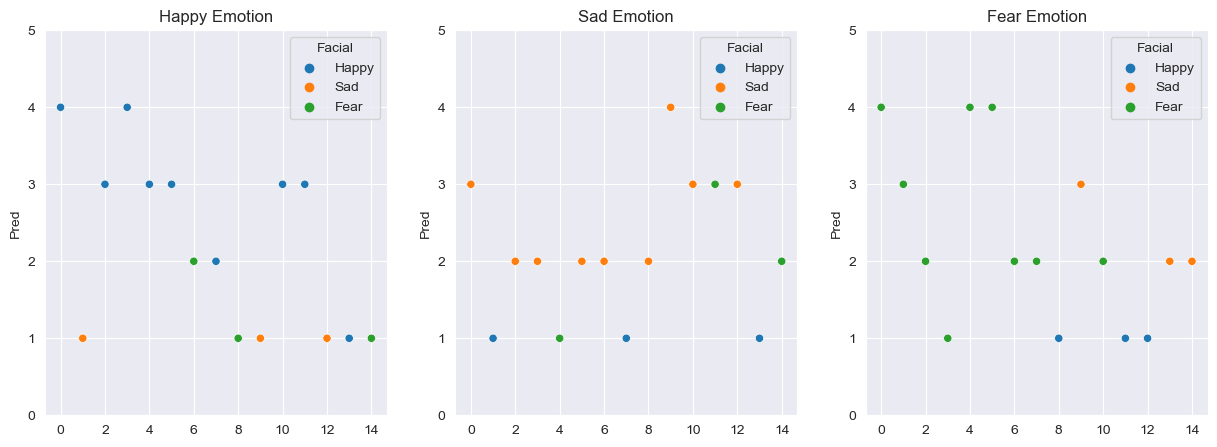

Subject PREDWELL_RETOS-1123-1


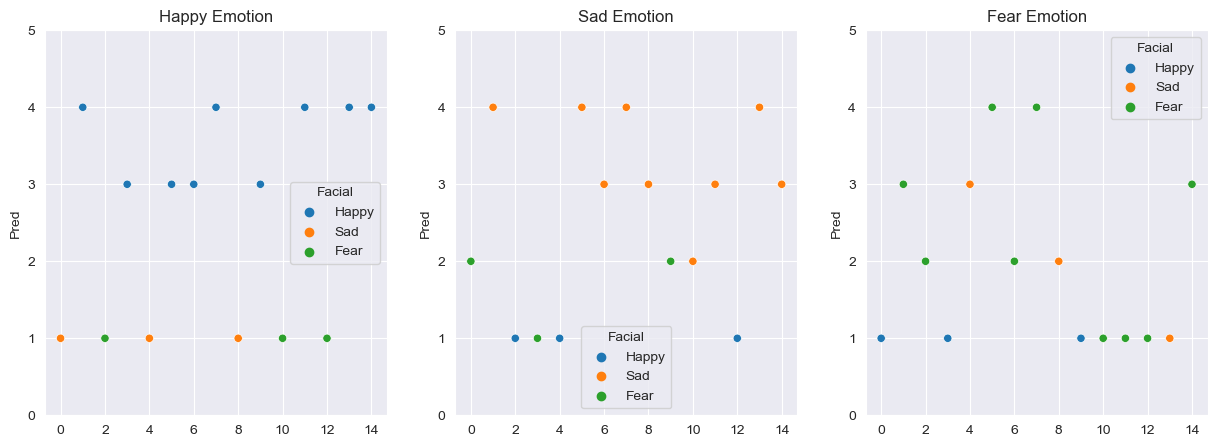

Subject PREDWELL_RETOS-1124-1


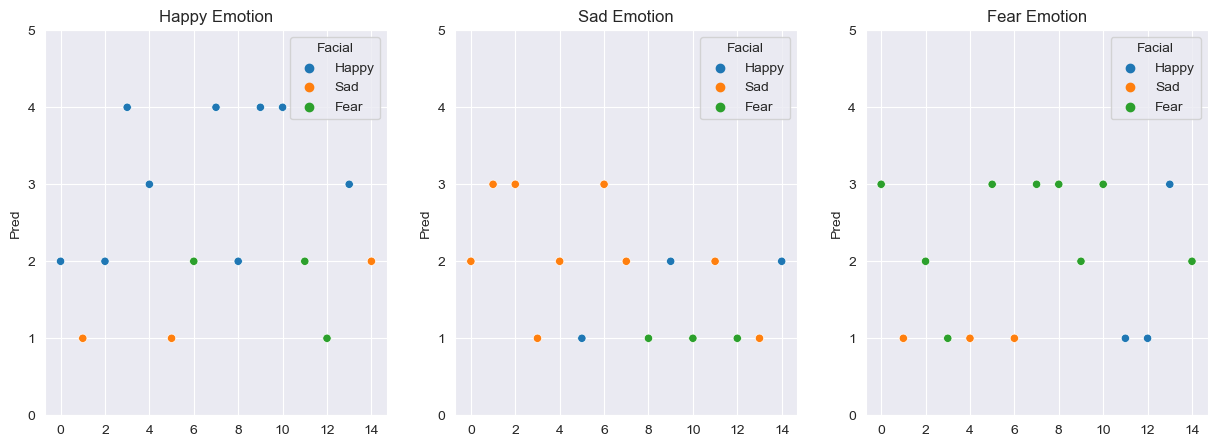

Subject PREDWELL_RETOS-1125-1


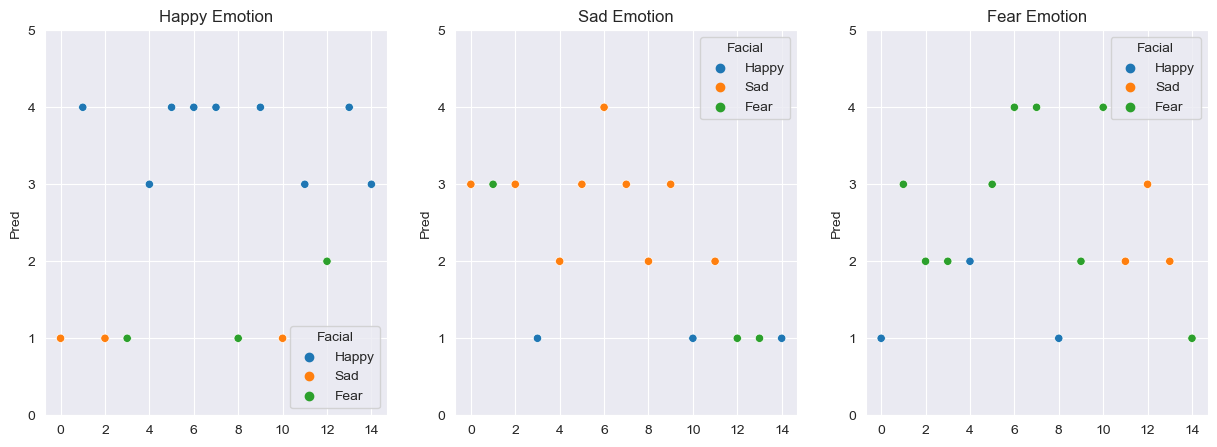

Subject PREDWELL_RETOS-1126-1


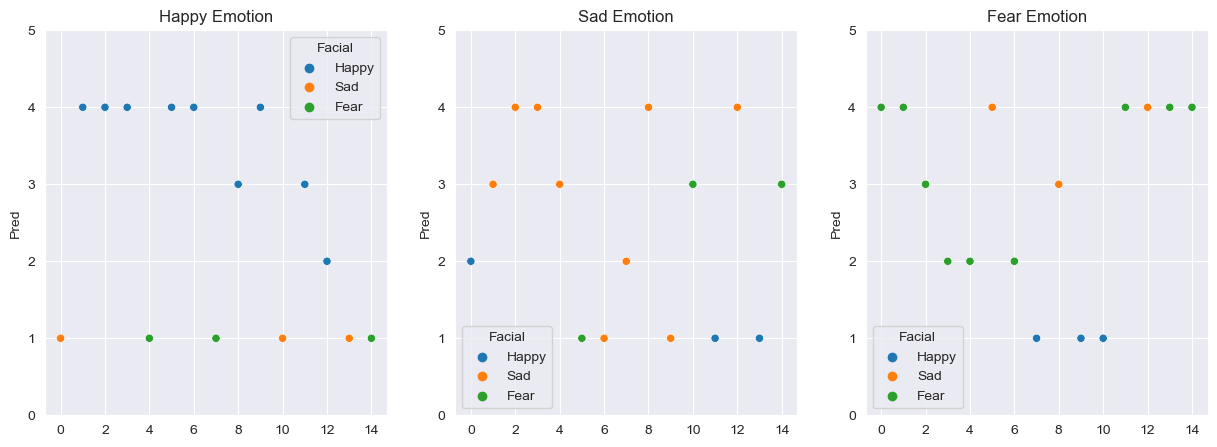

Subject PREDWELL_RETOS-1127-1


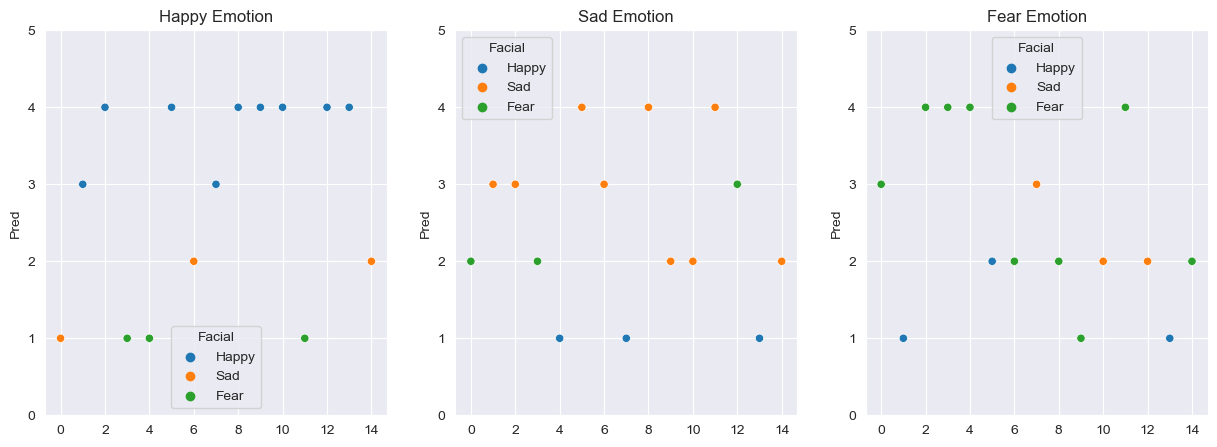

Subject PREDWELL_RETOS-1128-1


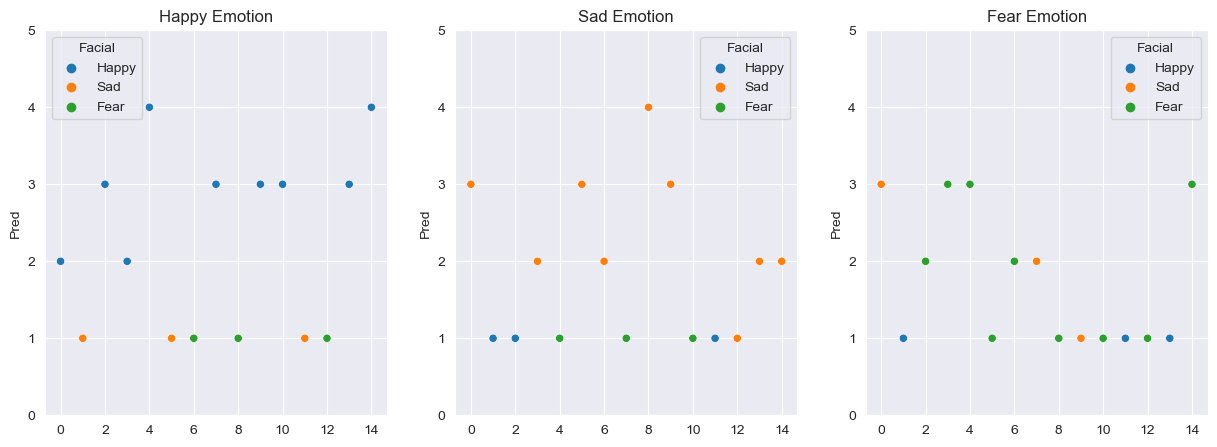

In [9]:
subject_dict = subject_dict_BEBRASK.copy()
for id in BEBRASK_tasks_long.index.values:
    print(f'Subject',id)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))


    sns.scatterplot(data=subject_dict[id]["Happy"], x = list(range(15)), y = "Pred", hue= 'Facial',hue_order= ["Happy","Sad","Fear"], ax=axes[0])
    axes[0].set_title("Happy Emotion")
    axes[0].set_ylim([0, 5])
    sns.scatterplot(data=subject_dict[id]["Sad"], x = list(range(15)), y = "Pred", hue= 'Facial',hue_order= ["Happy","Sad","Fear"], ax=axes[1])
    axes[1].set_title("Sad Emotion")
    axes[1].set_ylim([0, 5])

    sns.scatterplot(data=subject_dict[id]["Fear"], x = list(range(15)), y = "Pred", hue= 'Facial',hue_order= ["Happy","Sad","Fear"], ax=axes[2])
    axes[2].set_title("Fear Emotion")
    axes[2].set_ylim([0, 5])

    axes[0].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[1].yaxis.set_major_locator(MaxNLocator(integer=True))
    axes[2].yaxis.set_major_locator(MaxNLocator(integer=True))

    plt.show()


In [10]:
processed_data = {}
for i in range (0,55):
    id = BEBRASK_tasks_long.index.values[i]
    for j,key in enumerate(subject_dict[id].keys()):
                
        one_no_match = np.count_nonzero((subject_dict[id][key]['Pred']==1) & (subject_dict[id][key]['Fulfill'] == 0),keepdims=True)[0]
        two_no_match = np.count_nonzero((subject_dict[id][key]['Pred']==2) & (subject_dict[id][key]['Fulfill'] == 0),keepdims=True)[0]
        three_no_match = np.count_nonzero((subject_dict[id][key]['Pred']==3) & (subject_dict[id][key]['Fulfill'] == 0),keepdims=True)[0]
        four_no_match = np.count_nonzero((subject_dict[id][key]['Pred']==4) & (subject_dict[id][key]['Fulfill'] == 0),keepdims=True)[0]

        one_match = np.count_nonzero((subject_dict[id][key]['Pred']==1) & (subject_dict[id][key]['Fulfill'] == 1),keepdims=True)[0]
        two_match = np.count_nonzero((subject_dict[id][key]['Pred']==2) & (subject_dict[id][key]['Fulfill'] == 1),keepdims=True)[0]
        three_match = np.count_nonzero((subject_dict[id][key]['Pred']==3) & (subject_dict[id][key]['Fulfill'] == 1),keepdims=True)[0]
        four_match = np.count_nonzero((subject_dict[id][key]['Pred']==4) & (subject_dict[id][key]['Fulfill'] == 1),keepdims=True)[0]
        if j == 0 :
            processed_data[id] = {key:{'Match':[one_match,two_match,three_match,four_match],'No_Match':[one_no_match,two_no_match,three_no_match,four_no_match]}}
        else:
            processed_data[id].update({key:{'Match':[one_match,two_match,three_match,four_match],'No_Match':[one_no_match,two_no_match,three_no_match,four_no_match]}})

df_list = []

for subject, emotions in processed_data.items():
    for emotion, match_data in emotions.items():
        for match_type, scores in match_data.items():
            for score, count in enumerate(scores, start=1):
                df_list.append([subject, emotion, match_type == 'Match', score, count])

BEBRASK_count_data = pd.DataFrame(df_list, columns=['Subject', 'Emotion', 'Match', 'Score', 'Count'])
BEBRASK_count_data['Match'] = BEBRASK_count_data['Match'].astype(int)


In [11]:
multiindex_df = BEBRASK_count_data.set_index(['Subject', 'Emotion', 'Match', 'Score'])

# Unstack the DataFrame to create a wide format
BEBRASK_wide = multiindex_df.unstack(level=['Emotion', 'Match', 'Score'])

# Flatten the MultiIndex columns
BEBRASK_wide.columns = ['_'.join(map(str, col)).strip() for col in BEBRASK_wide.columns.values]
BEBRASK_wide = BEBRASK_wide.reset_index()


In [12]:
BEBRASK_wide_copy = BEBRASK_wide.copy()
BEBRASK_wide.drop(["Subject"],axis=1,inplace=True)

In [13]:
# Ignorar características categóricas
data = BEBRASK_scales.select_dtypes(include=[np.number])

# Borrar columnas con más de 20 valores faltantes
cols_to_drop = data.columns[data.isnull().sum() > 20]
data.drop(columns=cols_to_drop, inplace=True)

# Imputar valores faltantes con la mediana
data.fillna(data.median(), inplace=True)

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data.drop("Age",axis= 1,inplace = True)



In [14]:
def show_importance_metric(df,df_scales):
    importance_metric = {}
    
    for feat in df.columns.values:
        importance_metric[feat] = 0
    
    for metric in data.columns:
        selected_features_pvalues = forward_selection_with_pvalues(df, df_scales[metric].reset_index().drop("index",axis=1),0.15)
        for feat in selected_features_pvalues:
            importance_metric[feat] +=1
        print(metric,selected_features_pvalues)


show_importance_metric(BEBRASK_wide,data)

PA ['Count_Sad_0_4', 'Count_Fear_1_3', 'Count_Happy_0_4', 'Count_Happy_0_1']
NA. ['Count_Fear_1_2']
ERQ_CR ['Count_Happy_0_3']
ERQ_ES ['Count_Happy_0_2']
UPPSP_NU ['Count_Sad_1_3', 'Count_Sad_0_1']
UPPSP_PU ['Count_Fear_1_1']
UPPSP_SS ['Count_Fear_1_1', 'Count_Sad_1_4']
UPPSP_PMD ['Count_Sad_0_3', 'Count_Fear_0_2']
UPPSP_PSV ['Count_Sad_0_4', 'Count_Sad_1_2', 'Count_Fear_1_1', 'Count_Sad_0_3']
BIS ['Count_Sad_0_4']
BAS_RR ['Count_Sad_0_4']
BAS_D ['Count_Happy_0_4', 'Count_Happy_0_1', 'Count_Fear_0_2', 'Count_Sad_0_4']
BAS_FS ['Count_Sad_0_1', 'Count_Sad_1_3']
TEPS_AF ['Count_Fear_1_3', 'Count_Happy_0_3', 'Count_Sad_0_4']
TEPS_CF ['Count_Fear_1_3', 'Count_Happy_0_3']
SHS ['Count_Happy_0_2', 'Count_Sad_0_4', 'Count_Happy_1_3', 'Count_Happy_1_1']
FS ['Count_Happy_0_2', 'Count_Happy_1_4', 'Count_Fear_0_3', 'Count_Happy_0_1', 'Count_Fear_0_2', 'Count_Sad_0_3', 'Count_Sad_1_4']
LOT_R ['Count_Happy_0_2', 'Count_Fear_1_3', 'Count_Sad_0_4', 'Count_Sad_1_1', 'Count_Happy_1_4', 'Count_Fear_1_2']


In [15]:
BEBRASK_wide["NA"] = BEBRASK_scales["NA."]
BEBRASK_wide["PA"] = BEBRASK_scales["PA"]

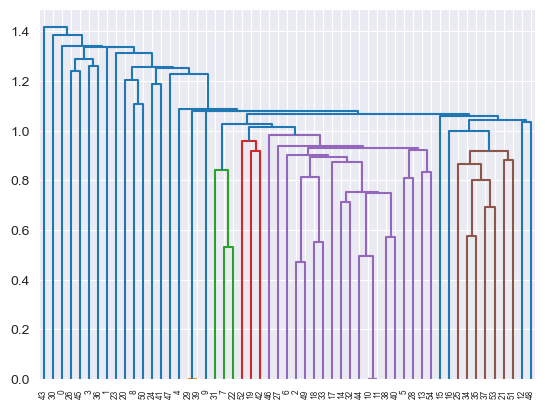

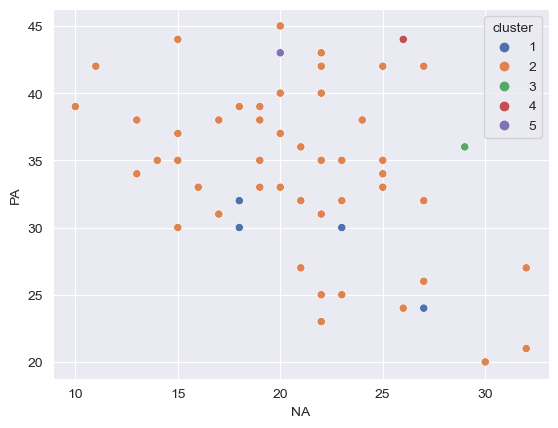

In [16]:
#All non match trials

BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"])

dataframe_non_match = create_dataframes_cluster(["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"],BEBRASK_wide)


In [17]:
dataframe_non_match

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
3       1   36.00   29.00           3.00           0.00           3.00   
2      48   34.17   20.54           3.27           1.50           0.98   
1       4   29.00   21.50           3.00           0.75           1.25   
4       1   44.00   26.00           1.00           4.00           1.00   
5       1   43.00   20.00           1.00           2.00           0.00   

  Count_Fear_0_4 Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
3           0.00            5.00            0.00            0.00   
2           0.25            5.23            0.60            0.15   
1           1.00            3.25            1.75            1.00   
4           0.00            3.00            2.00            0.00   
5           3.00            3.00            1.00            0.00   

  Count_Happy_0_4 Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3 Count_Sad_0_4  
3            1.00          4.00          0.00          2.00          0.00  
2            0.02          3.52          1.31          0.73          0.44  
1            0.00          3.50          1.25          1.25          0.00  
4            1.00          2.00          2.00          1.00          1.00  
5            2.00          0.00          4.00          1.00          1.00

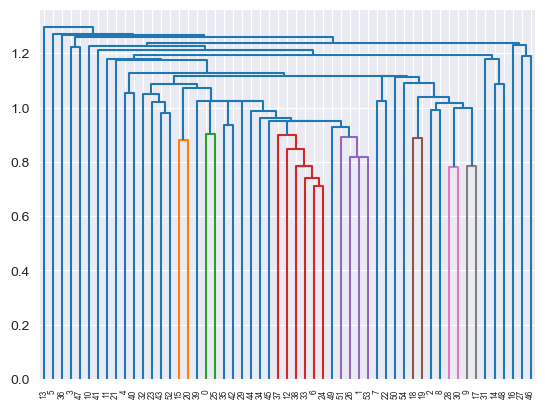

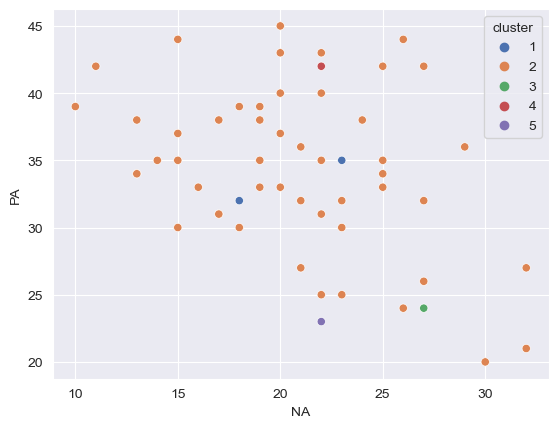

In [18]:
#All match trials

BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2", "Count_Happy_1_3","Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3","Count_Sad_1_4"])

dataframe_match = create_dataframes_cluster(["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2", "Count_Happy_1_3","Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3","Count_Sad_1_4"],BEBRASK_wide)


In [19]:
dataframe_match

Length Mean_PA Mean_NA Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3  \
2      50   34.46   20.70           0.92           2.78           2.74   
1       2   33.50   20.50           1.00           2.00           4.00   
4       1   42.00   22.00           3.00           0.00           2.00   
5       1   23.00   22.00           0.00           4.00           4.00   
3       1   24.00   27.00           3.00           1.00           2.00   

  Count_Fear_1_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
2           2.56            0.10            0.70            3.04   
1           2.00            2.50            0.50            4.50   
4           4.00            0.00            0.00            1.00   
5           1.00            1.00            2.00            5.00   
3           3.00            2.00            0.00            2.00   

  Count_Happy_1_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
2            5.16          0.50          2.34          3.60          2.56  
1            1.50          3.00          4.00          1.00          1.00  
4            8.00          1.00          7.00          1.00          0.00  
5            1.00          0.00          7.00          1.00          1.00  
3            5.00          2.00          2.00          5.00          0.00

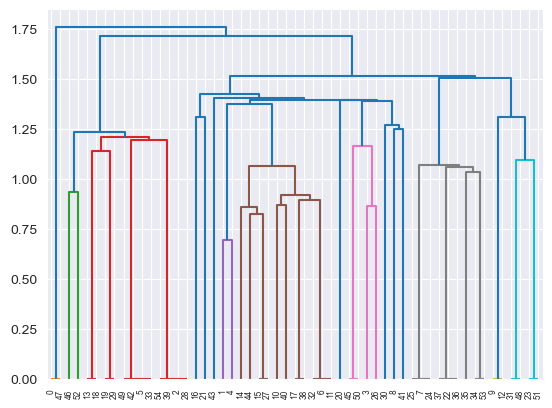

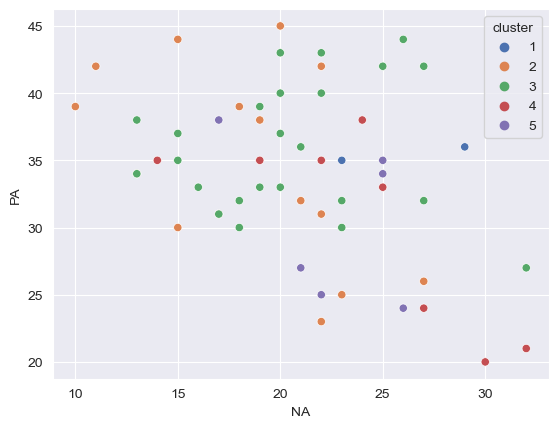

In [20]:
#Significant features for PA
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Sad_0_4', 'Count_Fear_1_3', 'Count_Happy_0_4', 'Count_Happy_0_1'])


dataframe_features_PA = create_dataframes_cluster(['Count_Sad_0_4', 'Count_Fear_1_3', 'Count_Happy_0_4', 'Count_Happy_0_1'],BEBRASK_wide)


In [21]:
dataframe_features_PA

Length Mean_PA Mean_NA Count_Sad_0_4 Count_Fear_1_3 Count_Happy_0_4  \
1       2   35.50   26.00          0.00           4.00            1.00   
3      24   35.96   20.46          0.96           3.12            0.12   
2      14   35.00   18.43          0.00           2.79            0.00   
4       9   30.22   23.33          0.00           1.89            0.00   
5       6   30.50   22.67          0.00           2.33            0.00   

  Count_Happy_0_1  
1            5.00  
3            4.79  
2            6.00  
4            4.00  
5            5.00

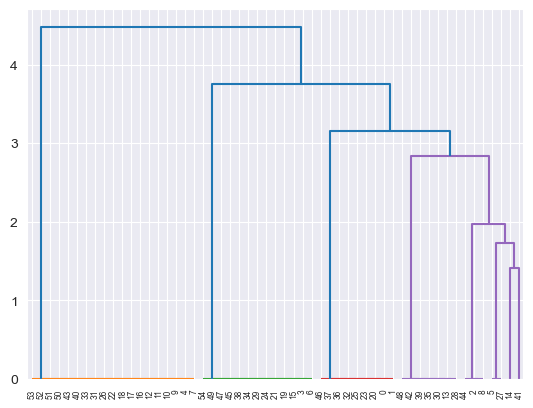

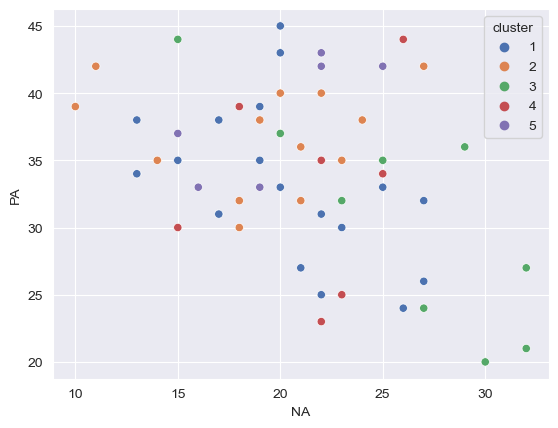

In [22]:
#Significant features for NA
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Fear_1_2'])

dataframe_features_NA = create_dataframes_cluster(['Count_Fear_1_2'],BEBRASK_wide)


In [23]:
dataframe_features_NA

Length Mean_PA Mean_NA Count_Fear_1_2
3       9   30.67   25.89           1.00
5       7   37.71   18.86           4.00
2      13   36.85   19.08           2.00
1      19   33.16   20.16           3.00
4       7   32.86   21.57           4.00

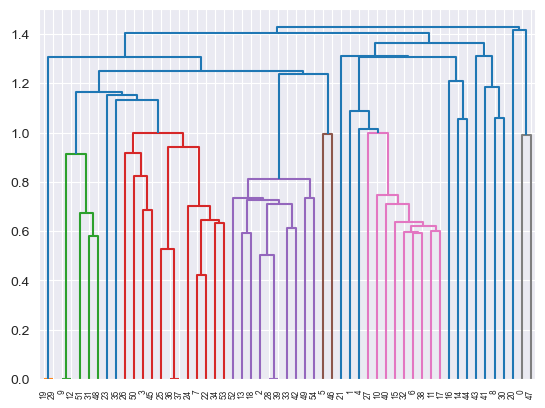

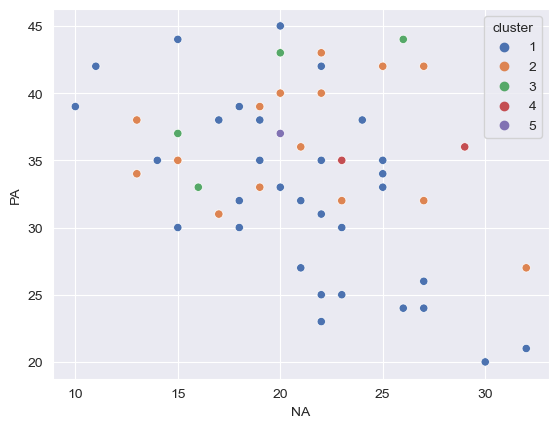

In [24]:
#Significant features for PA & NA
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Sad_0_4', 'Count_Fear_1_3', 'Count_Happy_0_4', 'Count_Happy_0_1','Count_Fear_1_2'])

dataframe_features_PA_NA = create_dataframes_cluster(['Count_Sad_0_4', 'Count_Fear_1_3', 'Count_Happy_0_4', 'Count_Happy_0_1','Count_Fear_1_2'],BEBRASK_wide)


In [25]:
dataframe_features_PA_NA

Length Mean_PA Mean_NA Count_Sad_0_4 Count_Fear_1_3 Count_Happy_0_4  \
4       2   35.50   26.00          0.00           4.00            1.00   
2      15   36.27   21.00          1.13           3.00            0.00   
1      33   32.42   20.70          0.00           2.64            0.00   
3       4   39.25   19.25          1.00           2.25            0.75   
5       1   37.00   20.00          2.00           4.00            0.00   

  Count_Happy_0_1 Count_Fear_1_2  
4            5.00           1.50  
2            5.80           2.60  
1            4.91           2.61  
3            3.25           4.75  
5            3.00           1.00

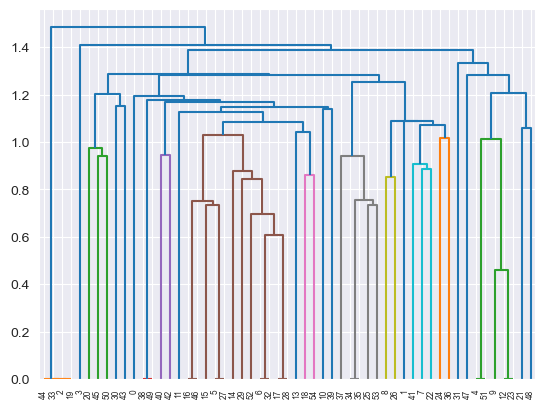

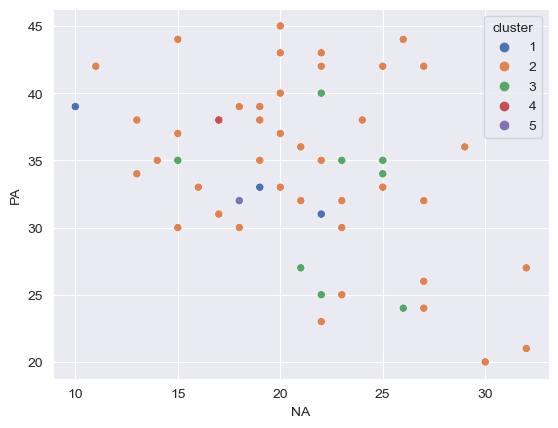

In [26]:
#Happiness trials
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'])

dataframe_happy = create_dataframes_cluster(['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'],BEBRASK_wide)


In [27]:
dataframe_happy

Length Mean_PA Mean_NA Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
2      41   34.56   21.20            4.95            0.76            0.20   
1       4   34.25   16.00            6.00            0.00            0.00   
5       1   32.00   18.00            3.00            1.00            2.00   
3       8   31.88   22.38            5.00            0.88            0.00   
4       1   38.00   17.00            5.00            0.00            1.00   

  Count_Happy_0_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
2            0.10            0.17            0.76            2.56   
1            0.00            0.00            0.00            6.00   
5            0.00            3.00            1.00            4.00   
3            0.12            0.38            0.75            3.75   
4            0.00            0.00            0.00            6.00   

  Count_Happy_1_4  
2            5.51  
1            3.00  
5            1.00  
3            4.12  
4            3.00

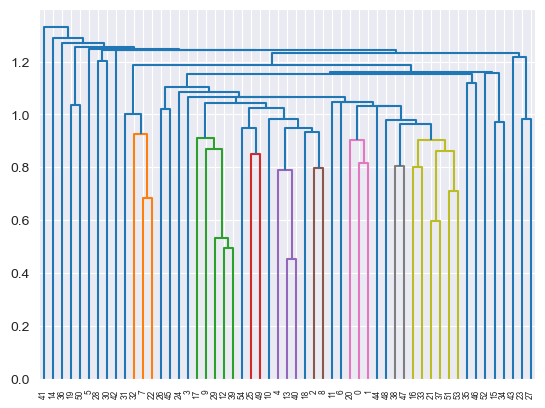

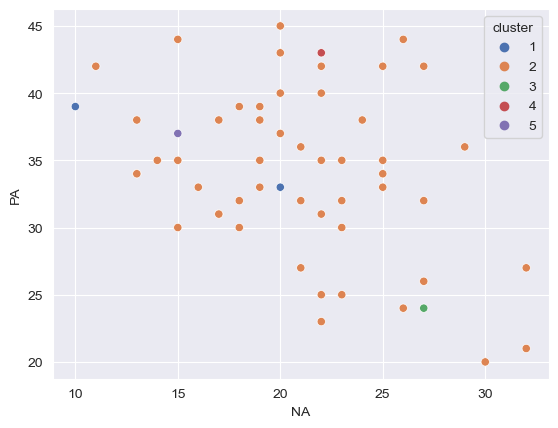

In [28]:
#Fear trials
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'])

dataframe_fear = create_dataframes_cluster(['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'],BEBRASK_wide)


In [29]:
dataframe_fear

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
2      50   34.06   21.06           3.00           1.56           1.10   
4       1   43.00   22.00           4.00           1.00           0.00   
1       2   36.00   15.00           5.50           0.00           0.50   
3       1   24.00   27.00           5.00           0.00           0.00   
5       1   37.00   15.00           4.00           2.00           0.00   

  Count_Fear_0_4 Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3 Count_Fear_1_4  
2           0.34           0.94           2.58           2.78           2.70  
4           1.00           2.00           6.00           0.00           1.00  
1           0.00           1.00           2.50           5.00           0.50  
3           1.00           3.00           1.00           2.00           3.00  
5           0.00           0.00           7.00           2.00           0.00

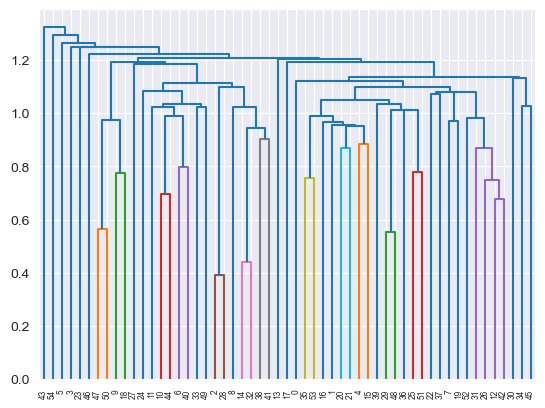

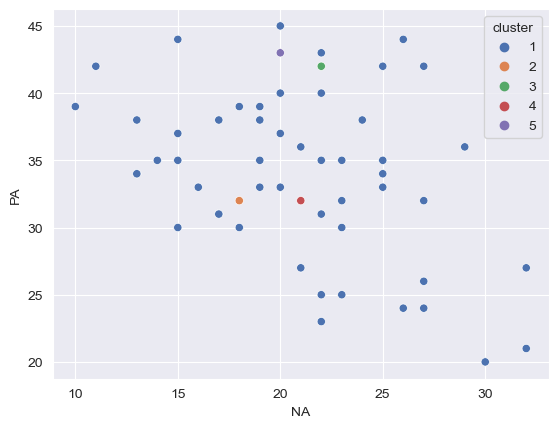

In [30]:
#Sad trials
BEBRASK_wide = create_and_plot_clusters(BEBRASK_wide,['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'])

dataframe_sad = create_dataframes_cluster(['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'],BEBRASK_wide)


In [31]:
dataframe_sad

Length Mean_PA Mean_NA Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3  \
1      51   33.92   20.90          3.41          1.33          0.82   
2       1   32.00   18.00          4.00          1.00          1.00   
3       1   42.00   22.00          5.00          1.00          0.00   
5       1   43.00   20.00          0.00          4.00          1.00   
4       1   32.00   21.00          6.00          0.00          0.00   

  Count_Sad_0_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
1          0.43          0.55          2.45          3.61          2.39  
2          0.00          4.00          4.00          0.00          1.00  
3          0.00          1.00          7.00          1.00          0.00  
5          1.00          0.00          1.00          1.00          7.00  
4          0.00          1.00          4.00          3.00          1.00

## RETOS Dataframe

In [32]:
# Cargar los datos del archivo .xlsx en un dataframe
RETOS_scales = pd.read_excel('Datasets/RETOS_scales.xlsx')
RETOS_tasks = pd.read_excel('Datasets/RETOS_task.xlsx')
RETOS_tasks = RETOS_tasks[["DataFile.Basename","Rating0.RESP","Rating.RESP","EvokedEmotion", "Expression", "ScenarioPick","TrialCount","Fulfilled"]].copy()
RETOS_tasks.dropna(subset = ["TrialCount"],inplace=True)
subjects_id = RETOS_tasks["DataFile.Basename"].unique()

In [33]:
test = RETOS_tasks[["Rating0.RESP", "Rating.RESP"]]
print("Mean difference pred/like:",np.mean(abs(test["Rating0.RESP"] - test["Rating.RESP"])))
print("Std difference pred/like:",np.std(abs(test["Rating0.RESP"] - test["Rating.RESP"])))


Mean difference pred/like: 0.9506468615237182
Std difference pred/like: 0.8575928879401842


In [34]:
RETOS_tasks_long= RETOS_tasks.pivot(index="DataFile.Basename", columns='TrialCount')
RETOS_tasks_long.columns = ['_'.join(str(col) for col in cols) for cols in RETOS_tasks_long.columns.values]


In [35]:
for i in range(1, 46):  # Assuming there are 55 trials
    rating1_col = f'Rating0.RESP_{i}.0'
    rating2_col = f'Rating.RESP_{i}.0'

    # Fill NA in rating1 with values from rating2, and vice versa
    RETOS_tasks_long[rating1_col].fillna(RETOS_tasks_long[rating2_col], inplace=True)
    RETOS_tasks_long[rating2_col].fillna(RETOS_tasks_long[rating1_col], inplace=True)


In [36]:
rows_removed = RETOS_tasks_long[RETOS_tasks_long.isna().any(axis=1)].index.values
RETOS_tasks_long.dropna(inplace=True) #3 columns are eliminated

In [120]:
subject_dict_RETOS = {}
subject_dict_all = {}
for j in range(0, 93):
    subject = RETOS_tasks_long.iloc[j]
    id = RETOS_tasks_long.index.values[j]
    happy_pred = []
    happy_like = []
    happy_facial = []
    happy_fulfill = []
    sad_pred = []
    sad_like = []
    sad_facial = []
    sad_fulfill = []
    fear_pred = []
    fear_like = []
    fear_facial = []
    fear_fulfill = []
    all_trials_pred = []
    all_trials_like = []
    all_trials_facial = []
    all_trials_fulfill = []

    for i in range(1, 46):
        pred = f'Rating0.RESP_{i}.0'
        like = f'Rating.RESP_{i}.0'
        emotion = f'EvokedEmotion_{i}.0'
        facial = f'Expression_{i}.0'
        fulfill = f'Fulfilled_{i}.0'

        if subject[emotion] == "happiness":
            happy_pred.append(int(subject[pred]))
            happy_like.append(int(subject[like]))
            happy_facial.append(subject[facial])
            happy_fulfill.append(subject[fulfill])

        elif subject[emotion] == "sadness":
            sad_pred.append(int(subject[pred]))
            sad_like.append(int(subject[like]))
            sad_facial.append(subject[facial])
            sad_fulfill.append(subject[fulfill])


        else:
            fear_pred.append(int(subject[pred]))
            fear_like.append(int(subject[like]))
            fear_facial.append(subject[facial])
            fear_fulfill.append(subject[fulfill])

        if subject[facial] != subject[emotion]:

            all_trials_facial.append(subject[facial] + "_" + subject[emotion])
        else:
            all_trials_facial.append(subject[facial])

        all_trials_pred.append(subject[pred])
        all_trials_like.append(subject[like])
        all_trials_fulfill.append(subject[fulfill])

    subject_dict_RETOS[id] = {
        'Happy': {'Pred': np.array(happy_pred), 'Like': np.array(happy_like), 'Facial': np.array(happy_facial),
                  'Fulfill': np.array(happy_fulfill)},
        'Sad': {'Pred': np.array(sad_pred), 'Like': np.array(sad_like), 'Facial': np.array(sad_facial),
                'Fulfill': np.array(sad_fulfill)},
        'Fear': {'Pred': np.array(fear_pred), 'Like': np.array(fear_like), 'Facial': np.array(fear_facial),
                 'Fulfill': np.array(fear_fulfill)}}
    subject_dict_all[id] = {'Pred': np.array(all_trials_pred), 'Like': np.array(all_trials_like),
                            'Facial': np.array(all_trials_facial), 'Fulfill': np.array(all_trials_fulfill)}


In [121]:
subject_dict = subject_dict_RETOS.copy()
processed_data = {}
for i in range (0,93):
    id = RETOS_tasks_long.index.values[i]
    for j, key in enumerate(subject_dict[id].keys()):

        one_no_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 1) & (subject_dict[id][key]['Fulfill'] == 0), keepdims=True)[
            0]
        two_no_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 2) & (subject_dict[id][key]['Fulfill'] == 0), keepdims=True)[
            0]
        three_no_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 3) & (subject_dict[id][key]['Fulfill'] == 0), keepdims=True)[
            0]
        four_no_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 4) & (subject_dict[id][key]['Fulfill'] == 0), keepdims=True)[
            0]

        one_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 1) & (subject_dict[id][key]['Fulfill'] == 1), keepdims=True)[
            0]
        two_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 2) & (subject_dict[id][key]['Fulfill'] == 1), keepdims=True)[
            0]
        three_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 3) & (subject_dict[id][key]['Fulfill'] == 1), keepdims=True)[
            0]
        four_match = \
        np.count_nonzero((subject_dict[id][key]['Pred'] == 4) & (subject_dict[id][key]['Fulfill'] == 1), keepdims=True)[
            0]
        if j == 0:
            processed_data[id] = {key: {'Match': [one_match, two_match, three_match, four_match],
                                        'No_Match': [one_no_match, two_no_match, three_no_match, four_no_match]}}
        else:
            processed_data[id].update({key: {'Match': [one_match, two_match, three_match, four_match],
                                             'No_Match': [one_no_match, two_no_match, three_no_match, four_no_match]}})

df_list = []

for subject, emotions in processed_data.items():
    for emotion, match_data in emotions.items():
        for match_type, scores in match_data.items():
            for score, count in enumerate(scores, start=1):
                df_list.append([subject, emotion, match_type == 'Match', score, count])

RETOS_tasks_data = pd.DataFrame(df_list, columns=['Subject', 'Emotion', 'Match', 'Score', 'Count'])
RETOS_tasks_data['Match'] = RETOS_tasks_data['Match'].astype(int)



In [39]:
multiindex_df = RETOS_tasks_data.set_index(['Subject', 'Emotion', 'Match', 'Score'])

# Unstack the DataFrame to create a wide format
RETOS_wide = multiindex_df.unstack(level=['Emotion', 'Match', 'Score'])

# Flatten the MultiIndex columns
RETOS_wide.columns = ['_'.join(map(str, col)).strip() for col in RETOS_wide.columns.values]
RETOS_wide = RETOS_wide.reset_index()

RETOS_wide  # Display the first few rows of the wide format DataFrame

Subject  Count_Happy_1_1  Count_Happy_1_2  Count_Happy_1_3  \
0     PREDWELL_RETOS-1-1                0                0                1   
1    PREDWELL_RETOS-10-1                0                1                4   
2   PREDWELL_RETOS-101-1                0                1                2   
3   PREDWELL_RETOS-102-1                1                0                4   
4   PREDWELL_RETOS-103-1                0                1                1   
..                   ...              ...              ...              ...   
88    PREDWELL_RETOS-5-1                1                1                4   
89    PREDWELL_RETOS-6-1                1                0                4   
90    PREDWELL_RETOS-7-1                0                1                5   
91    PREDWELL_RETOS-8-1                1                1                3   
92    PREDWELL_RETOS-9-1                0                1                5   

    Count_Happy_1_4  Count_Happy_0_1  Count_Happy_0_2  Count_Happy_0_3  \
0                 8                5                0                0   
1                 4                4                2                0   
2                 6                5                1                0   
3                 4                6                0                0   
4                 7                5                1                0   
..              ...              ...              ...              ...   
88                3                4                2                0   
89                4                5                1                0   
90                3                6                0                0   
91                4                6                0                0   
92                3                6                0                0   

    Count_Happy_0_4  Count_Sad_1_1  ...  Count_Sad_0_3  Count_Sad_0_4  \
0                 1              0  ...              2              1   
1                 0              0  ...              1              0   
2                 0              1  ...              1              0   
3                 0              1  ...              0              3   
4                 0              0  ...              1              0   
..              ...            ...  ...            ...            ...   
88                0              1  ...              1              0   
89                0              2  ...              0              0   
90                0              0  ...              1              1   
91                0              0  ...              2              0   
92                0              1  ...              1              0   

    Count_Fear_1_1  Count_Fear_1_2  Count_Fear_1_3  Count_Fear_1_4  \
0                0               3               1               5   
1                1               1               3               4   
2                2               1               3               3   
3                0               2               3               4   
4                3               2               3               1   
..             ...             ...             ...             ...   
88               2               3               2               2   
89               0               5               1               3   
90               3               1               0               5   
91               1               2               4               2   
92               3               4               1               1   

    Count_Fear_0_1  Count_Fear_0_2  Count_Fear_0_3  Count_Fear_0_4  
0                3               1               1               1  
1                1               3               1               1  
2                5               1               0               0  
3                4               2               0               0  
4                3               2               1               0  
..             ...             ...             

In [40]:
RETOS_wide_copy = RETOS_wide.copy()
RETOS_wide.drop("Subject",axis=1,inplace=True)


In [41]:
RETOS_scales = RETOS_scales[~RETOS_scales["EPRIME_CODE"].isin(rows_removed)]

data = RETOS_scales.select_dtypes(include=[np.number])

# Borrar columnas con más de 20 valores faltantes
cols_to_drop = data.columns[data.isnull().sum() > 20]
data.drop(columns=cols_to_drop, inplace=True)

# Imputar valores faltantes con la mediana
data.fillna(data.median(), inplace=True)

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data.drop("Age", axis=1, inplace=True)
#wide_df.drop("Subject",axis=1,inplace=True)



show_importance_metric(RETOS_wide,data)

PA ['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2']
NA. ['Count_Happy_0_3']
ERQ_CR ['Count_Happy_1_4', 'Count_Fear_1_3']
UPPSP_NU ['Count_Fear_1_2', 'Count_Sad_1_1']
UPPSP_PU ['Count_Fear_1_2', 'Count_Happy_1_1', 'Count_Fear_1_1']
UPPSP_SS ['Count_Happy_0_3', 'Count_Sad_0_3', 'Count_Happy_0_4']
UPPSP_PSV ['Count_Happy_1_4', 'Count_Sad_1_4']
BIS ['Count_Sad_1_3', 'Count_Fear_1_1']
BAS_RR ['Count_Happy_0_4', 'Count_Sad_1_3']
BAS_D ['Count_Happy_0_3', 'Count_Happy_0_4']
BAS_FS ['Count_Fear_0_4', 'Count_Sad_0_3']
TEPS_AF ['Count_Happy_1_1']
TEPS_CF ['Count_Happy_0_4', 'Count_Sad_0_1']
SHS ['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Sad_1_3', 'Count_Sad_1_1', 'Count_Happy_0_2']
FS ['Count_Happy_1_2', 'Count_Sad_1_4']
LOT_R ['Count_Happy_1_2']
RRQ_Rum ['Count_Sad_0_1']
RRQ_Ref ['Count_Fear_0_1', 'Count_Sad_1_1', 'Count_Happy_0_4', 'Count_Happy_1_4', 'Count_Fear_0_3']
ASI_S []
ZKPQ_INFREQ ['Count_Happy_0_4', 'Count_Happy_0_1']


In [42]:
RETOS_wide["NA"] = RETOS_scales["NA."]
RETOS_wide["PA"] = RETOS_scales["PA"]

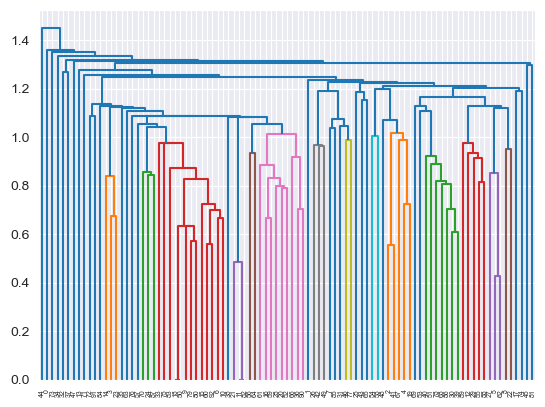

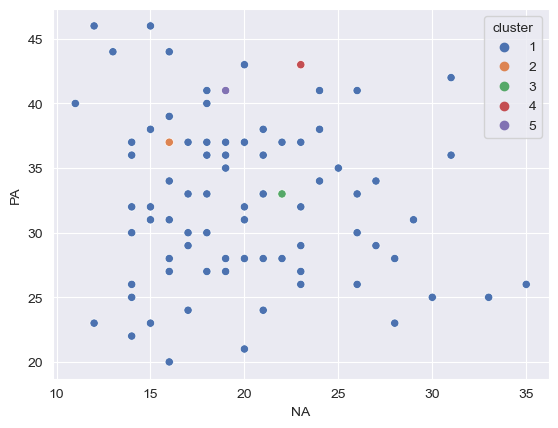

In [43]:
#All non match trials
RETOS_wide = create_and_plot_clusters(RETOS_wide,["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"])

dataframe_non_match = create_dataframes_cluster(["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"],RETOS_wide)


In [44]:
dataframe_non_match

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
4       1   43.00   23.00           3.00           1.00           1.00   
1      89   32.71   19.74           3.06           1.45           0.96   
2       1   37.00   16.00           1.00           2.00           2.00   
5       1   41.00   19.00           3.00           2.00           0.00   
3       1   33.00   22.00           3.00           2.00           0.00   

  Count_Fear_0_4 Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
4           1.00            5.00            0.00            0.00   
1           0.54            5.10            0.73            0.16   
2           1.00            1.00            3.00            2.00   
5           1.00            4.00            0.00            1.00   
3           1.00            4.00            0.00            2.00   

  Count_Happy_0_4 Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3 Count_Sad_0_4  
4            1.00          3.00          0.00          2.00          1.00  
1            0.01          3.37          1.31          0.82          0.49  
2            0.00          1.00          3.00          2.00          0.00  
5            1.00          4.00          0.00          2.00          0.00  
3            0.00          3.00          3.00          0.00          0.00

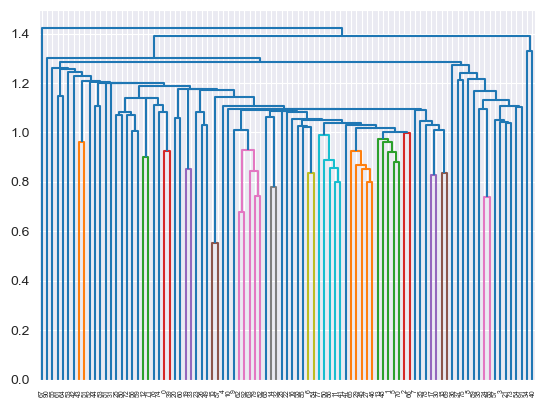

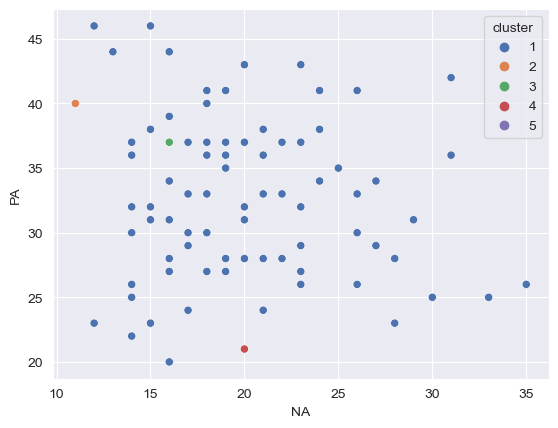

In [45]:
#All match trials
RETOS_wide = create_and_plot_clusters(RETOS_wide, ["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2",
     "Count_Happy_1_3", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3", "Count_Sad_1_4"])


dataframe_match = create_dataframes_cluster(
    ["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2",
     "Count_Happy_1_3", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3", "Count_Sad_1_4"], RETOS_wide)



In [46]:
dataframe_match

Length Mean_PA Mean_NA Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3  \
1      89   33.00   19.94           1.10           2.55           3.26   
3       1   37.00   16.00           2.00           5.00           1.00   
4       1   21.00   20.00           2.00           5.00           1.00   
5       1   31.00   15.00           3.00           1.00           5.00   
2       1   40.00   11.00           3.00           1.00           0.00   

  Count_Fear_1_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
1           2.09            0.18            0.67            3.06   
3           1.00            0.00            4.00            4.00   
4           1.00            2.00            3.00            2.00   
5           0.00            1.00            5.00            1.00   
2           5.00            0.00            1.00            5.00   

  Count_Happy_1_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
1            5.09          0.88          2.51          3.55          2.07  
3            1.00          2.00          6.00          1.00          0.00  
4            2.00          3.00          3.00          2.00          1.00  
5            2.00          3.00          5.00          0.00          1.00  
2            3.00          0.00          1.00          7.00          1.00

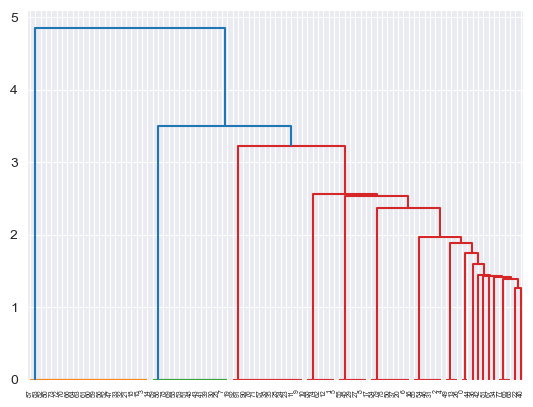

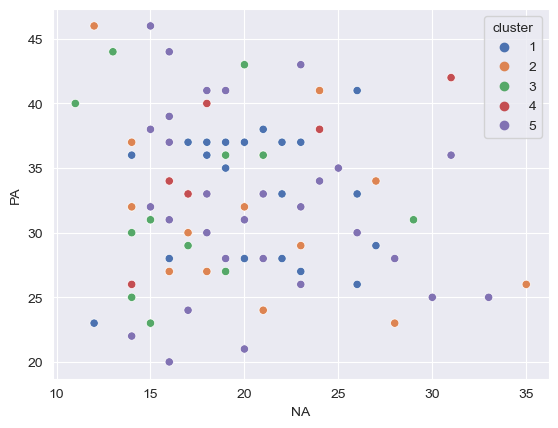

In [47]:
#Significant features for PA
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2'])

dataframe_features_PA = create_dataframes_cluster(['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2'],RETOS_wide)

In [48]:
dataframe_features_PA

Length Mean_PA Mean_NA Count_Happy_1_2 Count_Happy_0_4 Count_Happy_0_2
5      35   32.53   20.06            1.51            0.09            1.17
4       6   35.50   20.00            1.00            0.00            2.00
1      23   33.52   20.35            0.00            0.00            0.00
2      15   31.71   20.71            0.00            0.00            1.00
3      14   33.29   16.93            1.00            0.00            0.00

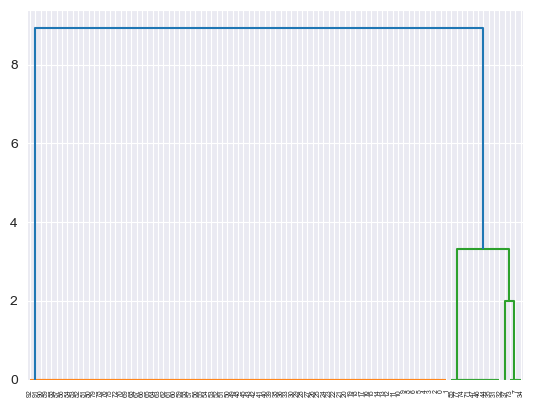

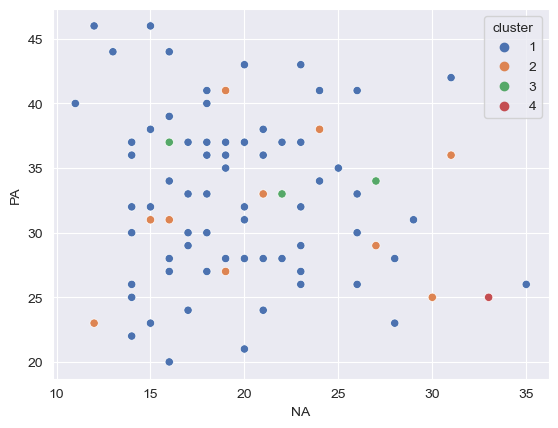

In [49]:
#Significant features for NA
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Happy_0_3'])

dataframe_features_NA = create_dataframes_cluster(['Count_Happy_0_3'],RETOS_wide)


In [50]:
dataframe_features_NA

Length Mean_PA Mean_NA Count_Happy_0_3
1      79   33.21   19.29            0.00
3       3   34.67   21.67            2.00
2      10   31.40   21.40            1.00
4       1   25.00   33.00            3.00

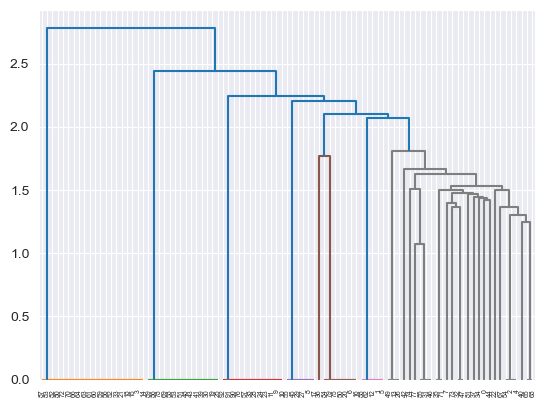

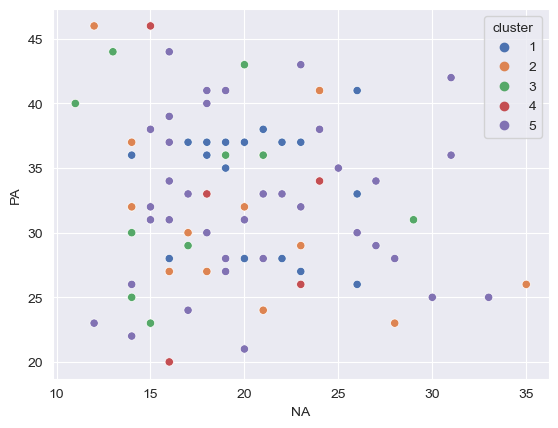

In [51]:
#Significant features for PA & NA
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2','Count_Happy_0_3'])

dataframe_features_PA_NA = create_dataframes_cluster(['Count_Happy_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2','Count_Happy_0_3'],RETOS_wide)


In [52]:
dataframe_features_PA_NA

Length Mean_PA Mean_NA Count_Happy_1_2 Count_Happy_0_4 Count_Happy_0_2  \
5      41   32.42   20.43            1.49            0.07            1.02   
1      20   34.30   20.35            0.00            0.00            0.00   
4       6   33.17   17.83            0.00            0.00            2.00   
3      12   34.00   16.92            1.00            0.00            0.00   
2      14   31.54   20.23            0.00            0.00            1.00   

  Count_Happy_0_3  
5            0.46  
1            0.00  
4            0.00  
3            0.00  
2            0.00

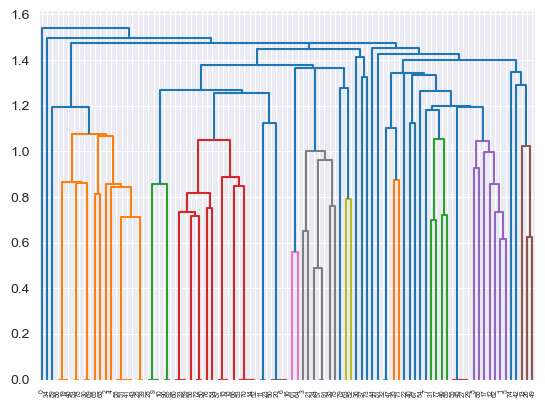

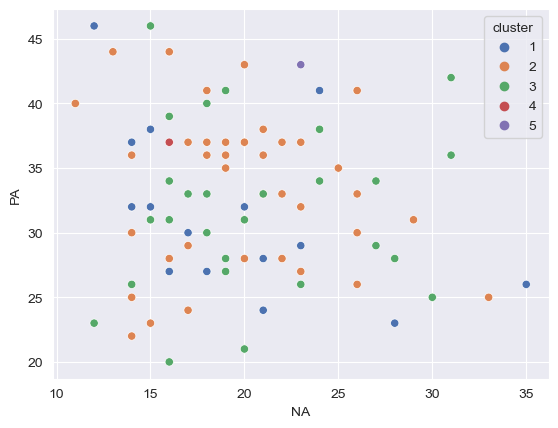

In [53]:
#Happiness trials
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'])

dataframe_happy = create_dataframes_cluster(['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'],RETOS_wide)

In [54]:
dataframe_happy

Length Mean_PA Mean_NA Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
5       1   43.00   23.00            5.00            0.00            0.00   
3      31   32.10   20.00            4.03            1.52            0.39   
1      18   31.75   19.62            5.00            1.00            0.00   
2      42   33.74   19.62            5.88            0.00            0.12   
4       1   37.00   16.00            1.00            3.00            2.00   

  Count_Happy_0_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
5            1.00            0.00            0.00            1.00   
3            0.06            0.19            1.03            3.23   
1            0.00            0.06            0.33            2.72   
2            0.00            0.29            0.74            3.10   
4            0.00            0.00            4.00            4.00   

  Count_Happy_1_4  
5            8.00  
3            4.55  
1            5.89  
2            4.88  
4            1.00

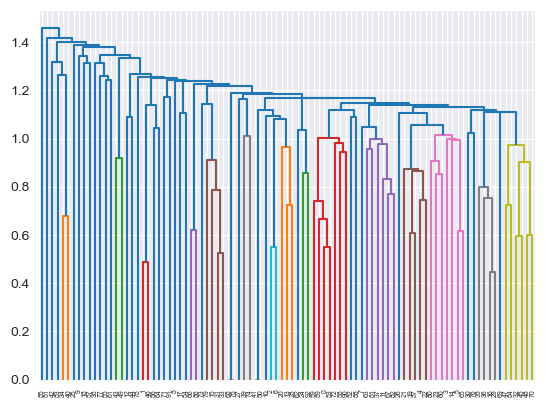

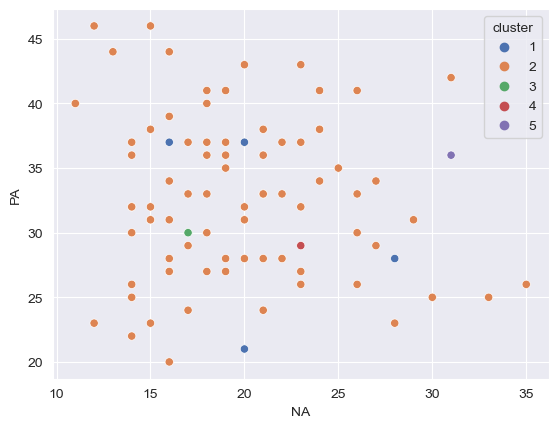

In [55]:
#Fear trials
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'])

dataframe_fear = create_dataframes_cluster(['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'],RETOS_wide)


In [56]:
dataframe_fear

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
2      86   33.12   19.55           3.17           1.42           0.86   
3       1   30.00   17.00           2.00           0.00           4.00   
1       4   30.75   21.00           1.00           2.75           1.50   
4       1   29.00   23.00           2.00           2.00           0.00   
5       1   36.00   31.00           1.00           1.00           4.00   

  Count_Fear_0_4 Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3 Count_Fear_1_4  
2           0.55           1.16           2.41           3.30           2.13  
3           0.00           0.00           3.00           5.00           1.00  
1           0.75           1.50           5.75           0.75           1.00  
4           2.00           1.00           5.00           3.00           0.00  
5           0.00           1.00           1.00           2.00           5.00

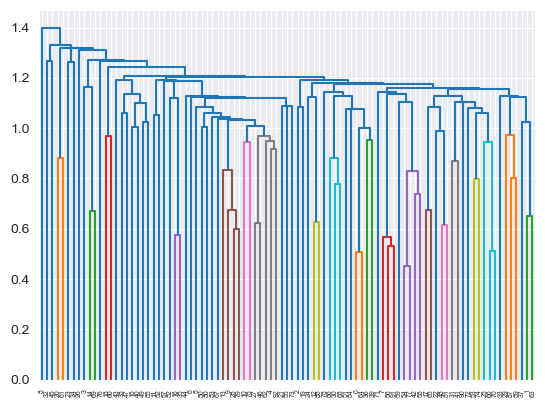

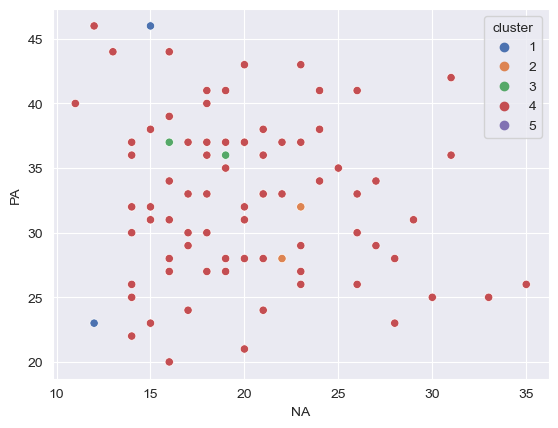

In [57]:
#Sad trials
RETOS_wide = create_and_plot_clusters(RETOS_wide, ['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'])


dataframe_sad = create_dataframes_cluster(['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'],RETOS_wide)


In [58]:
dataframe_sad

Length Mean_PA Mean_NA Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3  \
4      86   32.83   19.99          3.47          1.16          0.90   
5       1   40.00   11.00          4.00          1.00          0.00   
2       2   30.00   22.50          3.00          2.50          0.00   
3       2   36.50   17.50          1.00          3.00          1.00   
1       2   34.50   13.50          0.50          5.50          0.00   

  Count_Sad_0_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
4          0.48          0.88          2.51          3.60          2.00  
5          1.00          5.00          0.00          1.00          3.00  
2          0.50          0.00          3.00          2.00          4.00  
3          1.00          2.50          5.50          1.00          0.00  
1          0.00          0.00          2.50          4.50          2.00

## RETOS & BEBRASK

In [59]:
RETOS_BEBRASK_wide = pd.concat([RETOS_wide_copy,BEBRASK_wide_copy])

In [60]:
RETOS_BEBRASK_scale = pd.concat([RETOS_scales.drop("SUBJECT_CODE",axis=1),BEBRASK_scales.drop("SUBJECT_CODE",axis=1)])

In [61]:
RETOS_BEBRASK_scale = RETOS_BEBRASK_scale.rename(columns={'EPRIME_CODE': 'Subject'})
RETOS_BEBRASK_wide = RETOS_BEBRASK_scale[["Subject"]].merge(RETOS_BEBRASK_wide, on="Subject", how='left')

In [62]:
data = RETOS_BEBRASK_scale.select_dtypes(include=[np.number])

# Borrar columnas con más de 20 valores faltantes
cols_to_drop = data.columns[data.isnull().sum() > 20]
data.drop(columns=cols_to_drop, inplace=True)

# Imputar valores faltantes con la mediana
data.fillna(data.median(), inplace=True)

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data.drop("Age", axis=1, inplace=True)

data = data.reset_index()
data.drop("index",axis=1,inplace=True)
RETOS_BEBRASK_wide.drop("Subject",axis=1,inplace=True)



show_importance_metric(RETOS_BEBRASK_wide,data)

PA ['Count_Fear_1_3', 'Count_Sad_1_2', 'Count_Fear_0_1', 'Count_Happy_0_2', 'Count_Fear_1_1']
NA. ['Count_Fear_1_2', 'Count_Sad_1_3']
ERQ_CR ['Count_Happy_1_4', 'Count_Fear_0_2']
UPPSP_NU ['Count_Sad_1_3', 'Count_Fear_0_4']
UPPSP_PU ['Count_Sad_1_1']
UPPSP_SS ['Count_Fear_1_2', 'Count_Fear_1_4', 'Count_Fear_0_4', 'Count_Sad_1_2']
UPPSP_PSV ['Count_Sad_1_2', 'Count_Happy_0_4', 'Count_Happy_0_2', 'Count_Fear_1_2']
BIS ['Count_Fear_0_1', 'Count_Happy_1_1', 'Count_Happy_1_2']
BAS_RR ['Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Fear_0_4', 'Count_Fear_1_2']
BAS_D ['Count_Happy_0_2', 'Count_Fear_0_4', 'Count_Happy_0_4']
BAS_FS ['Count_Fear_1_3', 'Count_Fear_1_1']
TEPS_AF ['Count_Fear_1_3', 'Count_Fear_0_4', 'Count_Happy_0_1']
TEPS_CF ['Count_Fear_1_3', 'Count_Sad_1_2']
SHS ['Count_Sad_0_4', 'Count_Happy_0_1', 'Count_Fear_0_4', 'Count_Fear_1_2', 'Count_Happy_1_1']
FS ['Count_Happy_0_2', 'Count_Sad_1_2', 'Count_Fear_0_3']
LOT_R ['Count_Happy_0_1', 'Count_Fear_0_1', 'Count_Fear_1_2']
RRQ_Rum ['

In [63]:
RETOS_BEBRASK_scale = RETOS_BEBRASK_scale.reset_index().drop("index",axis=1)

In [64]:
RETOS_BEBRASK_wide["PA"] = RETOS_BEBRASK_scale["PA"]
RETOS_BEBRASK_wide["NA"] = RETOS_BEBRASK_scale["NA."]

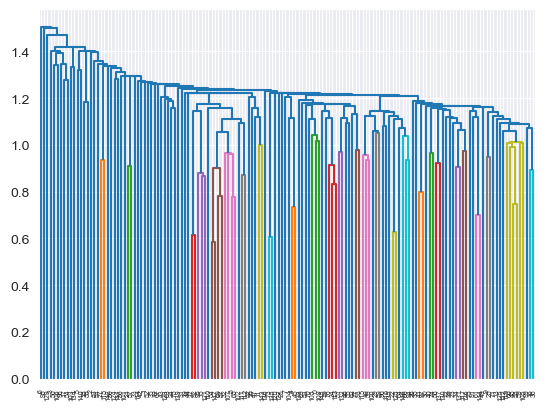

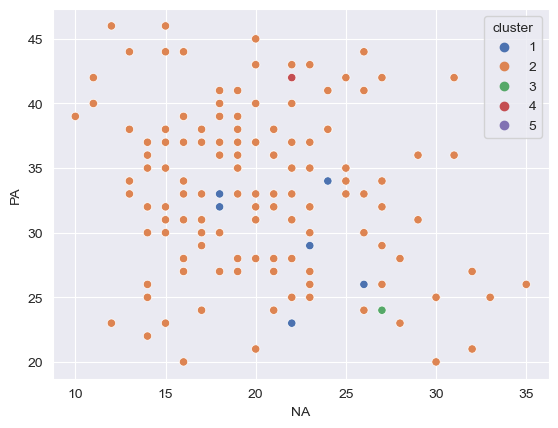

In [65]:
#All match trials
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2",
     "Count_Happy_1_3", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3", "Count_Sad_1_4"])

dataframe_match = create_dataframes_cluster(
    ["Count_Fear_1_1", "Count_Fear_1_2", "Count_Fear_1_3", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_2",
     "Count_Happy_1_3", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_2", "Count_Sad_1_3", "Count_Sad_1_4"], RETOS_BEBRASK_wide)


In [66]:
dataframe_match

Length Mean_PA Mean_NA Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3  \
2     139   33.50   20.05           1.04           2.63           3.06   
1       6   29.50   21.83           1.50           3.17           3.33   
5       1   37.00   20.00           3.00           1.00           0.00   
4       1   42.00   22.00           3.00           0.00           2.00   
3       1   24.00   27.00           3.00           1.00           2.00   

  Count_Fear_1_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
2           2.27            0.16            0.66            3.05   
1           1.00            1.33            3.00            3.50   
5           5.00            0.00            1.00            5.00   
4           4.00            0.00            0.00            1.00   
3           3.00            2.00            0.00            2.00   

  Count_Happy_1_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
2            5.13          0.76          2.45          3.56          2.23  
1            1.17          2.00          4.67          1.17          1.17  
5            3.00          0.00          1.00          7.00          1.00  
4            8.00          1.00          7.00          1.00          0.00  
3            5.00          2.00          2.00          5.00          0.00

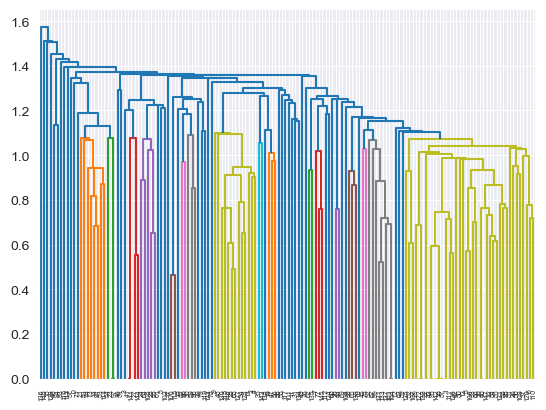

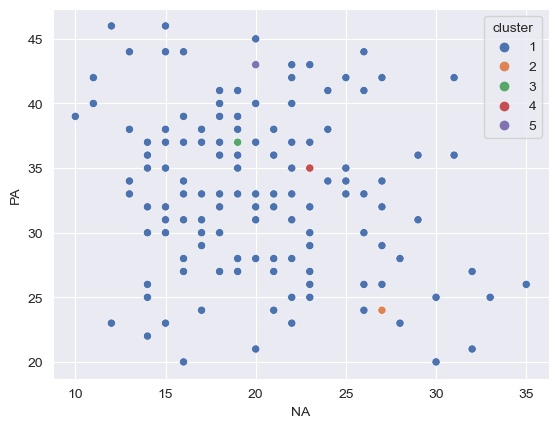

In [67]:
#All non match trials
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"])

dataframe_non_match = create_dataframes_cluster(["Count_Fear_0_1", "Count_Fear_0_2", "Count_Fear_0_3", "Count_Fear_0_4","Count_Happy_0_1", "Count_Happy_0_2", "Count_Happy_0_3","Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_2", "Count_Sad_0_3", "Count_Sad_0_4"],RETOS_BEBRASK_wide)

In [68]:
dataframe_non_match

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
1     144   33.32   20.12           3.08           1.47           0.99   
3       1   37.00   19.00           3.00           2.00           0.00   
2       1   24.00   27.00           5.00           0.00           0.00   
5       1   43.00   20.00           1.00           2.00           0.00   
4       1   35.00   23.00           4.00           1.00           1.00   

  Count_Fear_0_4 Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
1           0.46            5.05            0.73            0.19   
3           1.00            4.00            0.00            1.00   
2           1.00            4.00            1.00            1.00   
5           3.00            3.00            1.00            0.00   
4           0.00            5.00            0.00            0.00   

  Count_Happy_0_4 Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3 Count_Sad_0_4  
1            0.03          3.38          1.33          0.83          0.47  
3            1.00          4.00          0.00          2.00          0.00  
2            0.00          5.00          0.00          1.00          0.00  
5            2.00          0.00          4.00          1.00          1.00  
4            1.00          4.00          2.00          0.00          0.00

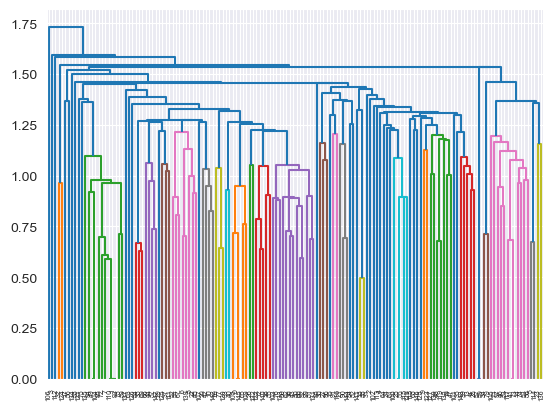

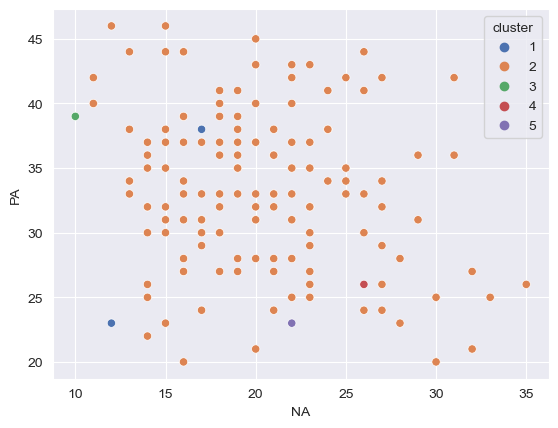

In [69]:
#Significant features for PA
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Fear_1_3', 'Count_Sad_1_2', 'Count_Fear_0_1', 'Count_Happy_0_2', 'Count_Fear_1_1'])

dataframe_features_PA = create_dataframes_cluster(['Count_Fear_1_3', 'Count_Sad_1_2', 'Count_Fear_0_1', 'Count_Happy_0_2', 'Count_Fear_1_1'], RETOS_BEBRASK_wide)


In [70]:
dataframe_features_PA

Length Mean_PA Mean_NA Count_Fear_1_3 Count_Sad_1_2 Count_Fear_0_1  \
2     143   33.48   20.28           3.03          2.46           3.03   
4       1   26.00   26.00           5.00          5.00           4.00   
1       2   30.50   14.50           1.00          5.00           5.00   
5       1   23.00   22.00           4.00          7.00           3.00   
3       1   39.00   10.00           5.00          5.00           6.00   

  Count_Happy_0_2 Count_Fear_1_1  
2            0.74           1.03  
4            1.00           3.00  
1            0.00           5.00  
5            0.00           0.00  
3            0.00           1.00

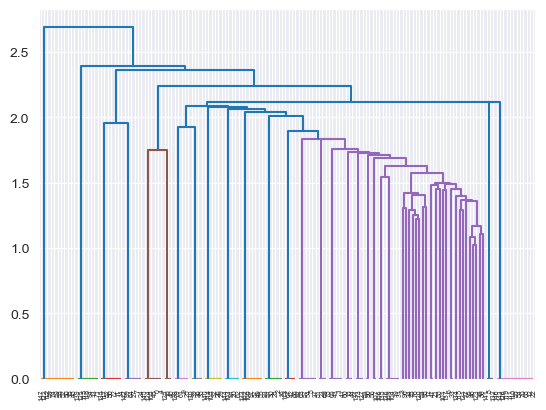

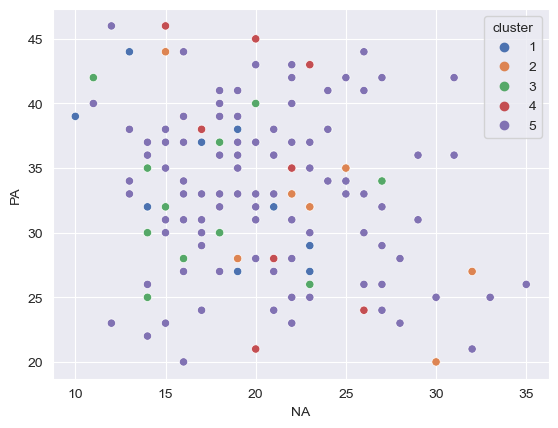

In [71]:
#Significant features for NA
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Fear_1_2', 'Count_Sad_1_3'])

dataframe_features_NA = create_dataframes_cluster(['Count_Fear_1_2', 'Count_Sad_1_3'], RETOS_BEBRASK_wide)


In [72]:
dataframe_features_NA

Length Mean_PA Mean_NA Count_Fear_1_2 Count_Sad_1_3
4       9   35.44   20.00           3.33          2.00
5     108   33.30   20.41           2.80          3.56
3      13   33.23   18.38           2.00          4.54
2       7   31.29   23.71           1.00          3.00
1      11   33.73   18.00           2.00          3.00

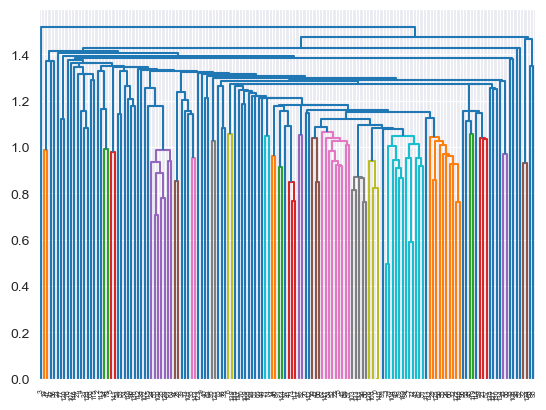

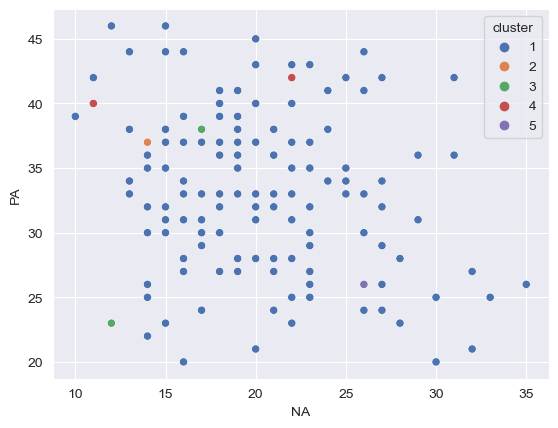

In [73]:
#Significant features for PA & NA
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Fear_1_2', 'Count_Sad_1_3','Count_Fear_1_3', 'Count_Sad_1_2', 'Count_Fear_0_1', 'Count_Happy_0_2', 'Count_Fear_1_1'])

dataframe_features_PA_NA = create_dataframes_cluster(['Count_Fear_1_2', 'Count_Sad_1_3','Count_Fear_1_3', 'Count_Sad_1_2', 'Count_Fear_0_1', 'Count_Happy_0_2', 'Count_Fear_1_1'], RETOS_BEBRASK_wide)


In [74]:
dataframe_features_PA_NA

Length Mean_PA Mean_NA Count_Fear_1_2 Count_Sad_1_3 Count_Fear_1_3  \
1     141   33.30   20.28           2.63          3.53           3.07   
5       1   26.00   26.00           1.00          0.00           5.00   
2       2   36.00   19.50           1.50          5.50           3.50   
3       2   30.50   14.50           2.50          2.00           1.00   
4       2   41.00   16.50           3.50          1.00           1.50   

  Count_Sad_1_2 Count_Fear_0_1 Count_Happy_0_2 Count_Fear_1_1  
1          2.47           3.09            0.74           0.99  
5          5.00           4.00            1.00           3.00  
2          1.50           1.50            1.00           2.50  
3          5.00           5.00            0.00           5.00  
4          6.50           2.00            0.00           2.00

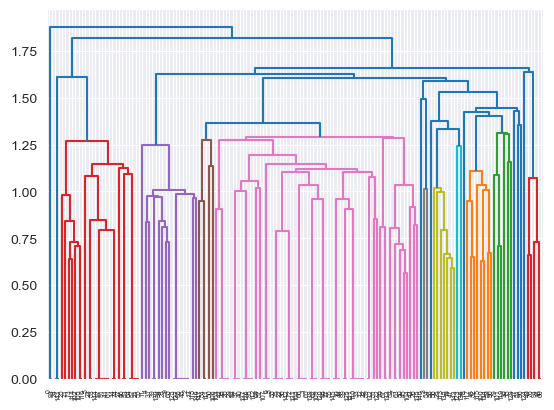

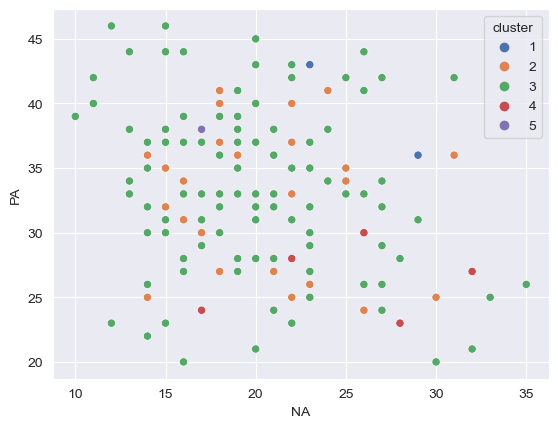

In [75]:
#Happiness trials
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'])

dataframe_happy = create_dataframes_cluster(['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'],RETOS_BEBRASK_wide)

In [76]:
dataframe_happy

Length Mean_PA Mean_NA Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
1       2   39.50   26.00            5.00            0.00            0.00   
3     114   33.57   19.80            5.03            0.71            0.21   
2      26   33.12   20.62            5.00            1.00            0.00   
4       5   26.40   25.00            5.00            0.00            1.00   
5       1   38.00   17.00            5.00            0.00            1.00   

  Count_Happy_0_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
1            1.00            0.00            0.00            1.00   
3            0.05            0.25            0.84            3.10   
2            0.00            0.12            0.50            3.04   
4            0.00            0.00            0.40            2.60   
5            0.00            0.00            0.00            6.00   

  Count_Happy_1_4  
1            8.00  
3            4.81  
2            5.35  
4            6.00  
5            3.00

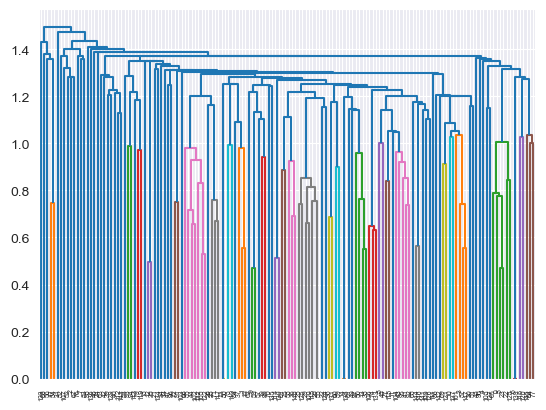

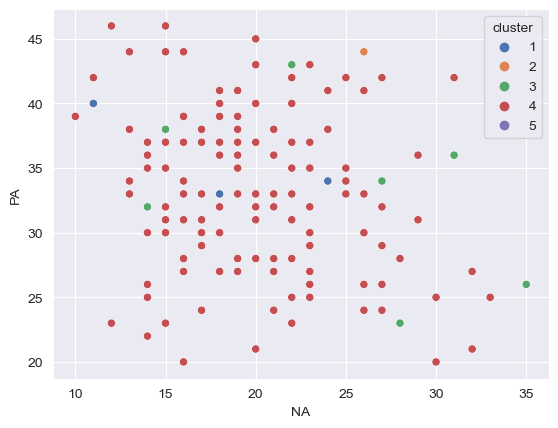

In [77]:
#Fear trials
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'])

dataframe_fear = create_dataframes_cluster(['Count_Fear_0_1','Count_Fear_0_2','Count_Fear_0_3','Count_Fear_0_4','Count_Fear_1_1','Count_Fear_1_2','Count_Fear_1_3','Count_Fear_1_4'],RETOS_BEBRASK_wide)


In [78]:
dataframe_fear

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_2 Count_Fear_0_3  \
4     134   33.22   19.86           3.19           1.46           0.94   
3       8   33.38   24.62           2.50           0.62           1.38   
1       4   37.50   18.25           1.00           2.75           1.50   
5       1   25.00   30.00           4.00           2.00           0.00   
2       1   44.00   26.00           1.00           4.00           1.00   

  Count_Fear_0_4 Count_Fear_1_1 Count_Fear_1_2 Count_Fear_1_3 Count_Fear_1_4  
4           0.42           1.01           2.55           3.08           2.36  
3           1.50           2.00           1.88           3.88           1.25  
1           0.75           1.50           5.75           0.75           1.00  
5           0.00           3.00           3.00           0.00           3.00  
2           0.00           2.00           4.00           3.00           0.00

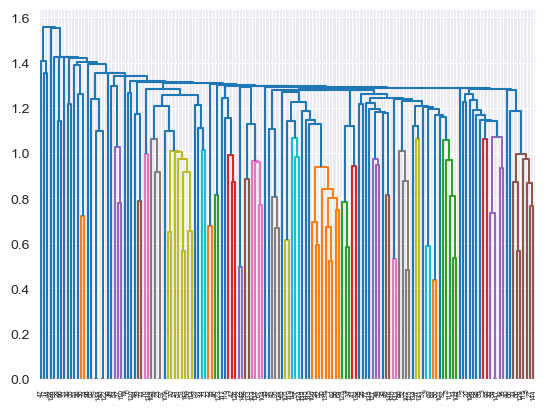

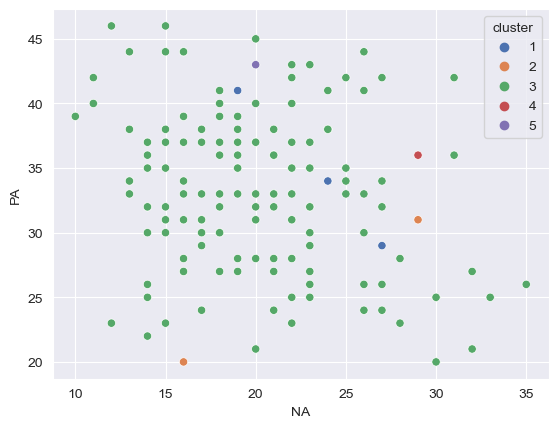

In [79]:
#Sad trials
RETOS_BEBRASK_wide = create_and_plot_clusters(RETOS_BEBRASK_wide,['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'])

dataframe_sad = create_dataframes_cluster(['Count_Sad_0_1','Count_Sad_0_2','Count_Sad_0_3','Count_Sad_0_4','Count_Sad_1_1','Count_Sad_1_2','Count_Sad_1_3','Count_Sad_1_4'],RETOS_BEBRASK_wide)


In [80]:
dataframe_sad

Length Mean_PA Mean_NA Count_Sad_0_1 Count_Sad_0_2 Count_Sad_0_3  \
3     141   33.35   20.02          3.43          1.30          0.80   
1       3   34.67   23.33          1.67          2.00          1.67   
2       2   25.50   22.50          3.50          1.50          1.00   
4       1   36.00   29.00          4.00          0.00          2.00   
5       1   43.00   20.00          0.00          4.00          1.00   

  Count_Sad_0_4 Count_Sad_1_1 Count_Sad_1_2 Count_Sad_1_3 Count_Sad_1_4  
3          0.46          0.74          2.53          3.56          2.17  
1          0.67          3.33          4.67          1.00          0.00  
2          0.00          3.00          2.50          1.50          2.00  
4          0.00          0.00          2.00          6.00          1.00  
5          1.00          0.00          1.00          1.00          7.00

## Combination of Counts

In [81]:
RETOS_BEBRASK_wide_v2 = RETOS_BEBRASK_wide.copy()

for emot in ["Happy","Sad","Fear"]:
    for match in [0,1]:
        for score in [2,3,4]:
            feat_1 = f'Count_{emot}_{match}_{score-1}'
            feat_2 = f'Count_{emot}_{match}_{score}'
            new_feat = f'Sum_{emot}_{match}_{score-1}_{score}'
            
            RETOS_BEBRASK_wide_v2[new_feat] = RETOS_BEBRASK_wide_v2[feat_1] + RETOS_BEBRASK_wide_v2[feat_2]
            if score == 4 or score == 3:
                RETOS_BEBRASK_wide_v2.drop([feat_1],axis=1,inplace=True)


In [82]:
RETOS_BEBRASK_wide_v2.drop(["NA","PA","cluster"],axis=1,inplace=True)

In [83]:
data = RETOS_BEBRASK_scale.select_dtypes(include=[np.number])

# Borrar columnas con más de 20 valores faltantes
cols_to_drop = data.columns[data.isnull().sum() > 20]
data.drop(columns=cols_to_drop, inplace=True)

# Imputar valores faltantes con la mediana
data.fillna(data.median(), inplace=True)

# Estandarización de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

data.drop("Age", axis=1, inplace=True)

data = data.reset_index()
data.drop("index", axis=1, inplace=True)

show_importance_metric(RETOS_BEBRASK_wide_v2,data)


PA ['Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Fear_0_1', 'Sum_Happy_0_2_3', 'Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Sad_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2']
NA. ['Sum_Fear_1_1_2', 'Sum_Fear_1_3_4', 'Count_Sad_1_1']
ERQ_CR ['Sum_Happy_1_2_3']
UPPSP_NU ['Count_Fear_0_4', 'Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Sad_1_4']
UPPSP_PU ['Sum_Sad_1_2_3', 'Sum_Happy_1_2_3']
UPPSP_SS ['Count_Fear_1_1']
UPPSP_PSV ['Sum_Sad_1_3_4', 'Sum_Sad_1_1_2', 'Count_Happy_0_4', 'Sum_Fear_1_2_3']
BIS ['Sum_Fear_0_2_3', 'Count_Happy_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2', 'Count_Sad_0_1']
BAS_RR ['Sum_Happy_0_2_3', 'Count_Fear_0_4']
BAS_D ['Sum_Happy_0_2_3', 'Count_Fear_0_4', 'Count_Happy_0_4', 'Count_Happy_0_1']
BAS_FS []
TEPS_AF ['Sum_Fear_1_2_3', 'Count_Fear_0_4']
TEPS_CF ['Sum_Fear_1_2_3']
SHS ['Count_Sad_0_4', 'Sum_Happy_0_2_3', 'Count_Fear_0_4', 'Count_Happy_1_1']
FS ['Sum_Sad_1_2_3', 'Sum_Happy_0_2_3']
LOT_R ['Count_Happy_0_1', 'Sum_Fear_0_3_4', 'Sum_Fear_0_1_2']
RRQ_Rum ['Sum_Fear_1_1_2',

In [84]:
RETOS_BEBRASK_wide_v2["PA"] = RETOS_BEBRASK_scale["PA"]
RETOS_BEBRASK_wide_v2["NA"] = RETOS_BEBRASK_scale["NA."]


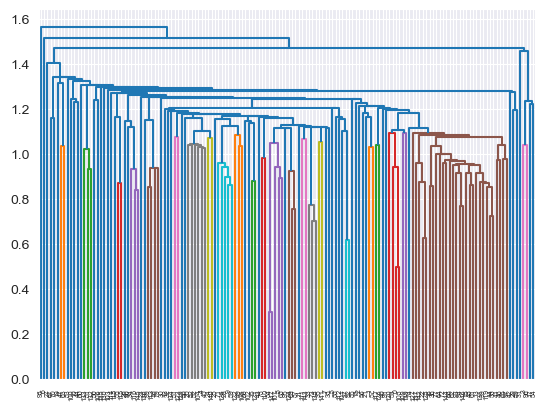

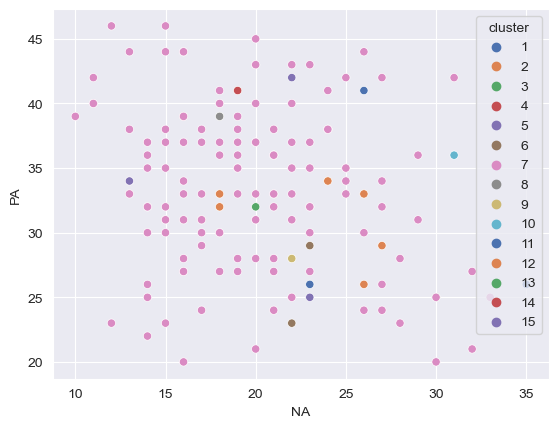

In [85]:
#All match trials
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,["Count_Fear_1_1", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_4","Sum_Happy_1_1_2",
     "Sum_Happy_1_2_3","Sum_Happy_1_3_4","Sum_Sad_1_1_2","Sum_Sad_1_2_3","Sum_Sad_1_3_4","Sum_Fear_1_1_2","Sum_Fear_1_2_3","Sum_Fear_1_3_4"],n_clusters=15)

dataframe_match = create_dataframes_cluster(
    ["Count_Fear_1_1", "Count_Fear_1_4", "Count_Happy_1_1", "Count_Happy_1_4", "Count_Sad_1_1", "Count_Sad_1_4","Sum_Happy_1_1_2",
     "Sum_Happy_1_2_3","Sum_Happy_1_3_4","Sum_Sad_1_1_2","Sum_Sad_1_2_3","Sum_Sad_1_3_4","Sum_Fear_1_1_2","Sum_Fear_1_2_3","Sum_Fear_1_3_4"], RETOS_BEBRASK_wide_v2)


In [86]:
dataframe_match

Length Mean_PA Mean_NA Count_Fear_1_1 Count_Fear_1_4 Count_Happy_1_1  \
7      124   33.54   19.74           1.02           2.38            0.15   
12       4   31.25   21.50           2.25           0.75            1.50   
14       1   37.00   20.00           3.00           5.00            0.00   
4        3   37.00   17.33           1.67           1.33            0.00   
3        1   32.00   20.00           0.00           2.00            0.00   
11       1   26.00   23.00           3.00           1.00            0.00   
13       1   25.00   30.00           3.00           3.00            1.00   
2        2   31.00   26.50           0.50           0.50            0.50   
6        2   26.00   22.50           0.00           1.50            1.00   
9        1   28.00   22.00           0.00           3.00            0.00   
1        2   33.50   30.50           3.50           1.00            1.00   
5        3   32.00   18.67           0.00           1.33            0.33   
10       1   36.00   31.00           0.00           1.00            0.00   
15       1   42.00   22.00           3.00           4.00            0.00   
8        1   39.00   18.00           1.00           2.00            1.00   

   Count_Happy_1_4 Count_Sad_1_1 Count_Sad_1_4 Sum_Happy_1_1_2  \
7             5.01          0.65          2.13            0.79   
12            1.50          3.00          0.75            4.75   
14            3.00          0.00          1.00            1.00   
4             6.33          2.33          1.33            1.00   
3             6.00          3.00          1.00            2.00   
11            7.00          0.00          1.00            1.00   
13            4.00          5.00          3.00            1.00   
2             4.50          4.50          0.00            2.00   
6             0.50          0.00          2.00            3.50   
9             6.00          2.00          2.00            0.00   
1             7.50          0.00          5.00            1.00   
5             7.33          0.33          4.33            1.33   
10            4.00          0.00          7.00            0.00   
15            8.00          1.00          0.00            0.00   
8             5.00          0.00          5.00            1.00   

   Sum_Happy_1_2_3 Sum_Happy_1_3_4 Sum_Sad_1_1_2 Sum_Sad_1_2_3 Sum_Sad_1_3_4  \
7             3.85            8.21          3.12          6.23          5.88   
12            6.00            4.25          7.50          5.25          1.50   
14            6.00            8.00          1.00          8.00          8.00   
4             2.67            8.00          5.33          5.33          3.67   
3             3.00            7.00          7.00          5.00          2.00   
11            2.00            8.00          4.00          8.00          5.00   
13            4.00            8.00          5.00          1.00          4.00   
2             4.00            7.00          7.50          4.50          1.50   
6             7.50            5.50          5.00          7.00          4.00   
9             3.00            9.00          6.00          5.00          3.00   
1             0.50            8.00          1.50          4.00          7.50   
5             1.33            7.67          1.00          4.33          8.00   
10            5.00            9.00          1.00          2.00          8.00   
15            1.00            9.00          8.00          8.00          1.00   
8             3.00            8.00          3.00          4.00          6.00   

   Sum_Fear_1_1_2 Sum_Fear_1_2_3 Sum_Fear_1_3_4  
7            3.59           5.60           5.41  
12           5.50           6.00           3.50  
14           4.00           1.00           5.00  
4            4.67           6.00           4.33  
3            3.00           7.00           6.00  
11           5.00           5.00           4.00  
13           6.00           3.00           3.00  
2            5.50           8.00           3.50  

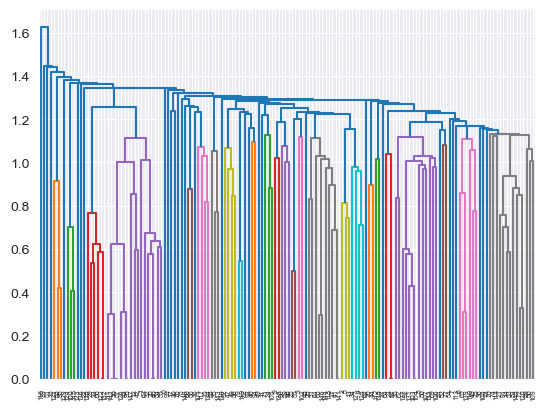

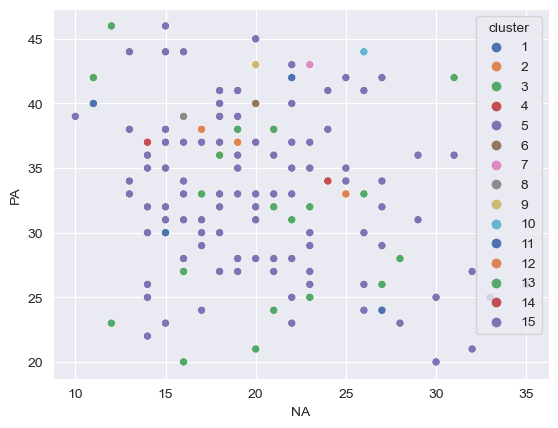

In [87]:
#All non match trials
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,["Count_Fear_0_1", "Count_Fear_0_4", "Count_Happy_0_1", "Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_4","Sum_Happy_0_1_2",
     "Sum_Happy_0_2_3","Sum_Happy_0_3_4","Sum_Sad_0_1_2","Sum_Sad_0_2_3","Sum_Sad_0_3_4","Sum_Fear_0_1_2","Sum_Fear_0_2_3","Sum_Fear_0_3_4"],n_clusters=15)

dataframe_no_match = create_dataframes_cluster(
    ["Count_Fear_0_1", "Count_Fear_0_4", "Count_Happy_0_1", "Count_Happy_0_4", "Count_Sad_0_1", "Count_Sad_0_4","Sum_Happy_0_1_2",
     "Sum_Happy_0_2_3","Sum_Happy_0_3_4","Sum_Sad_0_1_2","Sum_Sad_0_2_3","Sum_Sad_0_3_4","Sum_Fear_0_1_2","Sum_Fear_0_2_3","Sum_Fear_0_3_4"], RETOS_BEBRASK_wide_v2)

In [88]:
dataframe_no_match

Length Mean_PA Mean_NA Count_Fear_0_1 Count_Fear_0_4 Count_Happy_0_1  \
7        1   43.00   23.00           3.00           1.00            5.00   
3       23   31.87   19.61           4.13           0.09            6.00   
5      107   33.13   20.31           2.90           0.53            4.93   
4        2   35.50   19.00           1.50           0.50            2.00   
12       1   37.00   19.00           3.00           1.00            4.00   
8        1   39.00   16.00           3.00           1.00            6.00   
14       1   36.00   21.00           5.00           1.00            4.00   
13       1   33.00   21.00           3.00           0.00            3.00   
1        3   37.33   16.00           2.00           0.00            6.00   
6        1   40.00   20.00           1.00           0.00            6.00   
2        3   34.00   19.67           5.00           0.00            4.33   
15       1   35.00   25.00           2.00           3.00            5.00   
10       1   44.00   26.00           1.00           0.00            3.00   
11       1   24.00   27.00           5.00           1.00            4.00   
9        1   43.00   20.00           1.00           3.00            3.00   

   Count_Happy_0_4 Count_Sad_0_1 Count_Sad_0_4 Sum_Happy_0_1_2  \
7             1.00          3.00          1.00            5.00   
3             0.00          4.43          0.04            6.00   
5             0.03          3.21          0.58            5.80   
4             0.00          1.50          0.00            4.00   
12            1.00          4.00          0.00            4.00   
8             0.00          4.00          0.00            6.00   
14            0.00          2.00          1.00            6.00   
13            0.00          2.00          0.00            3.00   
1             0.00          5.00          0.00            6.00   
6             0.00          4.00          1.00            6.00   
2             0.00          2.67          0.00            5.00   
15            0.00          3.00          0.00            6.00   
10            1.00          2.00          1.00            5.00   
11            0.00          5.00          0.00            5.00   
9             2.00          0.00          1.00            4.00   

   Sum_Happy_0_2_3 Sum_Happy_0_3_4 Sum_Sad_0_1_2 Sum_Sad_0_2_3 Sum_Sad_0_3_4  \
7             0.00            1.00          3.00          2.00          3.00   
3             0.00            0.00          5.74          1.52          0.26   
5             1.05            0.20          4.49          2.21          1.51   
4             4.00            2.00          4.00          4.50          2.00   
12            1.00            2.00          4.00          2.00          2.00   
8             0.00            0.00          6.00          2.00          0.00   
14            2.00            0.00          4.00          3.00          2.00   
13            3.00            3.00          6.00          4.00          0.00   
1             0.00            0.00          6.00          1.00          0.00   
6             0.00            0.00          5.00          1.00          1.00   
2             1.67            1.00          4.00          3.33          2.00   
15            1.00            0.00          6.00          3.00          0.00   
10            2.00            1.00          4.00          3.00          2.00   
11            2.00            1.00          5.00          1.00          1.00   
9             1.00            2.00          4.00          5.00          2.00   

   Sum_Fear_0_1_2 Sum_Fear_0_2_3 Sum_Fear_0_3_4  
7            4.00           2.00           2.00  
3            5.57           1.78           0.43  
5            4.36           2.57           1.64  
4            3.50           4.00           2.50  
12           5.00           2.00           1.00  
8            4.00           2.00           2.00  
14           5.00           0.00           1.00  
13           5.00           3.00           1.00  

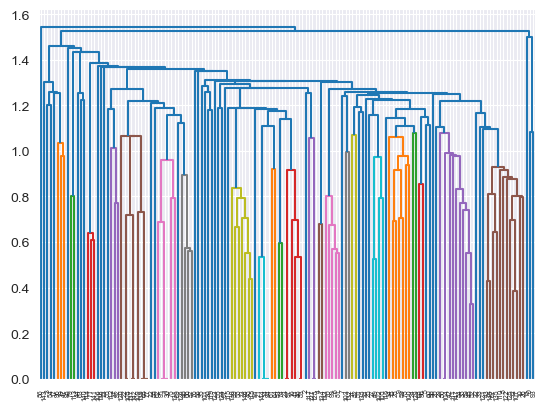

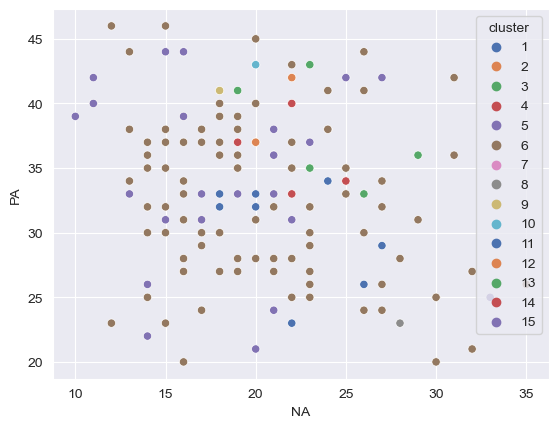

In [89]:
#All features important PA
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Fear_0_1', 'Sum_Happy_0_2_3', 'Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Sad_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2'],n_clusters=15)

dataframe_PA = create_dataframes_cluster(
    ['Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Fear_0_1', 'Sum_Happy_0_2_3', 'Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Sad_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2'], RETOS_BEBRASK_wide_v2)


In [90]:
dataframe_PA

Length Mean_PA Mean_NA Sum_Sad_1_1_2 Sum_Sad_1_3_4 Count_Fear_0_1  \
13       2   39.50   26.00          1.50          7.50           3.00   
5       26   34.88   18.31          2.54          6.46           3.27   
6       97   32.72   20.31          3.26          5.74           3.12   
1        7   31.29   21.86          7.29          1.71           2.29   
14       1   37.00   19.00          6.00          3.00           3.00   
3        3   36.33   22.67          7.00          2.00           4.67   
7        1   43.00   20.00          3.00          6.00           0.00   
4        3   35.67   23.00          4.33          4.67           2.67   
9        1   41.00   18.00          1.00          8.00           3.00   
8        1   23.00   28.00          0.00          9.00           2.00   
2        2   32.00   18.00          0.50          8.50           3.50   
15       1   26.00   14.00          2.00          7.00           3.00   
12       1   42.00   22.00          8.00          1.00           2.00   
11       1   23.00   22.00          7.00          2.00           3.00   
10       1   43.00   20.00          1.00          8.00           1.00   

   Sum_Happy_0_2_3 Count_Happy_0_1 Count_Happy_0_4 Count_Sad_1_1  \
13            0.00            5.00            1.00          0.00   
5             0.00            6.00            0.00          0.42   
6             1.04            4.95            0.01          0.78   
1             2.71            3.29            0.00          3.14   
14            1.00            4.00            1.00          0.00   
3             0.00            5.67            0.33          3.00   
7             3.00            3.00            0.00          1.00   
4             1.00            5.00            0.00          0.00   
9             1.00            5.00            0.00          0.00   
8             1.00            5.00            0.00          0.00   
2             3.00            3.00            0.00          0.00   
15            1.00            4.00            1.00          0.00   
12            0.00            6.00            0.00          1.00   
11            0.00            6.00            0.00          0.00   
10            1.00            3.00            2.00          0.00   

   Sum_Happy_1_3_4 Sum_Happy_1_1_2  
13            9.00            0.00  
5             9.00            0.00  
6             8.01            0.99  
1             5.29            3.71  
14            9.00            0.00  
3             7.33            1.67  
7             9.00            0.00  
4             7.00            2.00  
9             7.00            2.00  
8             8.00            1.00  
2             8.00            1.00  
15            8.00            1.00  
12            9.00            0.00  
11            6.00            3.00  
10            8.00            1.00

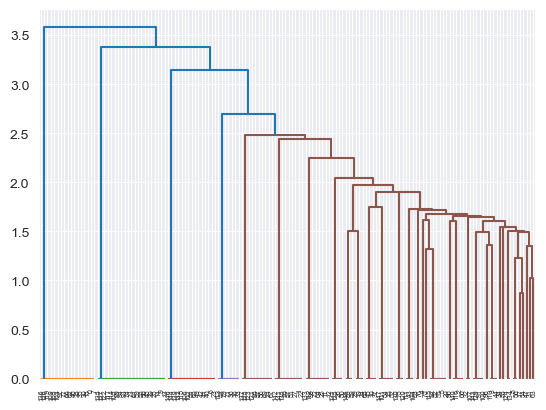

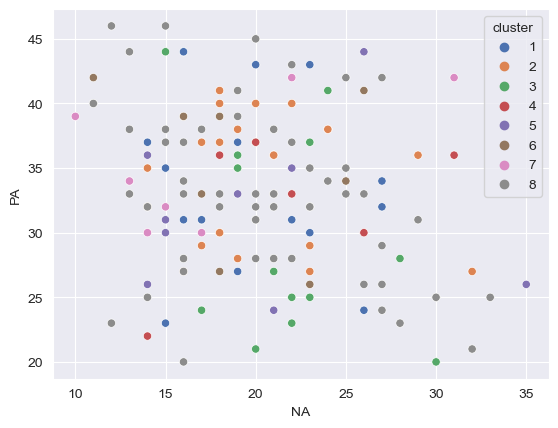

In [91]:
#All features important NA
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Sum_Fear_1_1_2', 'Sum_Fear_1_3_4', 'Count_Sad_1_1'],n_clusters=8)

dataframe_NA = create_dataframes_cluster(
    ['Sum_Fear_1_1_2', 'Sum_Fear_1_3_4', 'Count_Sad_1_1'], RETOS_BEBRASK_wide_v2)

In [92]:
dataframe_NA

Length Mean_PA Mean_NA Sum_Fear_1_1_2 Sum_Fear_1_3_4 Count_Sad_1_1
1      17   33.94   19.41           3.00           6.00          0.00
6       9   34.89   19.44           5.00           4.00          0.00
8      61   33.39   20.43           4.26           4.74          1.84
3      15   30.67   21.53           4.00           5.00          0.00
2      21   34.38   20.29           2.00           7.00          0.00
7       8   35.88   18.25           3.00           6.00          1.00
4       7   31.57   21.00           1.00           8.00          0.00
5      10   31.90   19.40           6.00           3.00          0.00

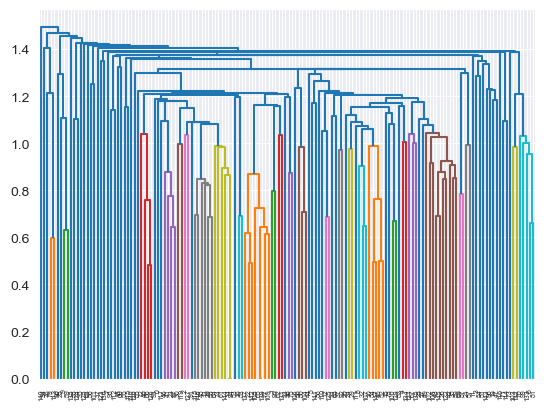

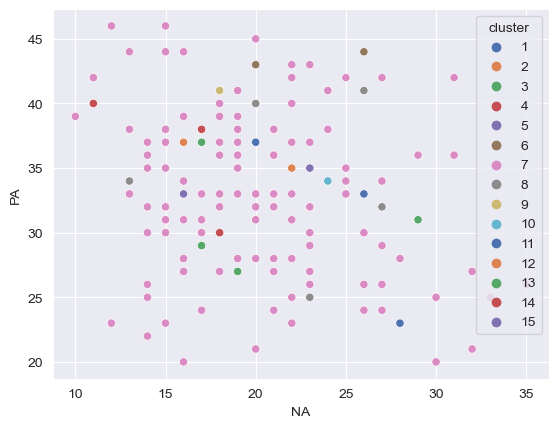

In [93]:
#All features important PA & NA
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Sum_Fear_1_1_2', 'Sum_Fear_1_3_4','Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Fear_0_1', 'Sum_Happy_0_2_3', 'Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Sad_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2'],n_clusters=15)

dataframe_PA_NA = create_dataframes_cluster(
    ['Sum_Fear_1_1_2', 'Sum_Fear_1_3_4','Sum_Sad_1_1_2', 'Sum_Sad_1_3_4', 'Count_Fear_0_1', 'Sum_Happy_0_2_3', 'Count_Happy_0_1', 'Count_Happy_0_4', 'Count_Sad_1_1', 'Sum_Happy_1_3_4', 'Sum_Happy_1_1_2'], RETOS_BEBRASK_wide_v2)


In [94]:
dataframe_PA_NA

Length Mean_PA Mean_NA Sum_Fear_1_1_2 Sum_Fear_1_3_4 Sum_Sad_1_1_2  \
7      120   33.02   20.18           3.74           5.26          3.48   
8        7   35.14   21.29           3.57           5.43          0.86   
3        4   32.25   19.25           2.00           7.00          4.50   
10       1   34.00   24.00           7.00           2.00          8.00   
2        1   37.00   16.00           0.00           9.00          2.00   
13       1   27.00   19.00           3.00           6.00          5.00   
5        2   38.00   18.00           6.50           2.50          4.00   
11       1   33.00   26.00           6.00           3.00          7.00   
9        1   41.00   18.00           2.00           7.00          1.00   
1        3   29.00   21.33           0.67           8.33          0.33   
4        2   39.00   14.00           7.50           1.50          6.00   
6        2   43.50   23.00           4.50           4.50          1.50   
12       1   35.00   22.00           6.00           3.00          2.00   
14       1   30.00   18.00           2.00           7.00          2.00   
15       1   35.00   23.00           2.00           7.00          6.00   

   Sum_Sad_1_3_4 Count_Fear_0_1 Sum_Happy_0_2_3 Count_Happy_0_1  \
7           5.52           3.20            0.80            5.17   
8           8.14           2.57            0.00            6.00   
3           4.50           1.50            2.00            4.00   
10          1.00           1.00            5.00            1.00   
2           7.00           3.00            2.00            4.00   
13          4.00           4.00            3.00            3.00   
5           5.00           2.00            3.00            3.00   
11          2.00           6.00            0.00            6.00   
9           8.00           3.00            1.00            5.00   
1           8.67           3.00            2.33            3.67   
4           3.00           3.50            0.50            5.50   
6           7.50           1.00            1.50            3.00   
12          7.00           3.00            2.00            4.00   
14          7.00           2.00            3.00            3.00   
15          3.00           4.00            0.00            5.00   

   Count_Happy_0_4 Count_Sad_1_1 Sum_Happy_1_3_4 Sum_Happy_1_1_2  
7             0.03          0.88            8.10            0.90  
8             0.00          0.14            7.57            1.43  
3             0.00          0.75            8.00            1.00  
10            0.00          2.00            5.00            4.00  
2             0.00          1.00            8.00            1.00  
13            0.00          0.00            7.00            2.00  
5             0.00          1.00            9.00            0.00  
11            0.00          4.00            7.00            2.00  
9             0.00          0.00            7.00            2.00  
1             0.00          0.00            8.00            1.00  
4             0.00          0.00            9.00            0.00  
6             1.50          0.00            7.50            1.50  
12            0.00          0.00            9.00            0.00  
14            0.00          0.00            7.00            2.00  
15            1.00          2.00            7.00            2.00

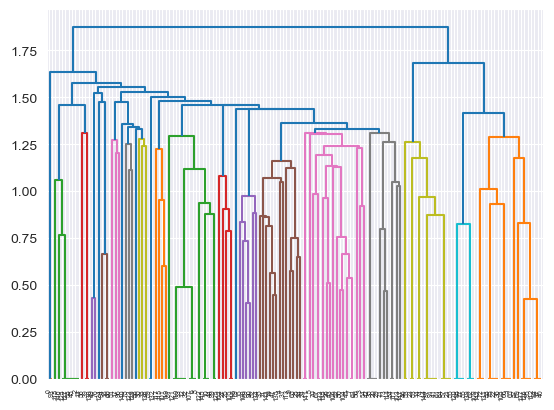

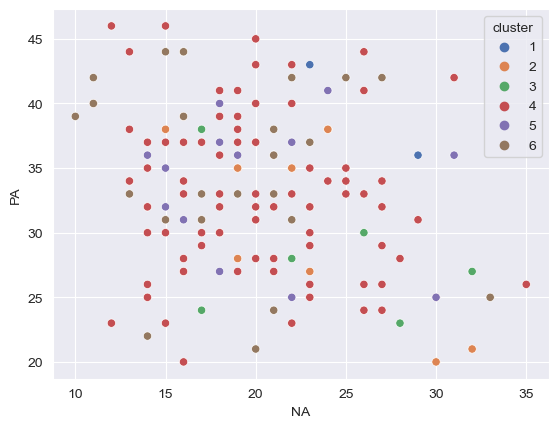

In [95]:
#Happiness trials
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Count_Happy_0_1','Sum_Happy_0_1_2','Sum_Happy_0_2_3','Sum_Happy_0_3_4','Count_Happy_0_4','Count_Happy_1_1','Sum_Happy_1_1_2','Sum_Happy_1_2_3','Sum_Happy_1_3_4','Count_Happy_1_4'],n_clusters=6)

dataframe_happy = create_dataframes_cluster(['Count_Happy_0_1','Sum_Happy_0_1_2','Sum_Happy_0_2_3','Sum_Happy_0_3_4','Count_Happy_0_4','Count_Happy_1_1','Sum_Happy_1_1_2','Sum_Happy_1_2_3','Sum_Happy_1_3_4','Count_Happy_1_4'],RETOS_BEBRASK_wide_v2)

In [96]:
dataframe_happy

Length Mean_PA Mean_NA Count_Happy_0_1 Sum_Happy_0_1_2 Sum_Happy_0_2_3  \
1       2   39.50   26.00            5.00            5.00            0.00   
6      27   35.15   18.44            6.00            6.00            0.00   
2      11   31.91   22.09            3.91            6.00            2.09   
4      87   33.06   20.06            4.86            5.66            1.07   
5      15   34.13   20.47            5.00            6.00            1.00   
3       6   28.33   23.67            5.00            5.00            1.00   

  Sum_Happy_0_3_4 Count_Happy_0_4 Count_Happy_1_1 Sum_Happy_1_1_2  \
1            1.00            1.00            0.00            0.00   
6            0.00            0.00            0.00            0.00   
2            0.00            0.00            0.00            0.00   
4            0.34            0.07            0.37            1.62   
5            0.00            0.00            0.00            0.00   
3            1.00            0.00            0.00            0.33   

  Sum_Happy_1_2_3 Sum_Happy_1_3_4 Count_Happy_1_4  
1            1.00            9.00            8.00  
6            3.33            9.00            5.67  
2            3.18            9.00            5.82  
4            4.29            7.38            4.34  
5            2.87            9.00            6.13  
3            3.50            8.67            5.50

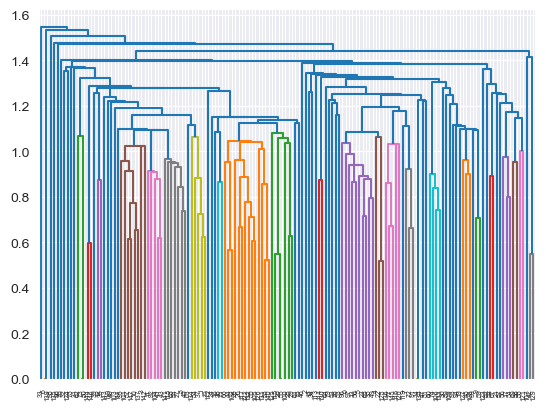

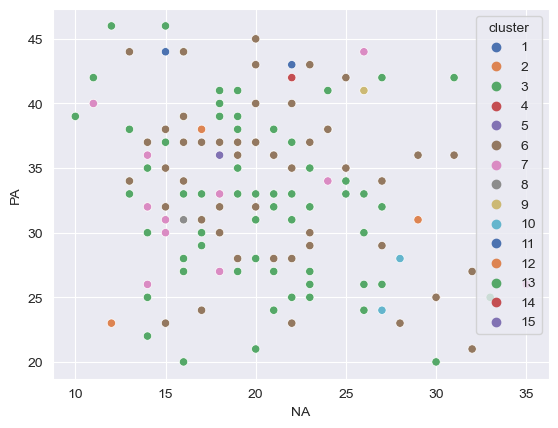

In [97]:
#Fear trials
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Count_Fear_0_1', 'Sum_Fear_0_1_2', 'Sum_Fear_0_2_3', 'Sum_Fear_0_3_4', 'Count_Fear_0_4', 'Count_Fear_1_1',
     'Sum_Fear_1_1_2', 'Sum_Fear_1_2_3', 'Sum_Fear_1_3_4', 'Count_Fear_1_4'],n_clusters=15)

dataframe_fear = create_dataframes_cluster(
    ['Count_Fear_0_1', 'Sum_Fear_0_1_2', 'Sum_Fear_0_2_3', 'Sum_Fear_0_3_4', 'Count_Fear_0_4', 'Count_Fear_1_1',
     'Sum_Fear_1_1_2', 'Sum_Fear_1_2_3', 'Sum_Fear_1_3_4', 'Count_Fear_1_4'], RETOS_BEBRASK_wide_v2)


In [98]:
dataframe_fear

Length Mean_PA Mean_NA Count_Fear_0_1 Sum_Fear_0_1_2 Sum_Fear_0_2_3  \
6       53   33.94   20.66           2.51           3.62           2.58   
3       67   32.60   19.76           3.73           5.39           2.16   
1        2   40.50   17.50           3.00           4.00           2.00   
7       13   33.62   19.15           1.77           3.77           3.54   
4        1   25.00   30.00           4.00           6.00           2.00   
2        2   30.50   14.50           5.00           6.00           1.00   
15       1   36.00   18.00           5.00           6.00           1.00   
10       2   26.00   27.50           4.50           5.00           0.50   
8        1   31.00   16.00           2.00           2.00           4.00   
9        1   41.00   26.00           2.00           5.00           3.00   
5        1   35.00   19.00           3.00           5.00           2.00   
12       1   31.00   29.00           1.00           2.00           5.00   
14       1   42.00   22.00           2.00           4.00           4.00   
11       1   43.00   22.00           4.00           5.00           1.00   
13       1   39.00   18.00           2.00           6.00           4.00   

   Sum_Fear_0_3_4 Count_Fear_0_4 Count_Fear_1_1 Sum_Fear_1_1_2 Sum_Fear_1_2_3  \
6            2.38           0.91           0.51           2.66           5.34   
3            0.61           0.10           1.12           3.85           6.07   
1            2.00           1.00           3.00           4.00           1.00   
7            2.23           0.69           1.92           6.23           6.46   
4            0.00           0.00           3.00           6.00           3.00   
2            0.00           0.00           5.00           7.50           3.50   
15           0.00           0.00           0.00           1.00           7.00   
10           1.00           1.00           3.00           4.00           3.00   
8            4.00           0.00           0.00           3.00           8.00   
9            1.00           1.00           2.00           5.00           5.00   
5            1.00           1.00           1.00           5.00           8.00   
12           4.00           0.00           1.00           2.00           3.00   
14           2.00           0.00           3.00           3.00           2.00   
11           1.00           1.00           2.00           8.00           6.00   
13           0.00           0.00           1.00           5.00           6.00   

   Sum_Fear_1_3_4 Count_Fear_1_4  
6            6.34           3.15  
3            5.15           1.81  
1            5.00           5.00  
7            2.77           0.62  
4            3.00           3.00  
2            1.50           0.50  
15           8.00           2.00  
10           5.00           3.00  
8            6.00           1.00  
9            4.00           2.00  
5            4.00           0.00  
12           7.00           5.00  
14           6.00           4.00  
11           1.00           1.00  
13           4.00           2.00

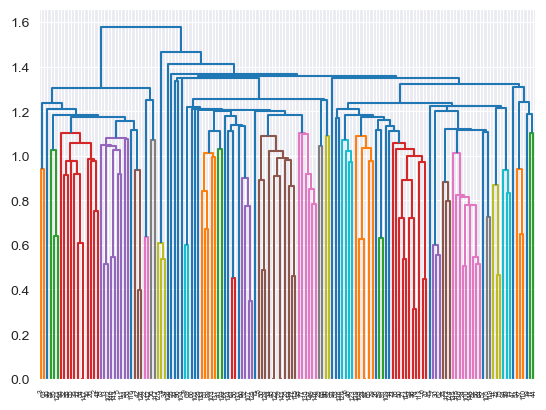

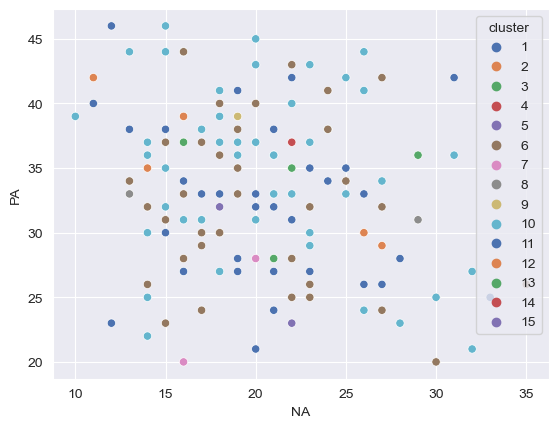

In [99]:
#Sadness trials
RETOS_BEBRASK_wide_v2 = create_and_plot_clusters(RETOS_BEBRASK_wide_v2,['Count_Sad_0_1', 'Sum_Sad_0_1_2', 'Sum_Sad_0_2_3', 'Sum_Sad_0_3_4', 'Count_Sad_0_4', 'Count_Sad_1_1',
     'Sum_Sad_1_1_2', 'Sum_Sad_1_2_3', 'Sum_Sad_1_3_4', 'Count_Sad_1_4'],n_clusters=15)

dataframe_sad = create_dataframes_cluster(
    ['Count_Sad_0_1', 'Sum_Sad_0_1_2', 'Sum_Sad_0_2_3', 'Sum_Sad_0_3_4', 'Count_Sad_0_4', 'Count_Sad_1_1',
     'Sum_Sad_1_1_2', 'Sum_Sad_1_2_3', 'Sum_Sad_1_3_4', 'Count_Sad_1_4'], RETOS_BEBRASK_wide_v2)


In [100]:
dataframe_sad

Length Mean_PA Mean_NA Count_Sad_0_1 Sum_Sad_0_1_2 Sum_Sad_0_2_3  \
10      53   35.08   20.43          2.79          3.70          2.36   
1       31   32.23   20.03          4.13          6.00          1.87   
3        3   33.33   19.67          3.00          5.00          3.00   
6       40   32.42   19.62          3.77          5.00          1.85   
2        4   36.50   16.75          2.50          6.00          3.50   
11       6   33.83   21.17          2.50          4.00          2.67   
7        2   24.00   18.00          4.00          5.00          2.00   
4        1   25.00   30.00          4.00          5.00          1.00   
12       1   29.00   27.00          3.00          3.00          3.00   
14       1   37.00   22.00          3.00          5.00          3.00   
8        2   32.00   21.00          2.50          5.00          3.00   
13       1   36.00   29.00          4.00          4.00          2.00   
5        1   32.00   18.00          4.00          5.00          2.00   
9        1   39.00   19.00          3.00          5.00          2.00   
15       1   23.00   22.00          5.00          5.00          1.00   

   Sum_Sad_0_3_4 Count_Sad_0_4 Count_Sad_1_1 Sum_Sad_1_1_2 Sum_Sad_1_2_3  \
10          2.30          0.85          0.49          2.42          5.45   
1           0.00          0.00          1.10          4.42          6.61   
3           1.00          0.00          0.67          2.00          3.67   
6           1.00          0.38          0.38          3.08          6.92   
2           0.00          0.00          0.00          1.00          5.50   
11          2.00          0.83          2.67          6.67          5.67   
7           1.00          0.00          2.50          5.50          5.50   
4           1.00          1.00          5.00          5.00          1.00   
12          3.00          0.00          5.00          8.00          4.00   
14          1.00          0.00          2.00          4.00          6.00   
8           1.00          0.50          2.50          6.00          5.00   
13          2.00          0.00          0.00          2.00          8.00   
5           1.00          0.00          4.00          8.00          4.00   
9           1.00          1.00          1.00          4.00          4.00   
15          1.00          0.00          0.00          7.00          8.00   

   Sum_Sad_1_3_4 Count_Sad_1_4  
10          6.58          3.06  
1           4.58          1.29  
3           7.00          4.67  
6           5.92          1.70  
2           8.00          3.50  
11          2.33          0.67  
7           3.50          1.00  
4           4.00          3.00  
12          1.00          0.00  
14          5.00          1.00  
8           3.00          1.50  
13          7.00          1.00  
5           1.00          1.00  
9           5.00          4.00  
15          2.00          1.00

## Clustering using MA

In [123]:
merged_dict = {**subject_dict_BEBRASK, **subject_dict_RETOS}

In [138]:
def compute_moving_averages_no_edges(data):
    results = {}
    for instance, categories in data.items():
        results[instance] = {}
        for category, info in categories.items():
            pred = info['Pred']
            fulfill = info['Fulfill']
            fulfill_0_positions = np.where(fulfill == 0)[0]
            fulfill_1_positions = np.where(fulfill == 1)[0]

            # Calculate moving averages for fulfill 0 excluding edges
            ma_fulfill_0 = []
            for i,pos in enumerate(fulfill_0_positions):
                if i == 0 or i == len(fulfill_0_positions) - 1:
                    continue  # Skip first and last positions
                relevant_preds = [pred[fulfill_0_positions[i-1]],pred[fulfill_0_positions[i]],pred[fulfill_0_positions[i+1]]]
                ma_fulfill_0.append(np.mean(relevant_preds))

            # Calculate moving averages for fulfill 1 excluding edges
            ma_fulfill_1 = []
            for i,pos in enumerate(fulfill_1_positions):
                if i == 0 or i == len(fulfill_1_positions) - 1:
                    continue  # Skip first and last positions
                relevant_preds = [pred[fulfill_1_positions[i-1]],pred[fulfill_1_positions[i]],pred[fulfill_1_positions[i+1]]]
                ma_fulfill_1.append(np.mean(relevant_preds))

            results[instance][category] = {
                'Fulfill_0_MA': ma_fulfill_0,
                'Fulfill_1_MA': ma_fulfill_1
            }
    return results

# Compute moving averages excluding first and last positions
moving_averages_no_edges_results = compute_moving_averages_no_edges(merged_dict)

In [140]:
records = []
for subject_id, emotions in moving_averages_no_edges_results.items():
    record = {'Subject ID': subject_id}
    for emotion, stats in emotions.items():
        for stat_key, stat_value in stats.items():
            for i,val in enumerate(stat_value):
            # Creating new column names in the format "Emotion_StatisticalMeasure"
                column_name = f"{emotion}_{stat_key[8]}_MA_{i}"
                record[column_name] = val
    records.append(record)

# Creating a new DataFrame with the adjusted structure
RETOS_BEBRASK_MA = pd.DataFrame(records)
RETOS_BEBRASK_MA

Subject ID  Happy_0_MA_0  Happy_0_MA_1  Happy_0_MA_2  \
0    PREDWELL_RETOS-1001-1      2.000000      1.000000      1.000000   
1    PREDWELL_RETOS-1002-1      1.666667      1.666667      1.666667   
2    PREDWELL_RETOS-1003-1      1.000000      1.000000      1.000000   
3    PREDWELL_RETOS-1004-1      1.666667      2.333333      2.666667   
4    PREDWELL_RETOS-1005-1      1.000000      1.000000      1.333333   
..                     ...           ...           ...           ...   
143     PREDWELL_RETOS-5-1      1.666667      1.333333      1.000000   
144     PREDWELL_RETOS-6-1      1.333333      1.333333      1.000000   
145     PREDWELL_RETOS-7-1      1.000000      1.000000      1.000000   
146     PREDWELL_RETOS-8-1      1.000000      1.000000      1.000000   
147     PREDWELL_RETOS-9-1      1.000000      1.000000      1.000000   

     Happy_0_MA_3  Happy_1_MA_0  Happy_1_MA_1  Happy_1_MA_2  Happy_1_MA_3  \
0        1.000000      4.000000      4.000000      3.666667      3.666667   
1        1.000000      3.666667      4.000000      4.000000      4.000000   
2        1.000000      3.333333      3.666667      3.666667      3.333333   
3        2.000000      2.333333      2.333333      1.333333      1.666667   
4        1.333333      3.666667      3.333333      3.666667      3.333333   
..            ...           ...           ...           ...           ...   
143      1.000000      3.666667      3.333333      3.000000      2.666667   
144      1.000000      3.333333      2.666667      2.666667      2.666667   
145      1.000000      3.000000      3.333333      3.000000      3.666667   
146      1.000000      3.000000      2.333333      2.000000      2.666667   
147      1.000000      3.000000      3.333333      3.000000      3.333333   

     Happy_1_MA_4  ...  Fear_0_MA_1  Fear_0_MA_2  Fear_0_MA_3  Fear_1_MA_0  \
0        3.666667  ...     1.666667     1.000000     1.666667     2.666667   
1        3.666667  ...     3.000000     2.333333     1.666667     2.333333   
2        3.000000  ...     1.333333     1.666667     2.000000     2.333333   
3        2.333333  ...     1.333333     2.333333     2.333333     3.000000   
4        3.666667  ...     2.333333     3.000000     2.000000     2.000000   
..            ...  ...          ...          ...          ...          ...   
143      3.333333  ...     2.666667     2.000000     1.000000     2.000000   
144      3.666667  ...     2.666667     2.666667     2.000000     2.000000   
145      3.333333  ...     2.000000     1.666667     2.666667     2.333333   
146      3.333333  ...     3.000000     3.000000     2.666667     3.333333   
147      3.333333  ...     1.333333     2.000000     2.000000     1.333333   

     Fear_1_MA_1  Fear_1_MA_2  Fear_1_MA_3  Fear_1_MA_4  Fear_1_MA_5  \
0       2.000000     2.666667     3.000000     3.333333     3.333333   
1       2.666667     3.333333     3.666667     3.000000     3.000000   
2       2.333333     2.333333     2.000000     1.666667     2.000000   
3       2.666667     2.333333     2.333333     2.666667     2.000000   
4       2.333333     2.666667     3.000000     3.333333     3.333333   
..           ...          ...          ...          ...          ...   
143     2.333333     3.333333     3.000000     3.333333     2.666667   
144     2.666667     2.666667     3.000000     2.333333     3.000000   
145     2.333333     3.333333     3.000000     3.000000     3.000000   
146     3.333333     3.000000     3.000000     2.666667     2.333333   
147     2.333333     2.000000     2.333333     1.666667     2.333333   

     Fear_1_MA_6  
0       3.333333  
1       3.000000  
2       2.333333  
3       2.000000  
4       3.333333  
..           ...  
143     2.333333  
144     3.333333  
145     3.000000  
146     2.000000  
147     2.333333  

[148 rows x 34 columns]

In [142]:
temporal_happy_0 = RETOS_BEBRASK_MA[["Subject ID","Happy_0_MA_0","Happy_0_MA_1","Happy_0_MA_2","Happy_0_MA_3"]]
temporal_happy_1 = RETOS_BEBRASK_MA[["Subject ID","Happy_1_MA_0","Happy_1_MA_1","Happy_1_MA_2","Happy_1_MA_3","Happy_1_MA_4","Happy_1_MA_5","Happy_1_MA_6"]]
temporal_fear_0 = RETOS_BEBRASK_MA[["Subject ID","Fear_0_MA_0","Fear_0_MA_1","Fear_0_MA_2","Fear_0_MA_3"]]
temporal_fear_1 = RETOS_BEBRASK_MA[["Subject ID","Fear_1_MA_0","Fear_1_MA_1","Fear_1_MA_2","Fear_1_MA_3","Fear_1_MA_4","Fear_1_MA_5","Fear_1_MA_6"]]
temporal_sad_0 = RETOS_BEBRASK_MA[["Subject ID","Sad_0_MA_0","Sad_0_MA_1","Sad_0_MA_2","Sad_0_MA_3"]]
temporal_sad_1 = RETOS_BEBRASK_MA[["Subject ID","Sad_1_MA_0","Sad_1_MA_1","Sad_1_MA_2","Sad_1_MA_3","Sad_1_MA_4","Sad_1_MA_5","Sad_1_MA_6"]]


In [149]:
temporal_happy_1.drop("Subject ID",axis=1)

Happy_1_MA_0  Happy_1_MA_1  Happy_1_MA_2  Happy_1_MA_3  Happy_1_MA_4  \
0        4.000000      4.000000      3.666667      3.666667      3.666667   
1        3.666667      4.000000      4.000000      4.000000      3.666667   
2        3.333333      3.666667      3.666667      3.333333      3.000000   
3        2.333333      2.333333      1.333333      1.666667      2.333333   
4        3.666667      3.333333      3.666667      3.333333      3.666667   
..            ...           ...           ...           ...           ...   
143      3.666667      3.333333      3.000000      2.666667      3.333333   
144      3.333333      2.666667      2.666667      2.666667      3.666667   
145      3.000000      3.333333      3.000000      3.666667      3.333333   
146      3.000000      2.333333      2.000000      2.666667      3.333333   
147      3.000000      3.333333      3.000000      3.333333      3.333333   

     Happy_1_MA_5  Happy_1_MA_6  
0        4.000000      4.000000  
1        3.666667      3.666667  
2        3.000000      3.333333  
3        3.000000      3.000000  
4        3.666667      4.000000  
..            ...           ...  
143      2.666667      2.666667  
144      4.000000      3.666667  
145      3.333333      3.000000  
146      3.333333      3.666667  
147      3.333333      3.333333  

[148 rows x 7 columns]

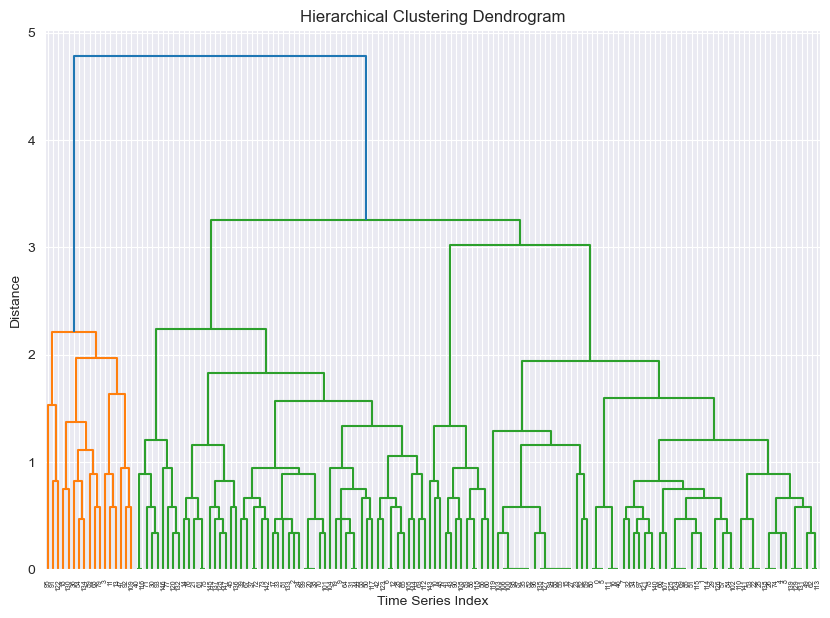

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\432876918.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_happy_1["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\432876918.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_happy_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\432876918.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

<Axes: xlabel='NA', ylabel='PA'>

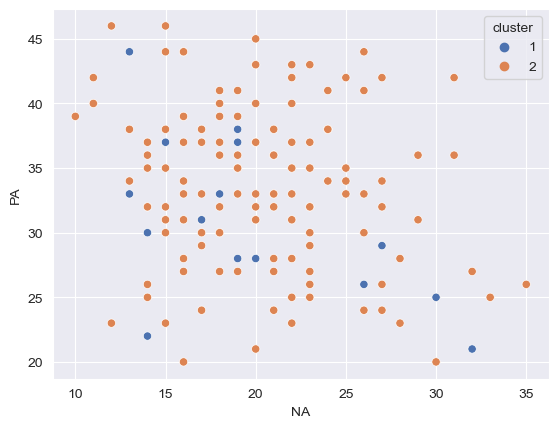

In [167]:
import numpy as np
from dtaidistance import dtw
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from matplotlib import pyplot as plt


time_series_data = temporal_happy_1.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 2, criterion='maxclust')
temporal_happy_1["cluster"] = clusters
temporal_happy_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_happy_1["NA"] = RETOS_BEBRASK_wide["NA"].copy()


<Axes: xlabel='NA', ylabel='PA'>

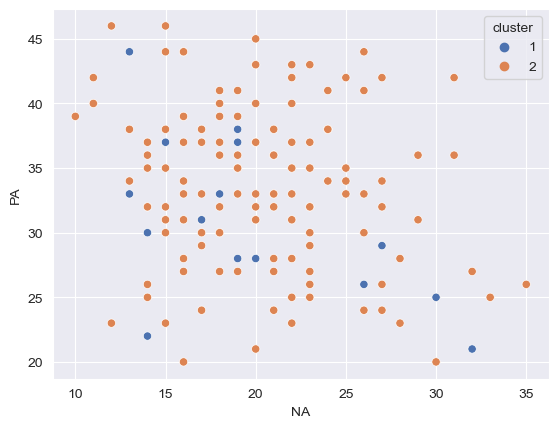

In [168]:
sns.scatterplot(data=temporal_happy_1, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


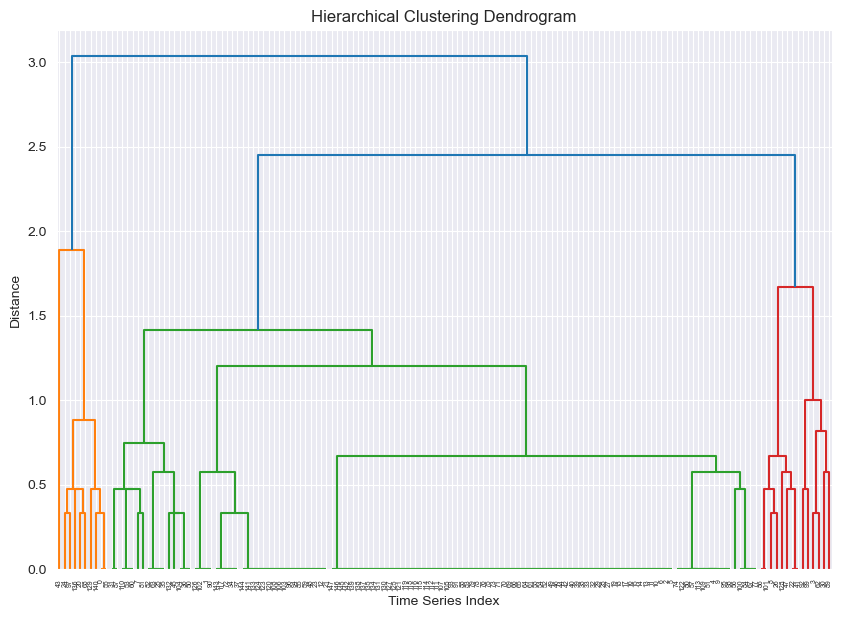

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\133712468.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_happy_0["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\133712468.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_happy_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\133712468.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [170]:
time_series_data = temporal_happy_0.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 3, criterion='maxclust')
temporal_happy_0["cluster"] = clusters
temporal_happy_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_happy_0["NA"] = RETOS_BEBRASK_wide["NA"].copy()

<Axes: xlabel='NA', ylabel='PA'>

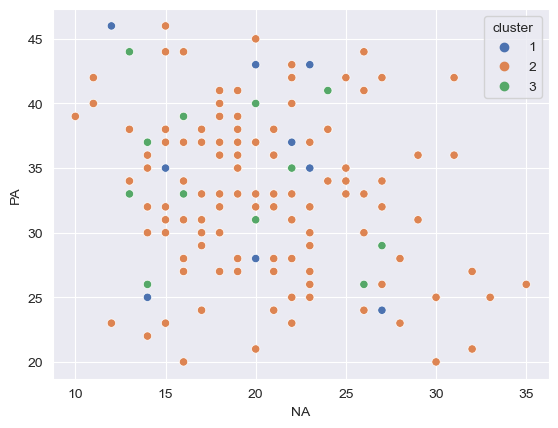

In [171]:
sns.scatterplot(data=temporal_happy_0, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


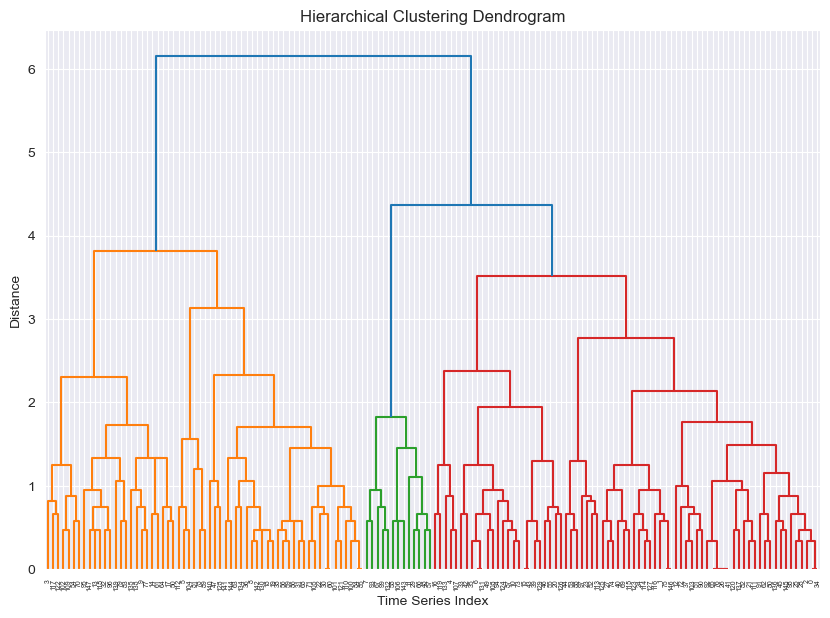

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\196461015.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_sad_1["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\196461015.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_sad_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\196461015.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [173]:


time_series_data = temporal_sad_1.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 3, criterion='maxclust')
temporal_sad_1["cluster"] = clusters
temporal_sad_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_sad_1["NA"] = RETOS_BEBRASK_wide["NA"].copy()

<Axes: xlabel='NA', ylabel='PA'>

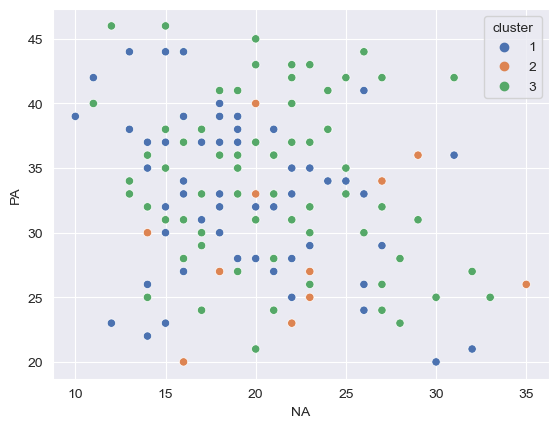

In [174]:
sns.scatterplot(data=temporal_sad_1, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


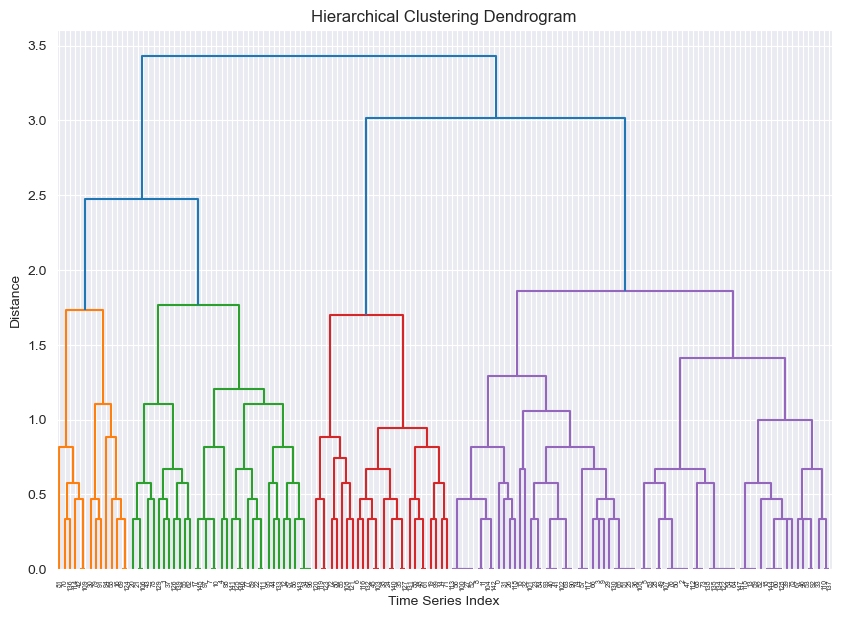

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\1796823513.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_sad_0["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\1796823513.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_sad_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\1796823513.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

In [176]:
time_series_data = temporal_sad_0.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 4, criterion='maxclust')
temporal_sad_0["cluster"] = clusters
temporal_sad_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_sad_0["NA"] = RETOS_BEBRASK_wide["NA"].copy()


<Axes: xlabel='NA', ylabel='PA'>

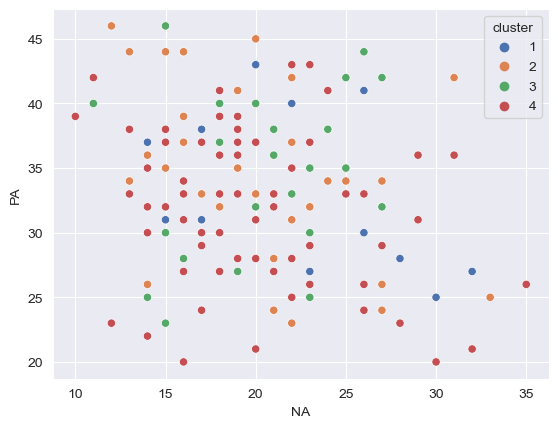

In [177]:
sns.scatterplot(data=temporal_sad_0, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


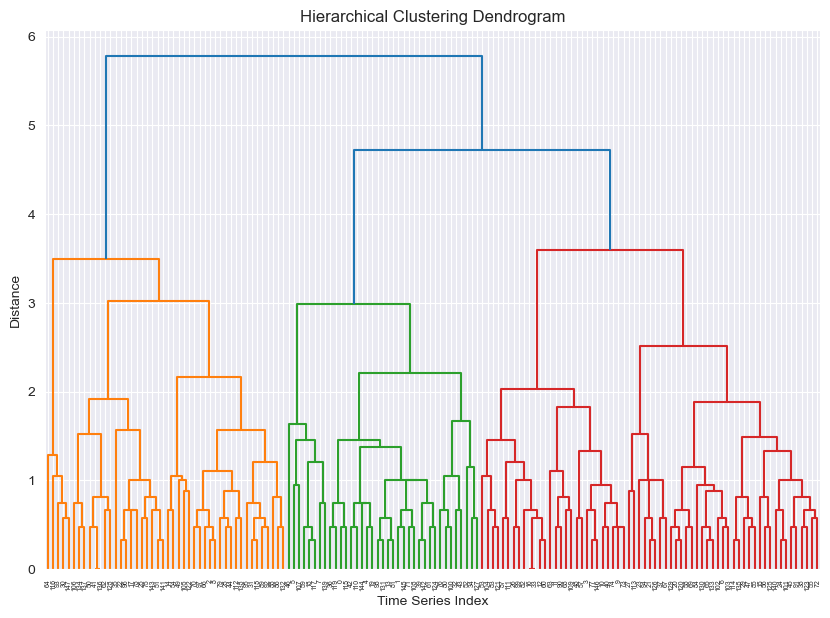

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\3745484383.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_fear_1["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\3745484383.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_fear_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\3745484383.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [179]:


time_series_data = temporal_fear_1.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 3, criterion='maxclust')
temporal_fear_1["cluster"] = clusters
temporal_fear_1["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_fear_1["NA"] = RETOS_BEBRASK_wide["NA"].copy()

<Axes: xlabel='NA', ylabel='PA'>

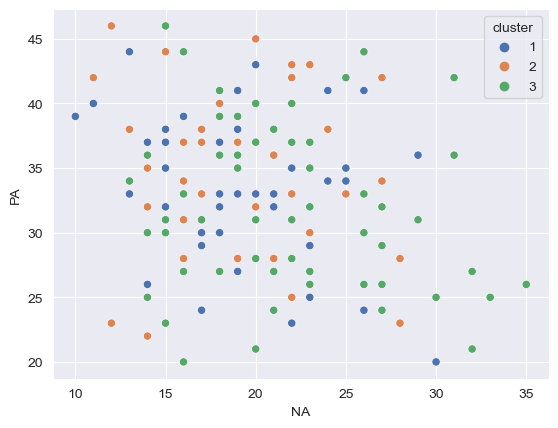

In [180]:
sns.scatterplot(data=temporal_fear_1, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


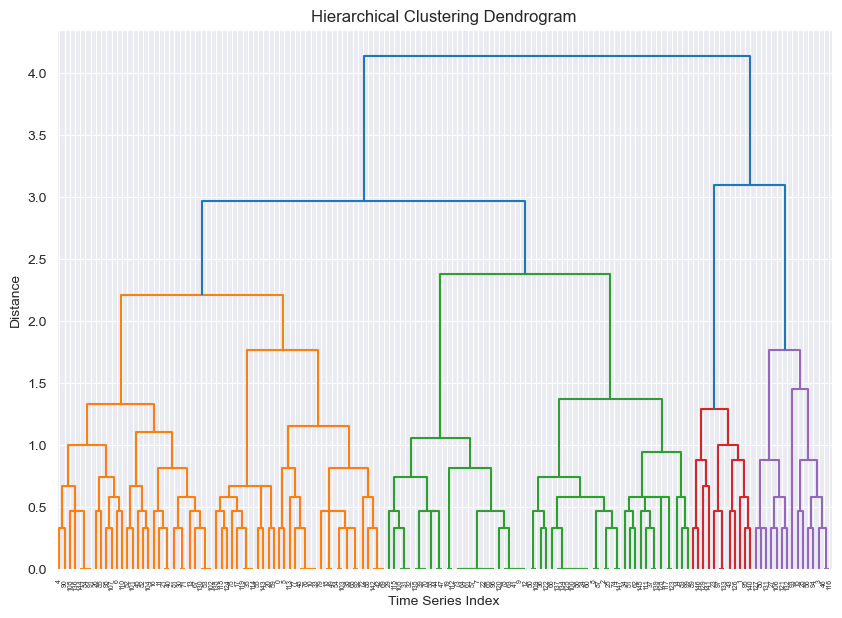

C:\Users\manue\AppData\Local\Temp\ipykernel_16784\605494091.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_fear_0["cluster"] = clusters
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\605494091.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temporal_fear_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
C:\Users\manue\AppData\Local\Temp\ipykernel_16784\605494091.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [182]:
time_series_data = temporal_fear_0.drop(["Subject ID"], axis=1).to_numpy()

distance_matrix = dtw.distance_matrix_fast(time_series_data)
condensed_dist_matrix = squareform(distance_matrix)
Z = linkage(condensed_dist_matrix, method='complete')

# Step 5: Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Time Series Index')
plt.ylabel('Distance')
plt.show()

clusters = fcluster(Z, 4, criterion='maxclust')
temporal_fear_0["cluster"] = clusters
temporal_fear_0["PA"] = RETOS_BEBRASK_wide["PA"].copy()
temporal_fear_0["NA"] = RETOS_BEBRASK_wide["NA"].copy()

<Axes: xlabel='NA', ylabel='PA'>

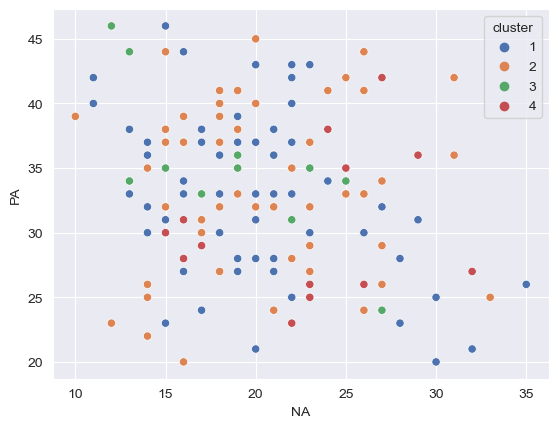

In [183]:
sns.scatterplot(data=temporal_fear_0, x = 'NA', y = 'PA', hue= 'cluster',palette="deep")


## Clustering with Mean & Variance Separating Emotions and Matches

In [101]:
RETOS_BEBRASK_wide_v3 = RETOS_BEBRASK_wide.drop(["NA","PA","cluster"],axis=1)

In [102]:
mean_variance_dict = {}
for i in RETOS_BEBRASK_wide_v3.index:
    for emo in ["Happy","Sad","Fear"]:
        mean_0 = 0
        mean_1 = 0
        for score in [1,2,3,4]:
            feat_0 = f'Count_{emo}_{0}_{score}'
            mean_0 += RETOS_BEBRASK_wide_v3.iloc[i][feat_0] * score
            feat_1 = f'Count_{emo}_{1}_{score}'
            mean_1 += RETOS_BEBRASK_wide_v3.iloc[i][feat_1] * score
        mean_0 /= 6
        mean_1 /= 9
        
        var_0 = 0
        var_1 = 0
        for score in [1,2,3,4]:
            feat_0 = f'Count_{emo}_{0}_{score}'
            var_0 += ((score-mean_0)**2)*RETOS_BEBRASK_wide_v3.iloc[i][feat_0]/6
            feat_1 = f'Count_{emo}_{1}_{score}'
            var_1 += ((score-mean_1)**2)*RETOS_BEBRASK_wide_v3.iloc[i][feat_1]/9

        if emo == "Happy":
            mean_variance_dict[i] = {emo:{'mean_0':mean_0,'mean_1':mean_1,'var_0':var_0,'var_1':var_1}}
        else:
            mean_variance_dict[i].update({emo:{'mean_0':mean_0,'mean_1':mean_1,'var_0':var_0,'var_1':var_1}})

        


mean_variance_dict

{0: {'Happy': {'mean_0': 1.5,
   'mean_1': 3.888888888888889,
   'var_0': 1.25,
   'var_1': 0.09876543209876544},
  'Sad': {'mean_0': 2.1666666666666665,
   'mean_1': 3.5555555555555554,
   'var_0': 1.472222222222222,
   'var_1': 0.4691358024691358},
  'Fear': {'mean_0': 2.0,
   'mean_1': 3.2222222222222223,
   'var_0': 1.3333333333333333,
   'var_1': 0.8395061728395061}},
 1: {'Happy': {'mean_0': 1.0,
   'mean_1': 3.7777777777777777,
   'var_0': 0.0,
   'var_1': 0.1728395061728395},
  'Sad': {'mean_0': 1.5,
   'mean_1': 3.0,
   'var_0': 0.25,
   'var_1': 0.4444444444444444},
  'Fear': {'mean_0': 1.5,
   'mean_1': 2.3333333333333335,
   'var_0': 0.25,
   'var_1': 0.4444444444444444}},
 2: {'Happy': {'mean_0': 1.3333333333333333,
   'mean_1': 3.6666666666666665,
   'var_0': 0.2222222222222222,
   'var_1': 0.2222222222222222},
  'Sad': {'mean_0': 1.3333333333333333,
   'mean_1': 2.6666666666666665,
   'var_0': 0.2222222222222222,
   'var_1': 0.8888888888888888},
  'Fear': {'mean_0': 2.16

In [103]:
records = []
for subject_id, emotions in mean_variance_dict.items():
    record = {'Subject ID': subject_id}
    for emotion, stats in emotions.items():
        for stat_key, stat_value in stats.items():
            # Creating new column names in the format "Emotion_StatisticalMeasure"
            column_name = f"{emotion}_{stat_key}"
            record[column_name] = stat_value
    records.append(record)

# Creating a new DataFrame with the adjusted structure
RETOS_BEBRASK_statistical = pd.DataFrame(records)

RETOS_BEBRASK_statistical.drop("Subject ID",axis=1,inplace=True)

In [104]:
#Percentage of sparsity by column

zero_count = RETOS_BEBRASK_statistical.apply(lambda col: (col == 0).sum())
zero_count/len(RETOS_BEBRASK_statistical) *100

Happy_mean_0     0.000000
Happy_mean_1     0.000000
Happy_var_0     44.594595
Happy_var_1      2.027027
Sad_mean_0       0.000000
Sad_mean_1       0.000000
Sad_var_0        4.729730
Sad_var_1        0.000000
Fear_mean_0      0.000000
Fear_mean_1      0.000000
Fear_var_0       1.351351
Fear_var_1       0.000000
dtype: float64

In [105]:
data = RETOS_BEBRASK_scale.select_dtypes(include=[np.number])
# Borrar columnas con más de 20 valores faltantes
cols_to_drop = data.columns[data.isnull().sum() > 20]
data.drop(columns=cols_to_drop, inplace=True)

# Imputar valores faltantes con la mediana
data.fillna(data.median(), inplace=True)

data.drop("Age", axis=1, inplace=True)

data = data.reset_index()
data.drop("index", axis=1, inplace=True)

show_importance_metric(RETOS_BEBRASK_statistical,data)

PA ['Happy_mean_1', 'Fear_mean_0']
NA. ['Fear_mean_1']
ERQ_CR ['Sad_mean_1']
UPPSP_NU []
UPPSP_PU ['Sad_var_1']
UPPSP_SS []
UPPSP_PSV ['Sad_mean_1']
BIS ['Fear_mean_0', 'Fear_var_0']
BAS_RR ['Happy_mean_0']
BAS_D ['Fear_var_0', 'Happy_mean_0']
BAS_FS []
TEPS_AF ['Fear_var_1', 'Fear_var_0']
TEPS_CF []
SHS ['Sad_mean_0', 'Happy_mean_0']
FS []
LOT_R ['Fear_var_0', 'Happy_mean_0', 'Sad_var_1']
RRQ_Rum ['Fear_mean_1']
RRQ_Ref ['Fear_mean_0', 'Sad_mean_1', 'Happy_mean_0', 'Sad_var_1', 'Fear_var_1']
ASI_S []


C:\Users\manue\anaconda3\envs\CASLabv2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manue\anaconda3\envs\CASLabv2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manue\anaconda3\envs\CASLabv2\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\manue\anaconda3\envs\CASLabv2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

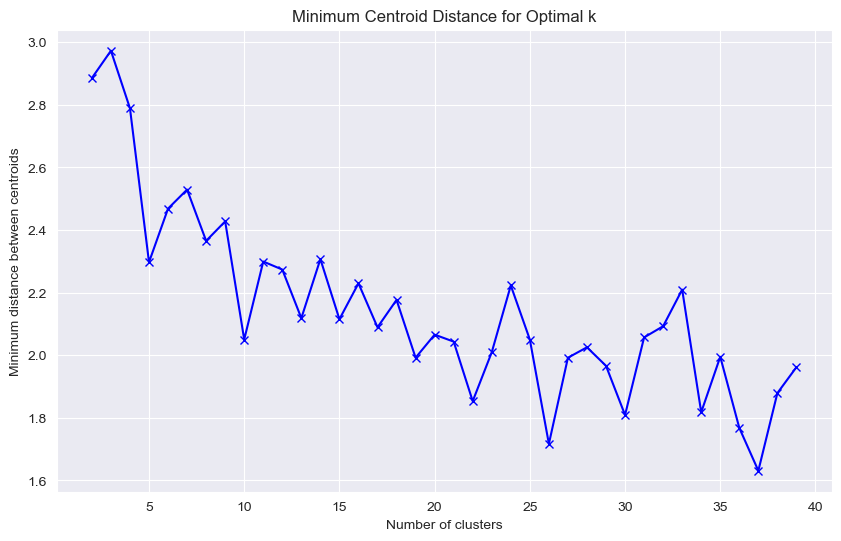

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform

scaler = StandardScaler()
scaled_RETOS_BEBRASK_statistical = scaler.fit_transform(RETOS_BEBRASK_statistical)

def min_centroid_distance(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)
    centroids = kmeans.cluster_centers_
    distances = pdist(centroids, 'euclidean')
    return np.min(distances)

# Finding the optimal number of clusters based on silhouette score
K = range(2, 40)  # Testing clusters from 2 to 10

min_distances = [min_centroid_distance(k, scaled_RETOS_BEBRASK_statistical) for k in K]



# Plotting the minimum distances for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(K, min_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Minimum distance between centroids')
plt.title('Minimum Centroid Distance for Optimal k')
plt.show()
# Plotting the silhouette scores for different numbers of clusters


In [107]:
RETOS_BEBRASK_statistical

Happy_mean_0  Happy_mean_1  Happy_var_0  Happy_var_1  Sad_mean_0  \
0        1.500000      3.888889     1.250000     0.098765    2.166667   
1        1.000000      3.777778     0.000000     0.172840    1.500000   
2        1.333333      3.666667     0.222222     0.222222    1.333333   
3        1.166667      2.444444     0.138889     0.913580    1.000000   
4        1.333333      3.000000     0.222222     0.888889    1.666667   
..            ...           ...          ...          ...         ...   
143      1.500000      3.111111     0.250000     0.765432    1.333333   
144      1.166667      3.666667     0.138889     0.222222    1.333333   
145      1.000000      3.555556     0.000000     0.469136    1.833333   
146      1.333333      3.777778     0.222222     0.172840    1.666667   
147      1.000000      3.000000     0.000000     0.444444    1.000000   

     Sad_mean_1  Sad_var_0  Sad_var_1  Fear_mean_0  Fear_mean_1  Fear_var_0  \
0      3.555556   1.472222   0.469136     2.000000     3.222222    1.333333   
1      3.000000   0.250000   0.444444     1.500000     2.333333    0.250000   
2      2.666667   0.222222   0.888889     2.166667     2.666667    1.472222   
3      1.888889   0.000000   0.765432     1.500000     2.222222    0.583333   
4      3.222222   0.555556   1.061728     1.833333     2.444444    1.472222   
..          ...        ...        ...          ...          ...         ...   
143    2.111111   0.222222   0.543210     1.333333     2.444444    0.555556   
144    2.777778   0.555556   0.395062     1.833333     2.777778    0.472222   
145    2.888889   0.805556   1.432099     2.333333     3.222222    1.888889   
146    3.000000   0.555556   0.666667     1.833333     2.888889    0.472222   
147    2.444444   0.000000   0.691358     1.500000     1.888889    0.583333   

     Fear_var_1  
0      0.839506  
1      0.444444  
2      0.444444  
3      0.839506  
4      1.135802  
..          ...  
143    0.469136  
144    1.061728  
145    0.839506  
146    1.209877  
147    0.765432  

[148 rows x 12 columns]

C:\Users\manue\anaconda3\envs\CASLabv2\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[]

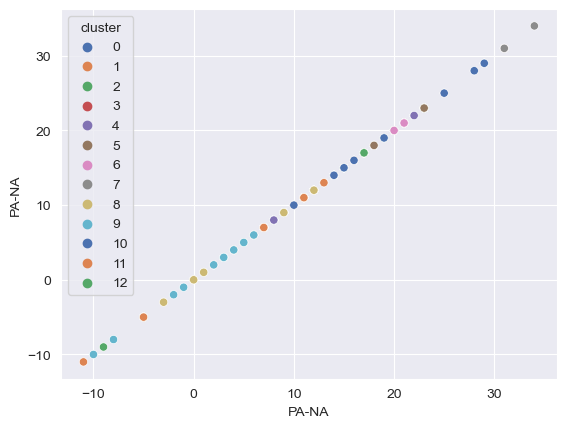

In [180]:
km = KMeans(n_init = 'auto',n_clusters=13, random_state=1)
cluster_labels = km.fit_predict(scaled_RETOS_BEBRASK_statistical)

RETOS_BEBRASK_statistical["cluster"]=cluster_labels
RETOS_BEBRASK_statistical["PA"] = RETOS_BEBRASK_wide["PA"]
RETOS_BEBRASK_statistical["NA"] = RETOS_BEBRASK_wide["NA"]
RETOS_BEBRASK_statistical["PA-NA"] = RETOS_BEBRASK_wide["PA"]-RETOS_BEBRASK_wide["NA"]

sns.scatterplot(data=RETOS_BEBRASK_statistical, x = 'PA-NA',y = 'PA-NA', hue= 'cluster',palette="deep")
plt.plot()


Length Mean_PA Mean_NA
3        6   37.00   19.83
10      16   37.50   16.12
4       11   29.00   22.09
2       13   28.23   20.62
7       16   39.19   19.88
8       19   30.58   22.21
11      15   33.60   18.67
0       17   36.24   19.18
1       20   27.70   22.45
6        6   35.50   21.83
9        7   39.29   16.29
5        2   29.50   29.50

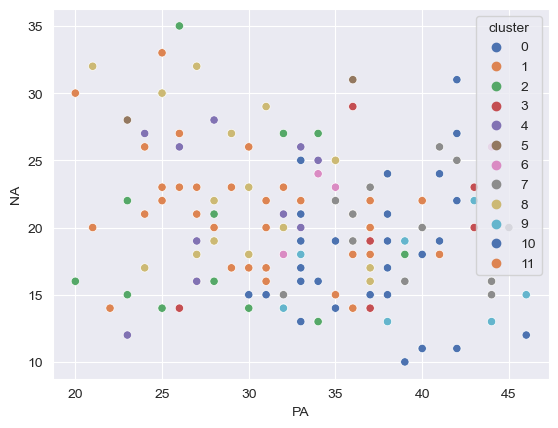

In [175]:
sns.scatterplot(data=RETOS_BEBRASK_statistical, x='PA', y='NA', hue='cluster', palette="deep")

plt.plot()

create_dataframes_cluster([], RETOS_BEBRASK_statistical)


## Testing Hyperplane Separation

In [ ]:
test = RETOS_BEBRASK_wide[['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4',"PA","NA"]]

In [ ]:
RETOS_BEBRASK_wide

Length Mean_PA Mean_NA Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
4       9   31.56   24.11            5.00            0.00            0.67   
0      66   34.55   19.27            6.00            0.00            0.00   
2      29   31.34   20.55            4.00            1.52            0.41   
1      28   32.86   20.71            5.00            1.00            0.00   
3      16   34.00   20.12            2.88            2.19            0.75   

  Count_Happy_0_4  
4            0.33  
0            0.00  
2            0.07  
1            0.00  
3            0.19

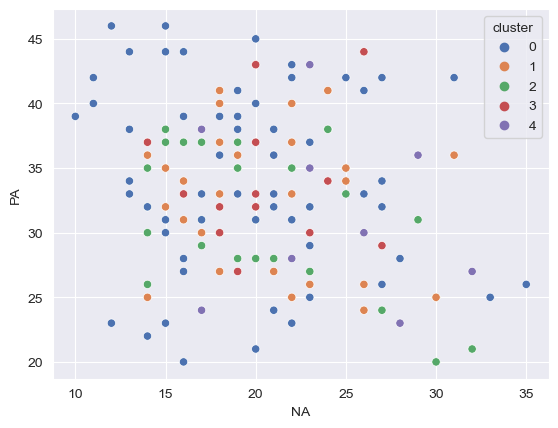

In [347]:
#ONLY NON MATCH TRIALS
RETOS_BEBRASK_wide["cluster"] = 0
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 6), "cluster"] = 0
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 5) & (RETOS_BEBRASK_wide["Count_Happy_0_2"] == 1), "cluster"] = 1
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 5) & 
            (RETOS_BEBRASK_wide["Count_Happy_0_3"] == 1), "cluster"] = 4
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 5) & 
            (RETOS_BEBRASK_wide["Count_Happy_0_4"] == 1), "cluster"] = 4
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 4), "cluster"] = 2

RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] <= 3), "cluster"] = 3

dataframe_hyperplane_happy_non = create_dataframes_cluster(['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4'],RETOS_BEBRASK_wide)

sns.scatterplot(data=RETOS_BEBRASK_wide, x="NA", y="PA", hue='cluster',palette="deep")
dataframe_hyperplane_happy_non


Length Mean_PA Mean_NA Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
1      15   37.20   21.07            0.07            0.13            0.60   
0     117   33.46   20.04            0.16            0.68            3.11   
2      16   29.00   20.38            0.75            1.81            5.00   

  Count_Happy_1_4  
1            8.20  
0            5.04  
2            1.44

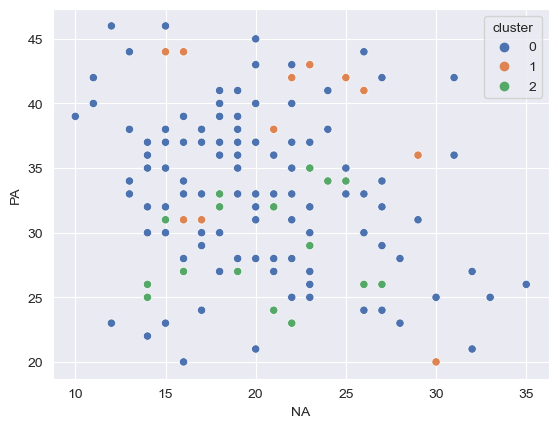

In [373]:
#ONLY MATCH TRIALS
RETOS_BEBRASK_wide["cluster"] = 0
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_4"] > 7), "cluster"] = 1
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_4"] < 3), "cluster"] = 2

RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_1"] + RETOS_BEBRASK_wide["Count_Happy_1_2"] > 4), "cluster"] = 2



dataframe_hyperplane_happy = create_dataframes_cluster(['Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'],RETOS_BEBRASK_wide)

sns.scatterplot(data=RETOS_BEBRASK_wide, x="NA", y="PA", hue='cluster',palette="deep")
dataframe_hyperplane_happy

Length Mean_PA Mean_NA Count_Happy_0_1 Count_Happy_0_2 Count_Happy_0_3  \
2      14   38.43   20.43            5.50            0.29            0.07   
0      84   34.31   19.65            5.31            0.57            0.08   
3      28   31.54   20.79            4.00            1.54            0.43   
1      22   28.82   21.27            4.91            0.55            0.45   

  Count_Happy_0_4 Count_Happy_1_1 Count_Happy_1_2 Count_Happy_1_3  \
2            0.14            0.07            0.14            0.57   
0            0.04            0.17            0.74            3.07   
3            0.04            0.18            0.57            3.14   
1            0.09            0.55            1.41            4.50   

  Count_Happy_1_4  
2            8.21  
0            5.02  
3            5.11  
1            2.55

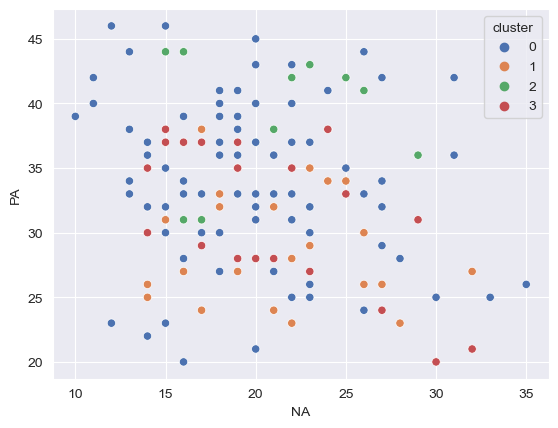

In [378]:
#BOTH MATCH AND NOT MATCH

RETOS_BEBRASK_wide["cluster"] = 0
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_4"] < 3), "cluster"] = 1

RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_1"] + RETOS_BEBRASK_wide["Count_Happy_1_2"] > 4), "cluster"] = 1
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 5) & 
            (RETOS_BEBRASK_wide["Count_Happy_0_3"] == 1), "cluster"] = 1
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 5) & 
            (RETOS_BEBRASK_wide["Count_Happy_0_4"] == 1), "cluster"] = 1

RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_1_4"] > 7), "cluster"] = 2
RETOS_BEBRASK_wide.loc[(RETOS_BEBRASK_wide["Count_Happy_0_1"] == 4) & (RETOS_BEBRASK_wide["Count_Happy_1_4"] >= 3), "cluster"] = 3


dataframe_hyperplane_happy = create_dataframes_cluster(['Count_Happy_0_1','Count_Happy_0_2','Count_Happy_0_3','Count_Happy_0_4','Count_Happy_1_1','Count_Happy_1_2','Count_Happy_1_3','Count_Happy_1_4'],RETOS_BEBRASK_wide)

sns.scatterplot(data=RETOS_BEBRASK_wide, x="NA", y="PA", hue='cluster',palette="deep")
dataframe_hyperplane_happy


### Bayesian NMF Clustering